In [1]:
import pandas as pd
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
import trace_analysis
import plots_analysis
import trace_statistics
import csv
import warnings 
warnings.filterwarnings('ignore')

# Plots

We plot useful informations like the distrubution of standard values, outliers and tumbling windows

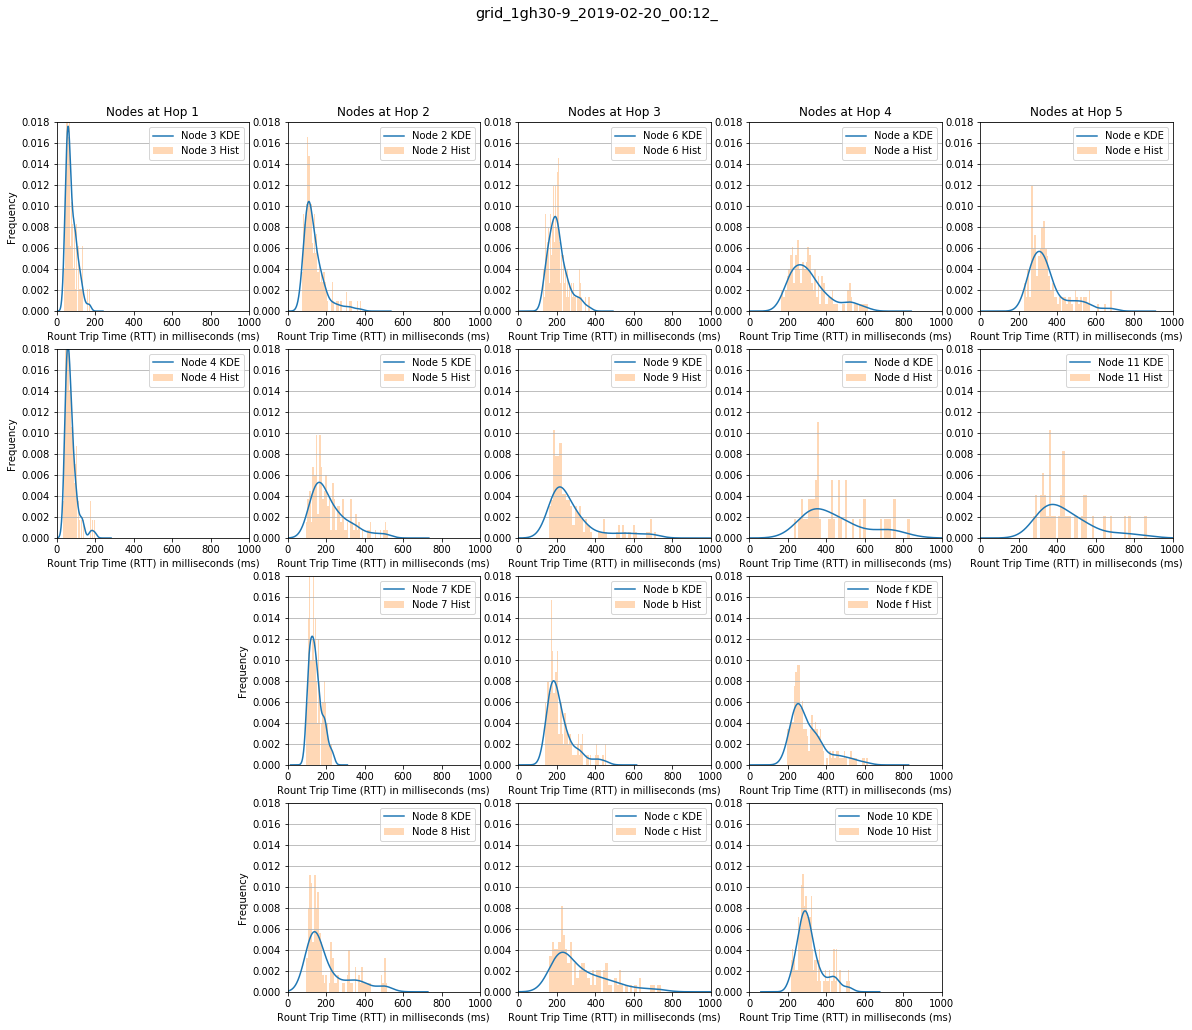

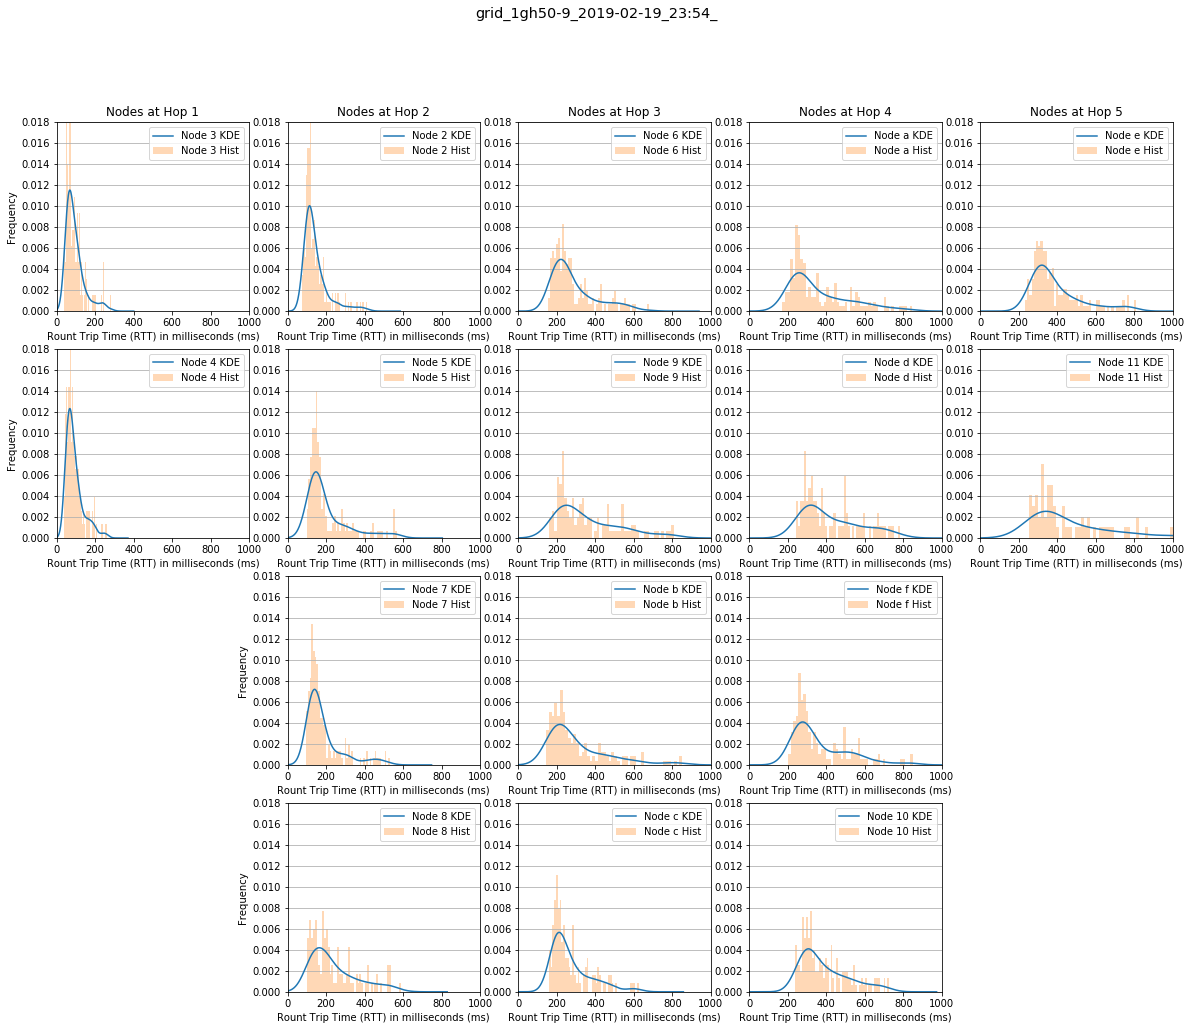

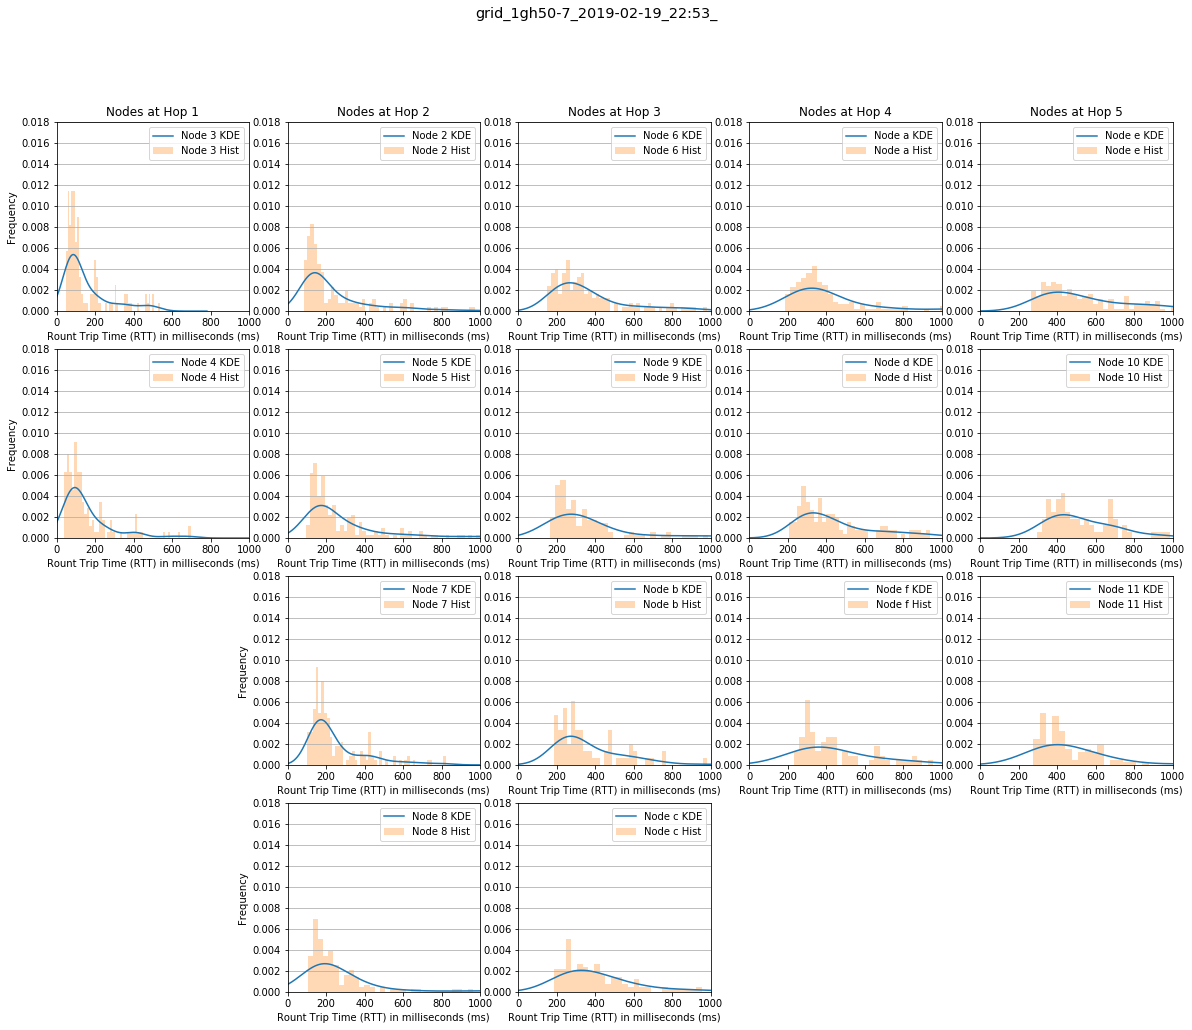

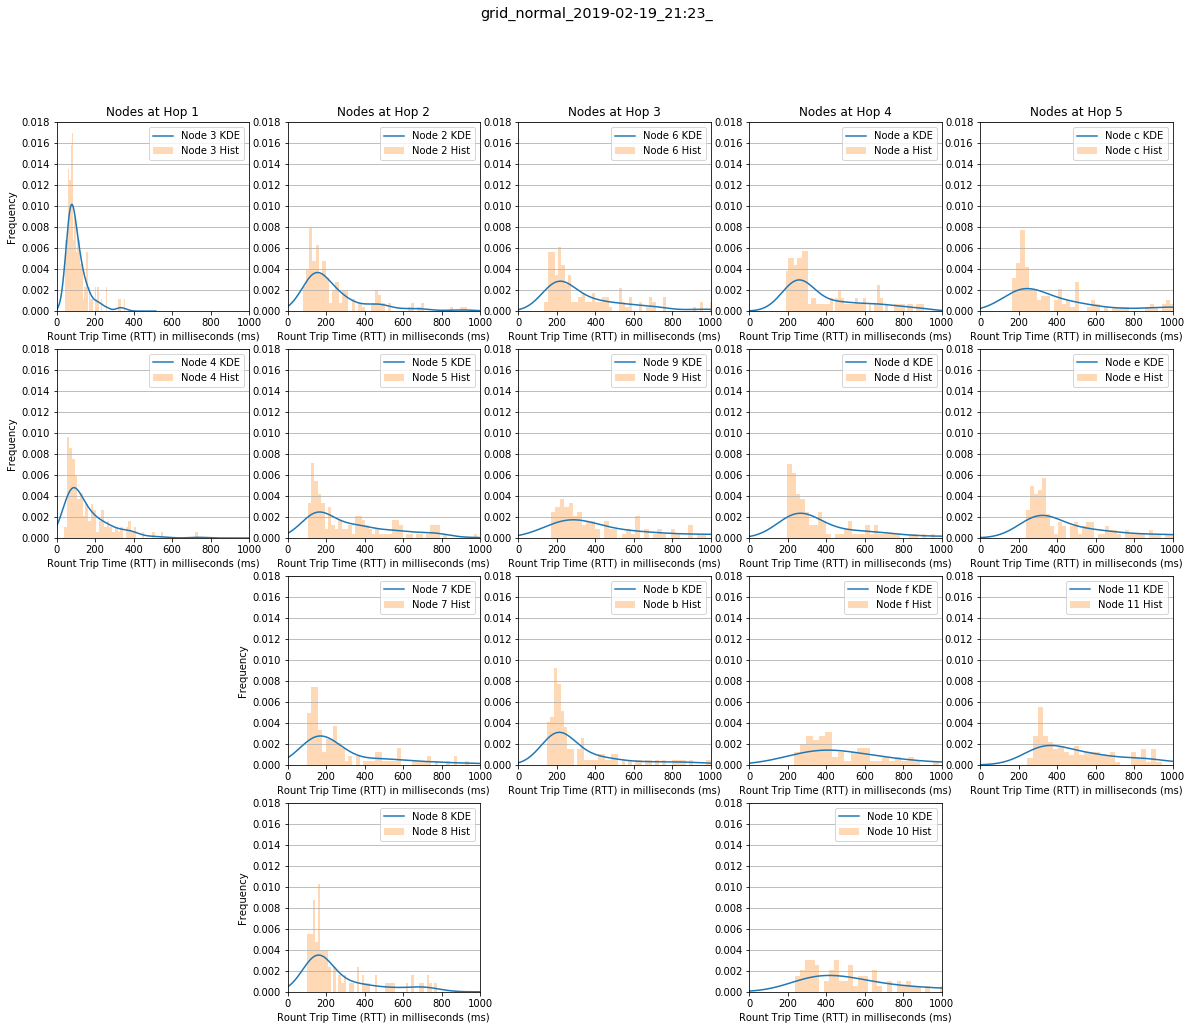

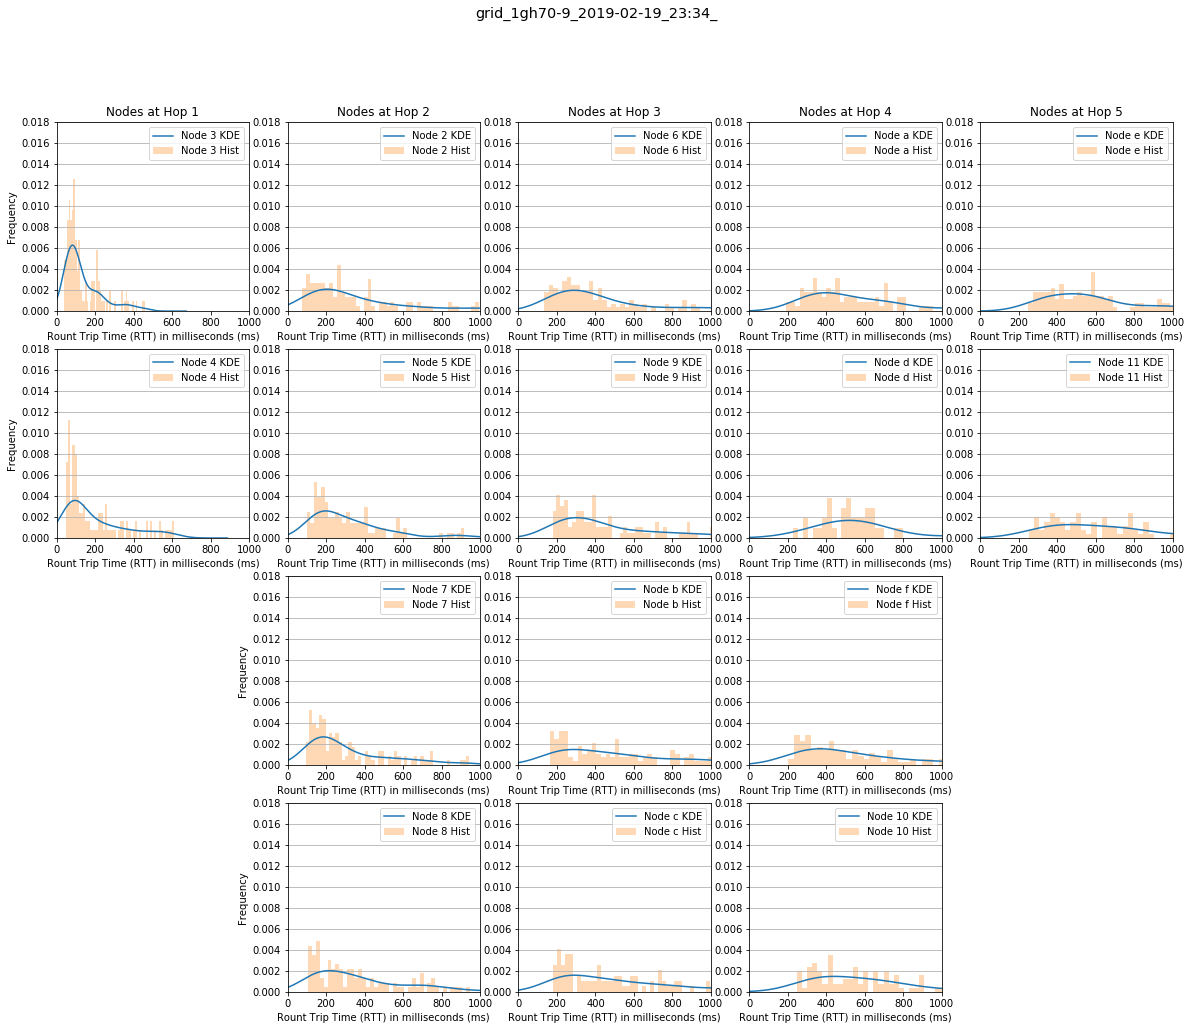

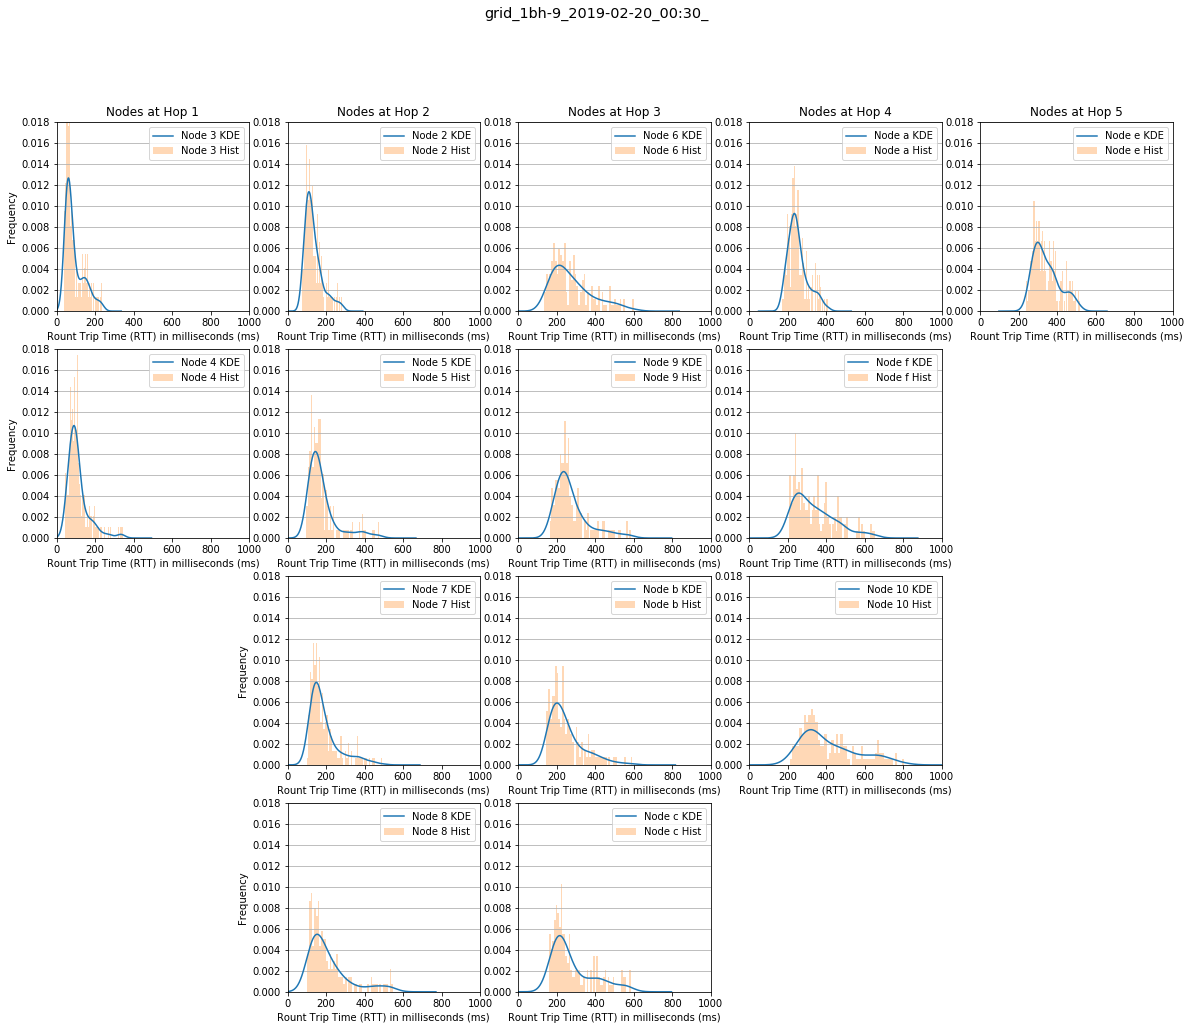

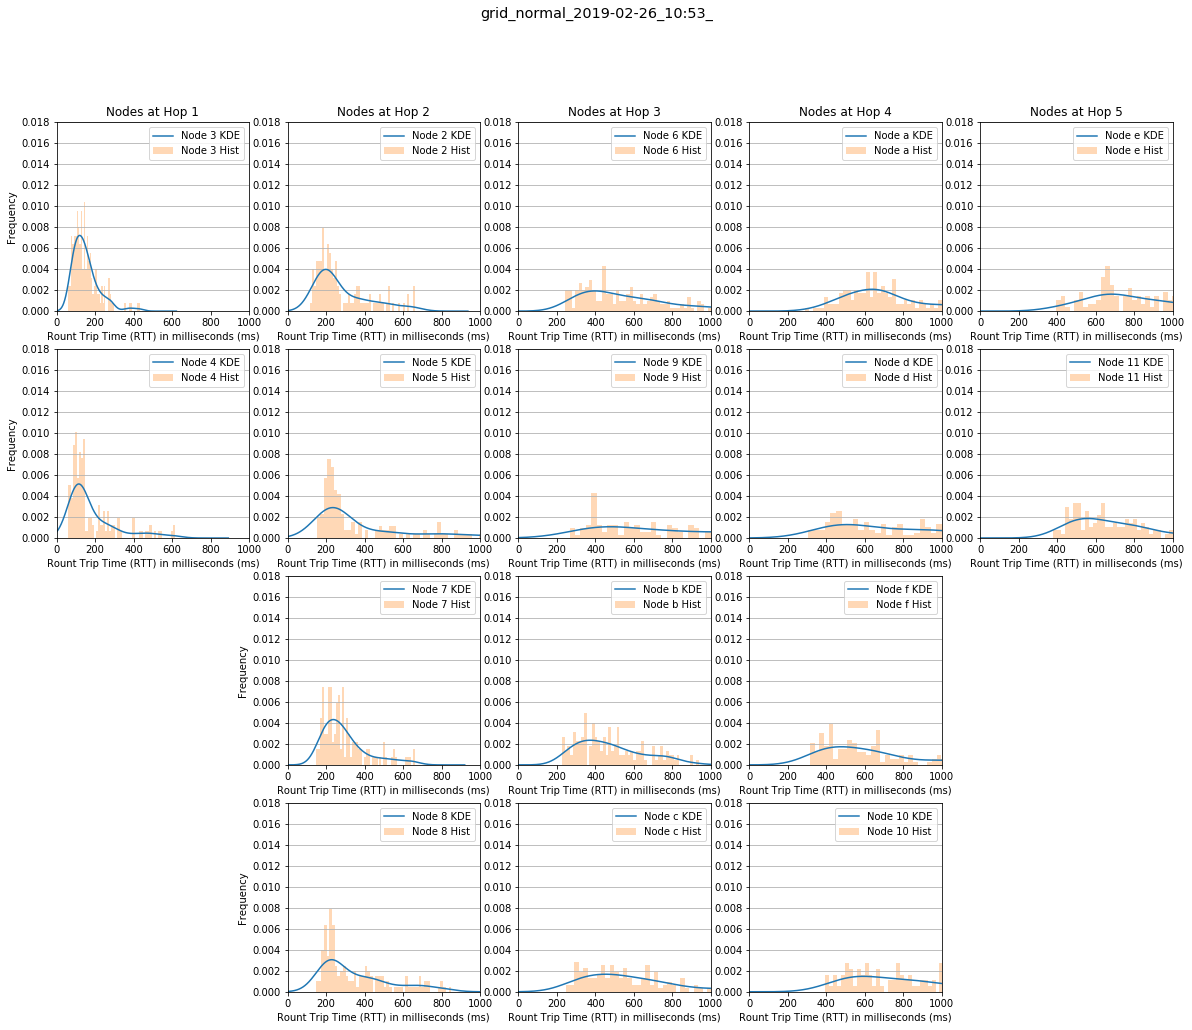

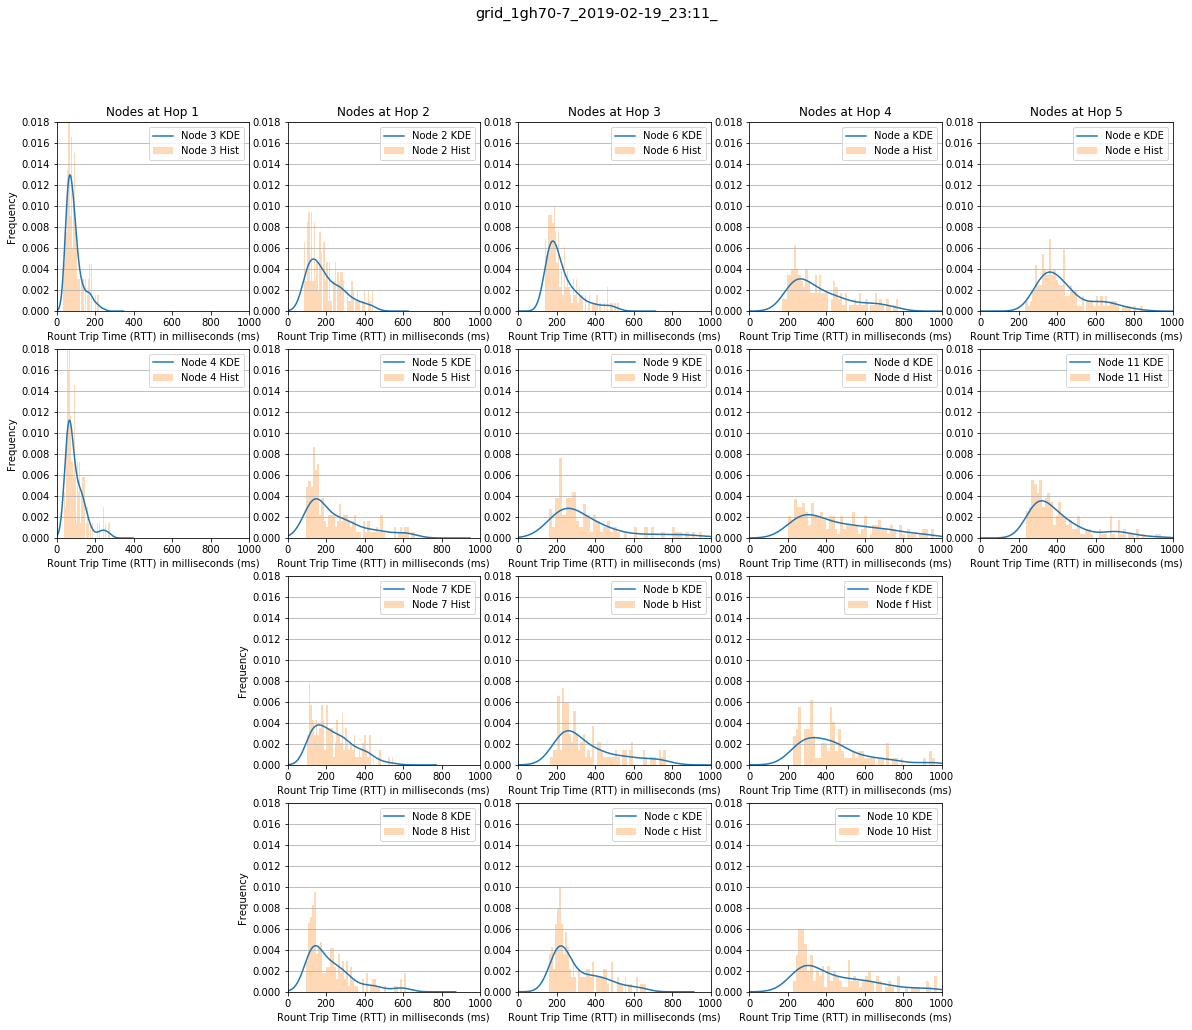

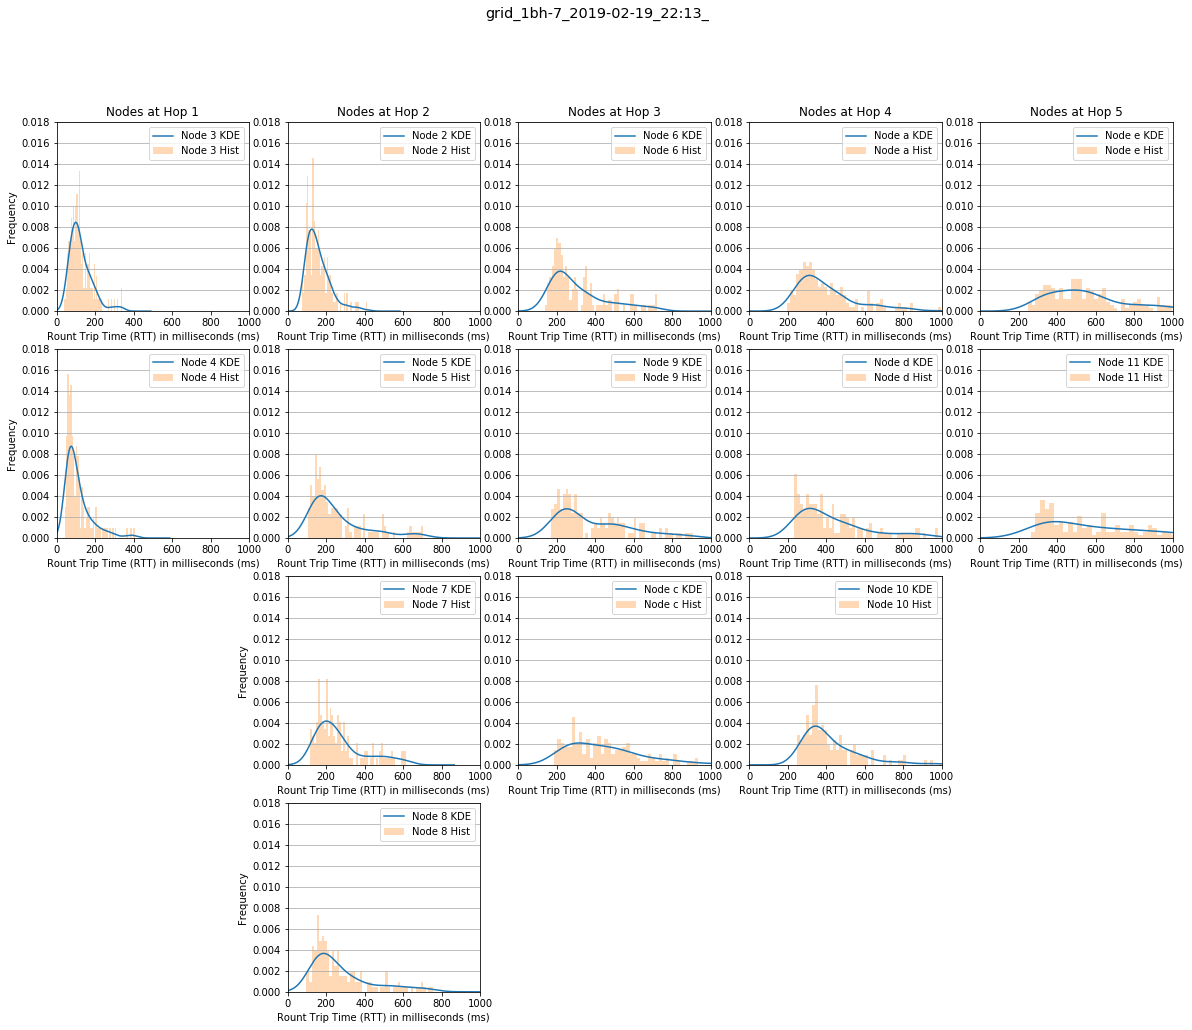

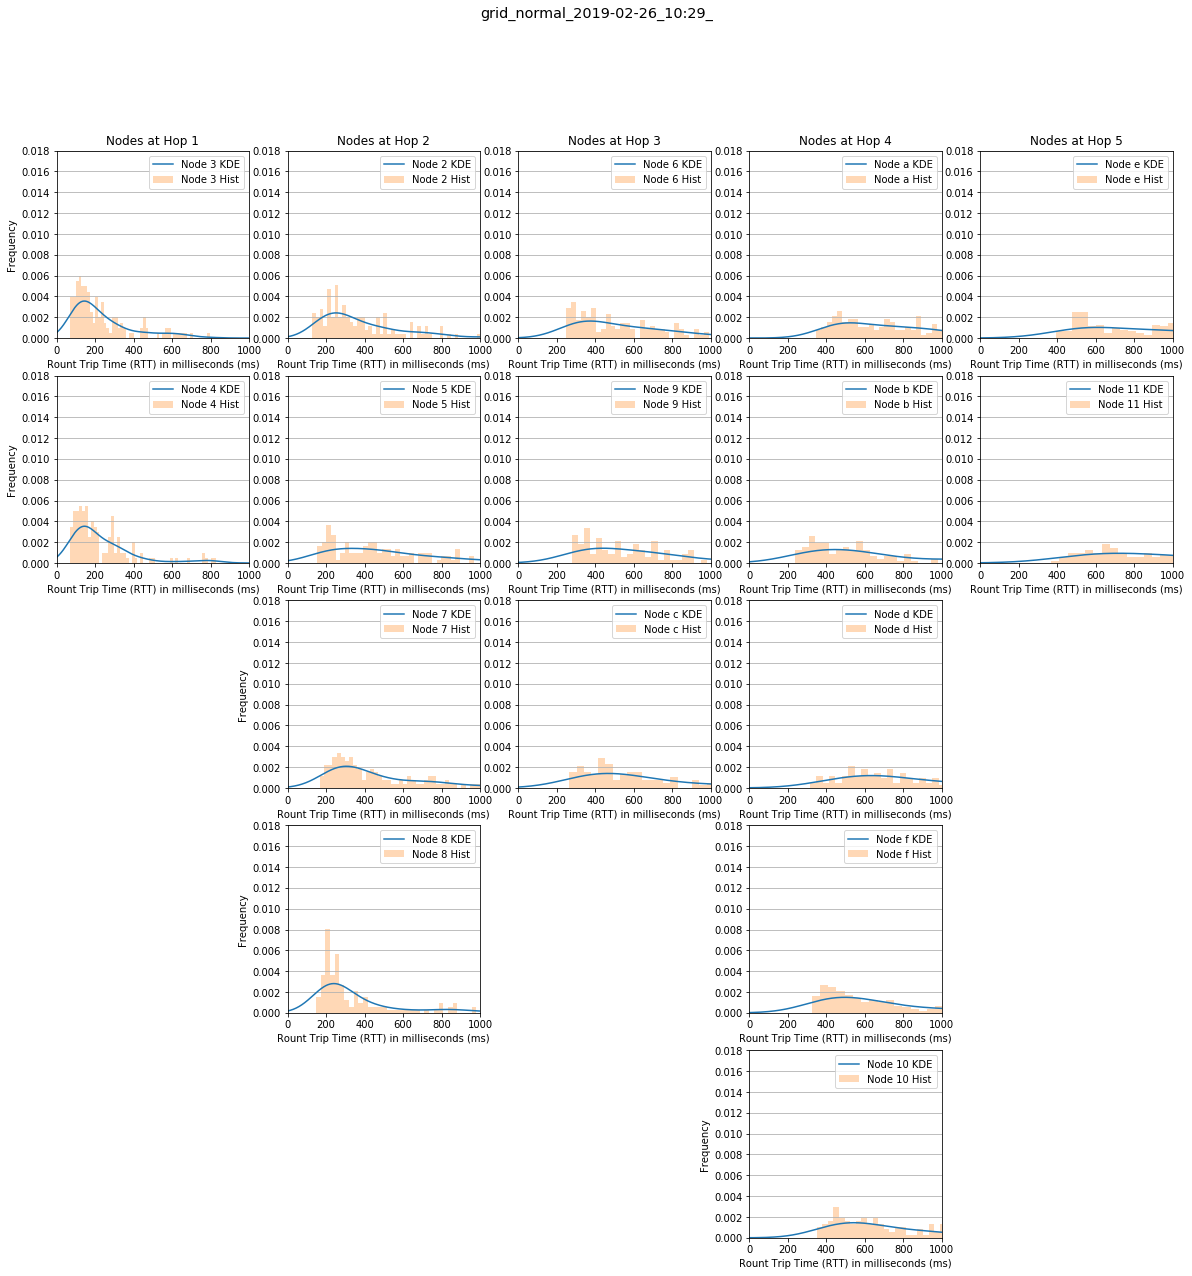

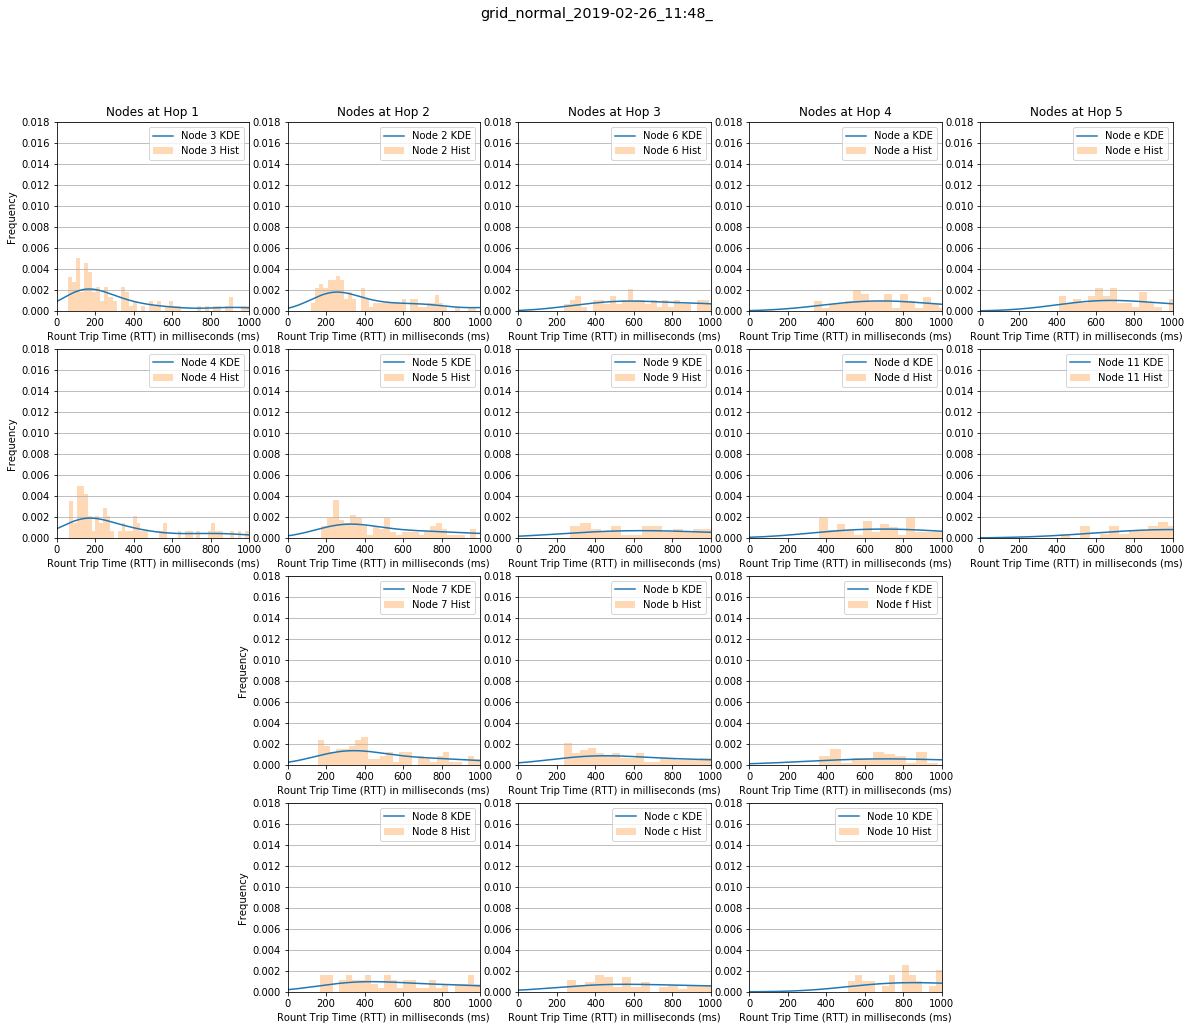

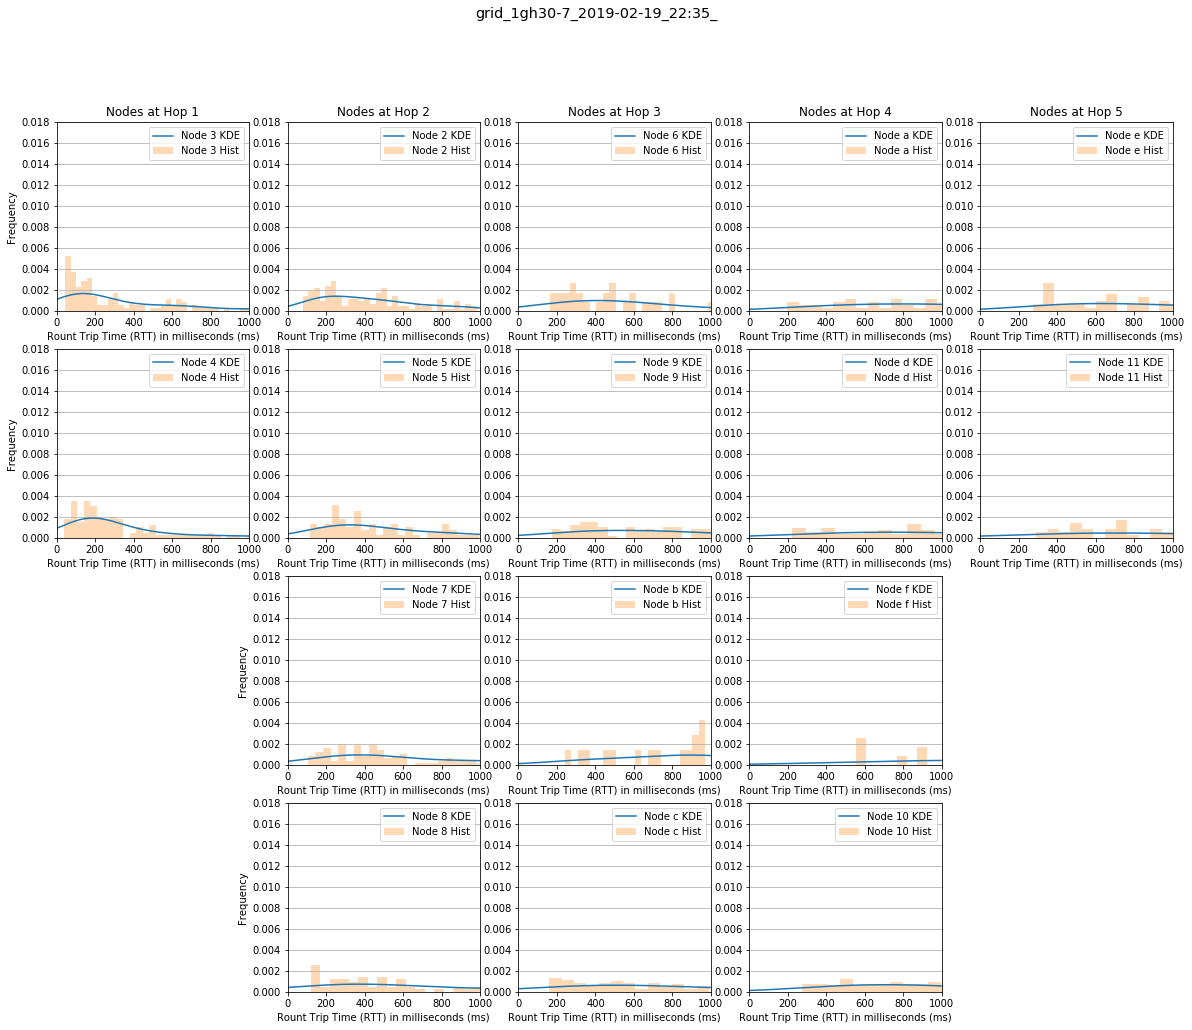

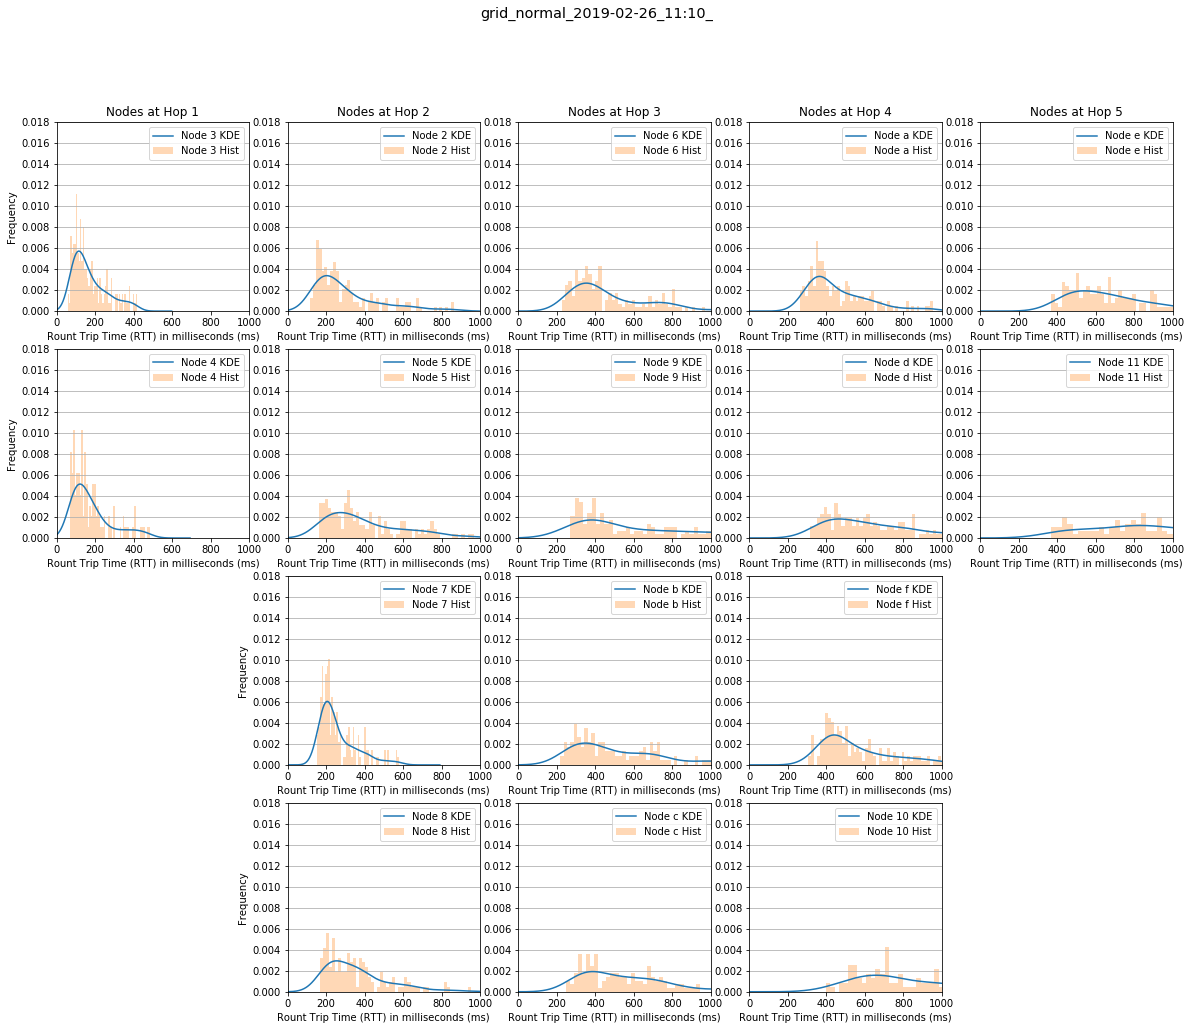

In [4]:
plots = set()
with open('traces/traces.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        else:
            plots.add((row[1], row[2]))

plots = list(plots) 

for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_hops_nodes(nodes, clean, 1000, 0.018, row[1])

Tumbling windows

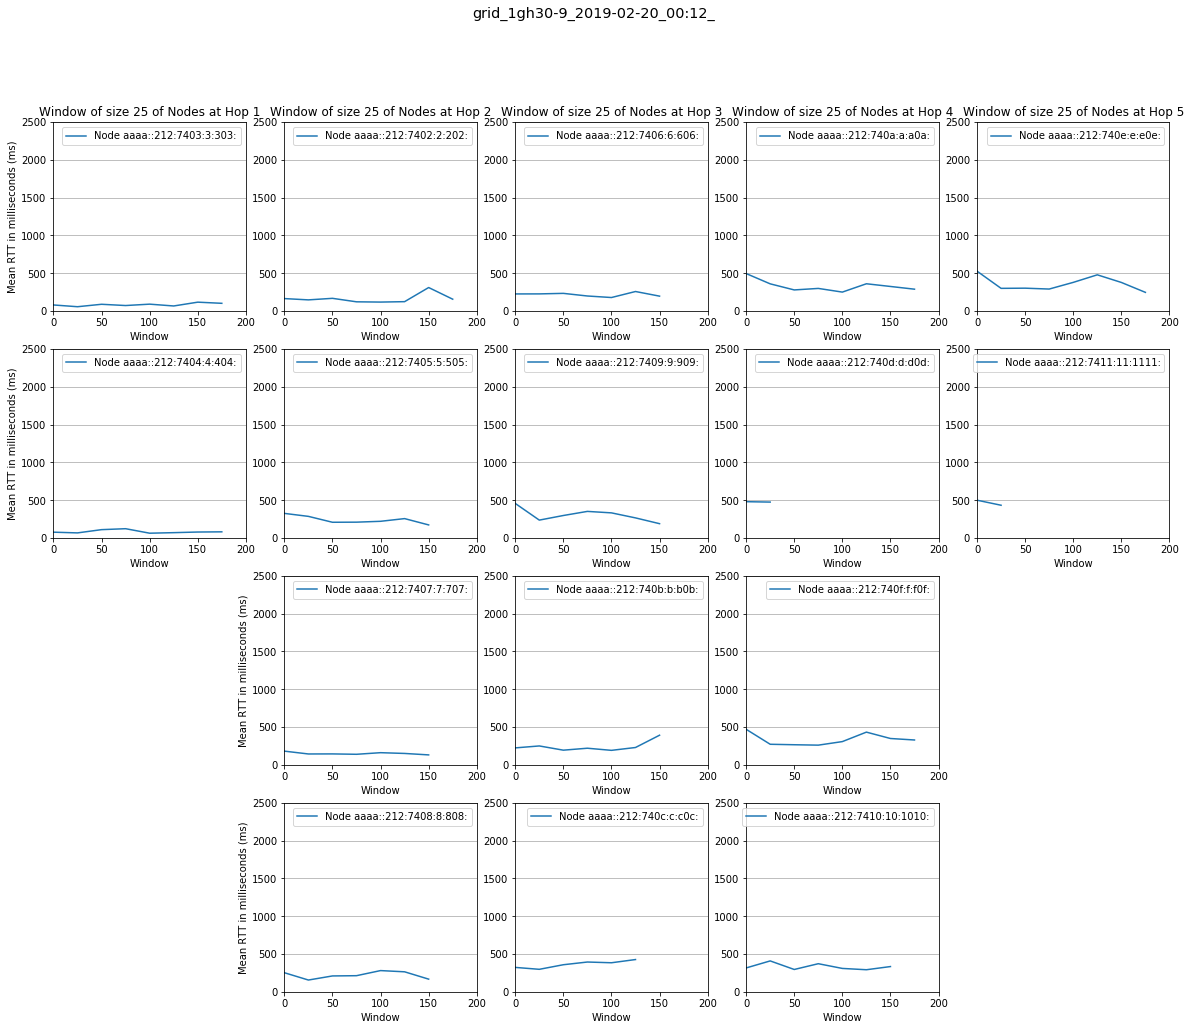

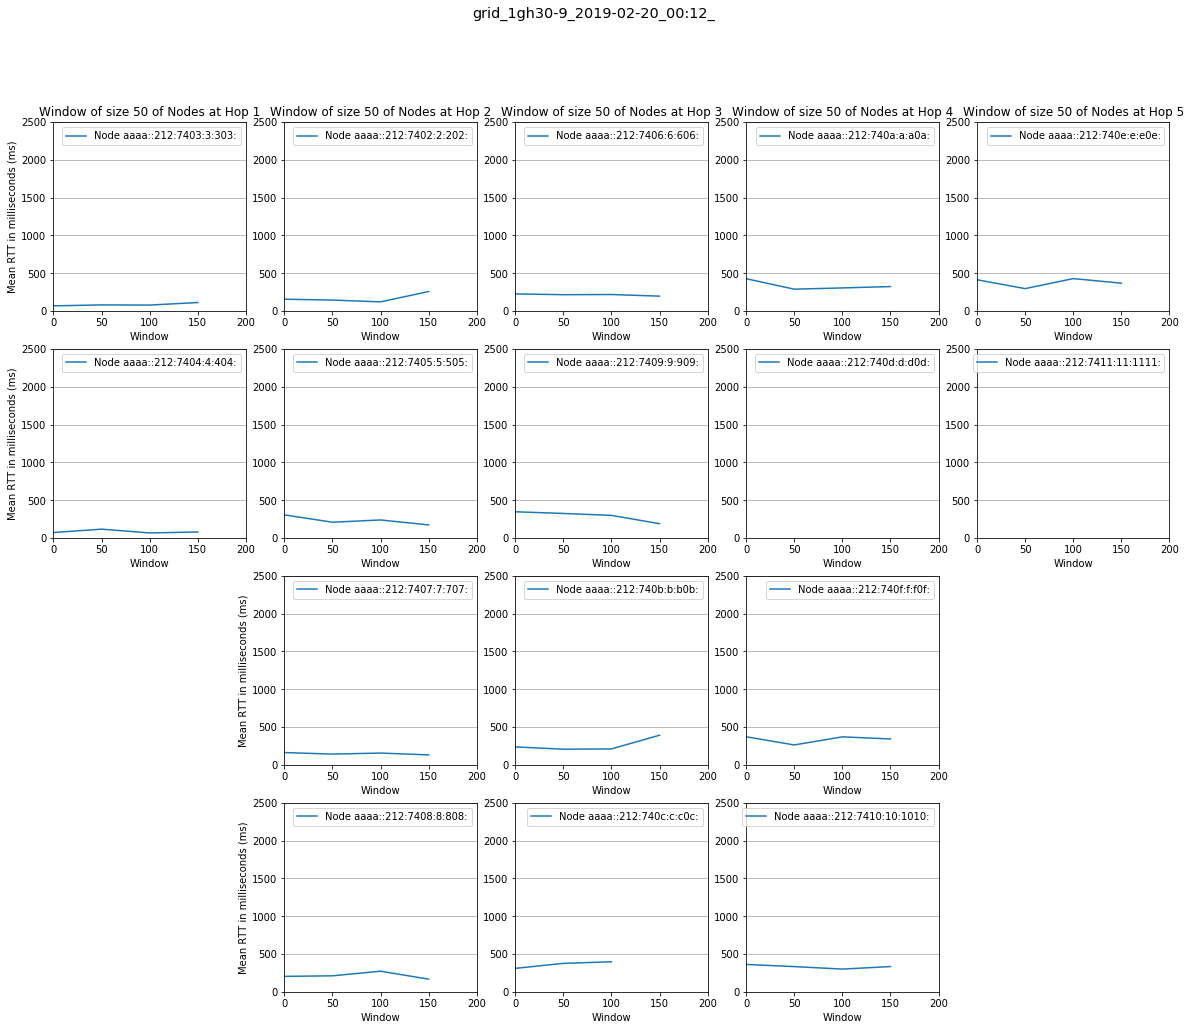

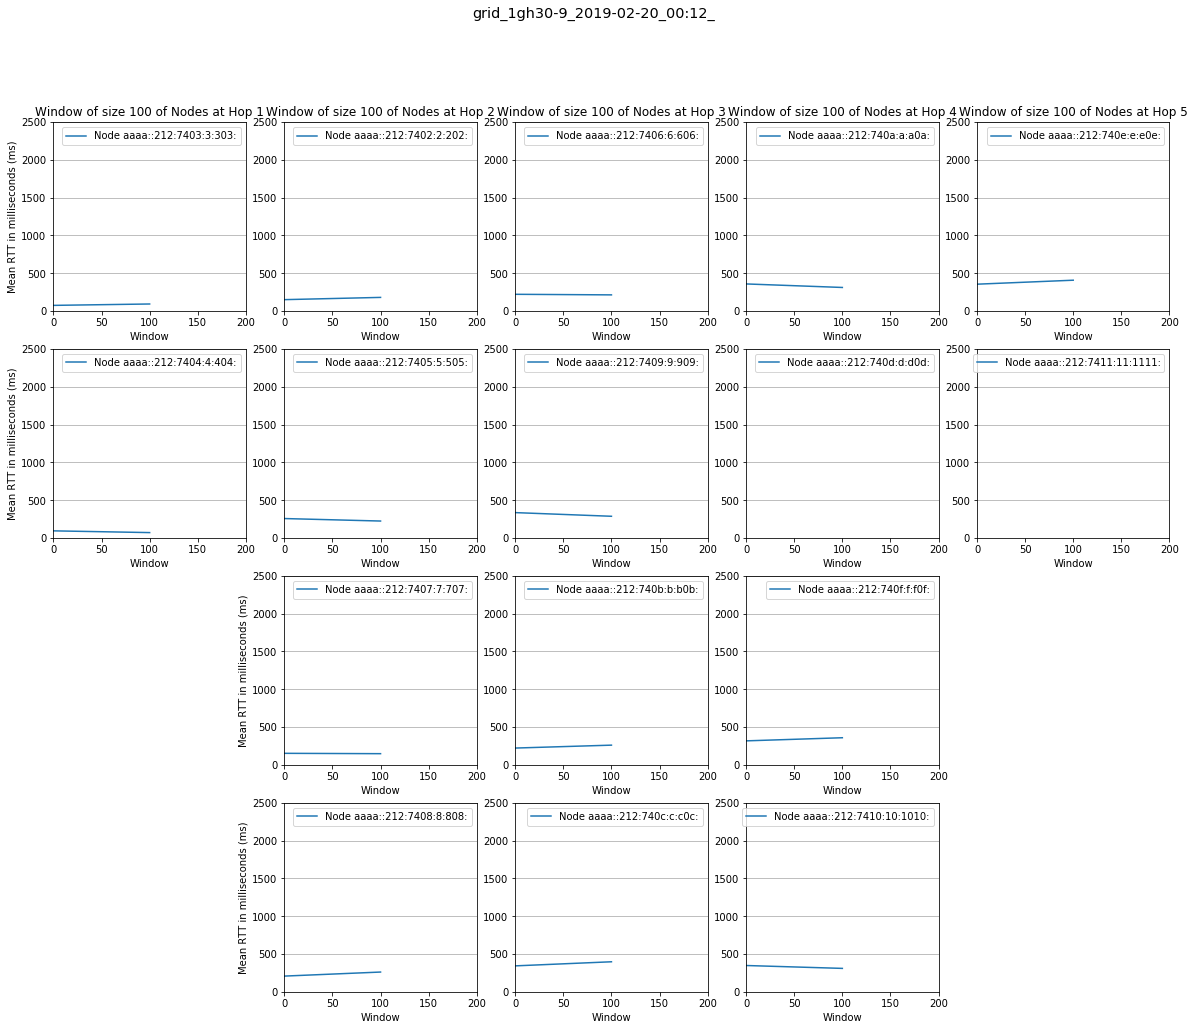

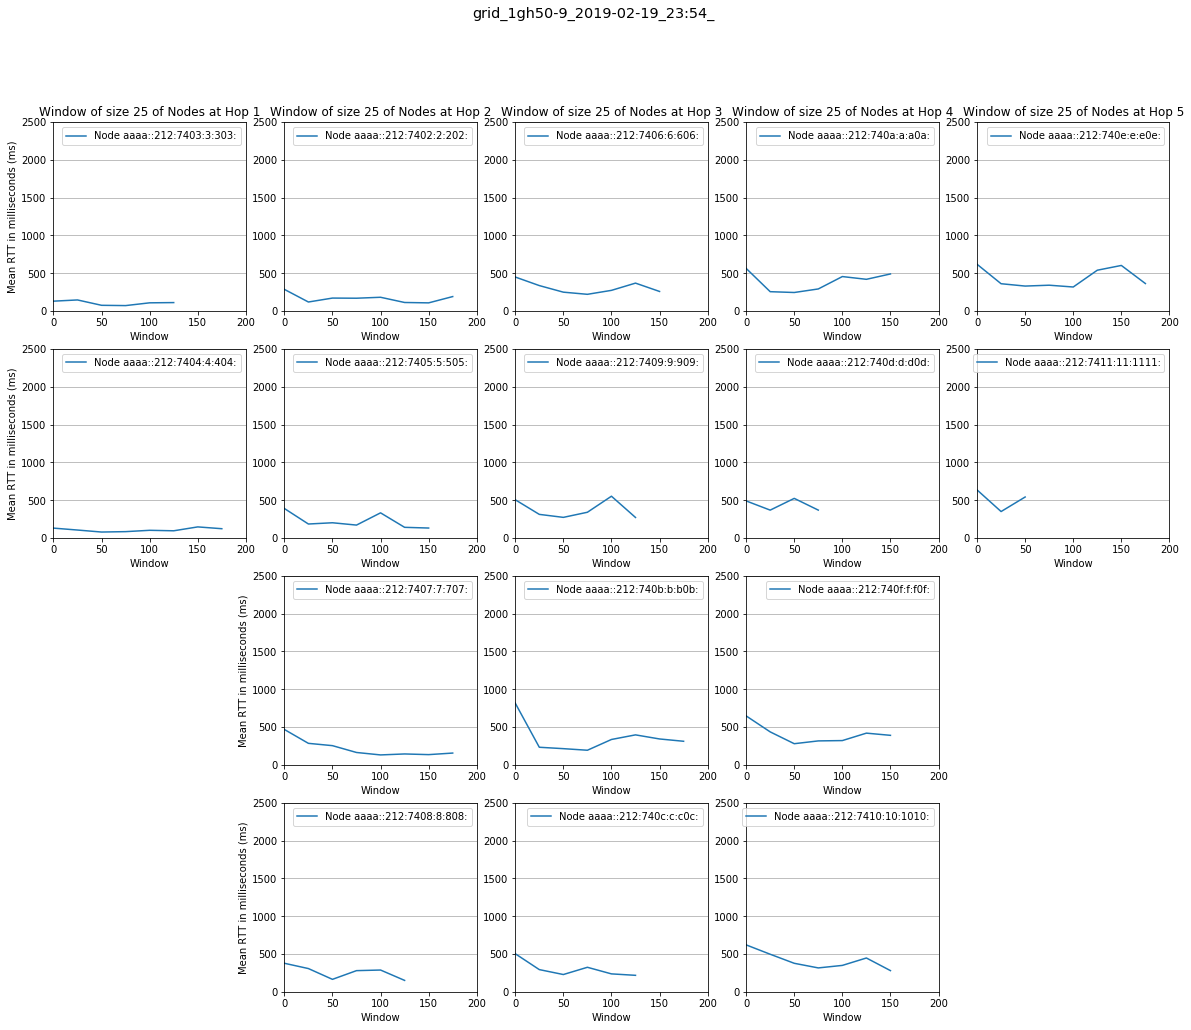

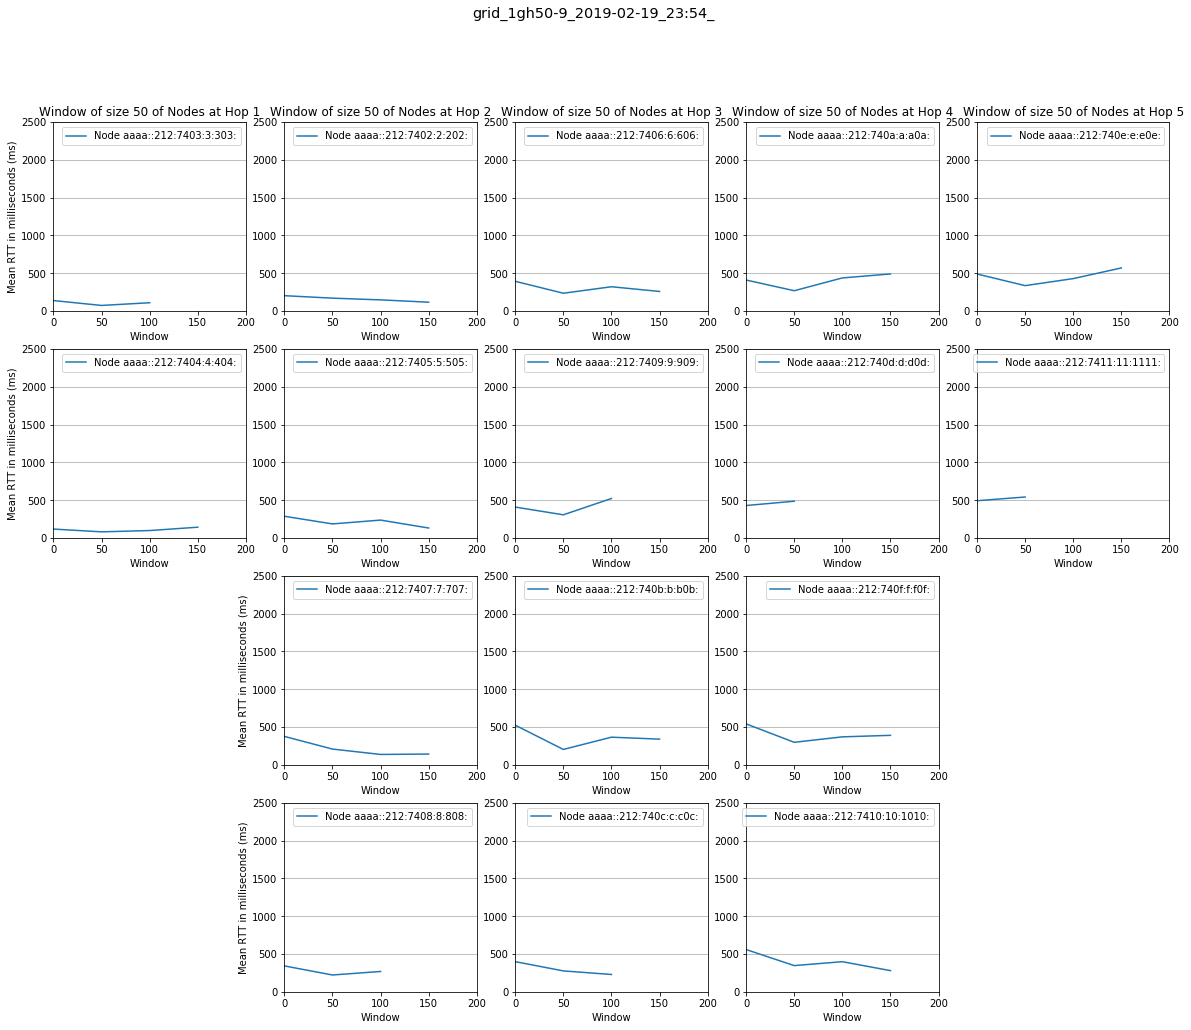

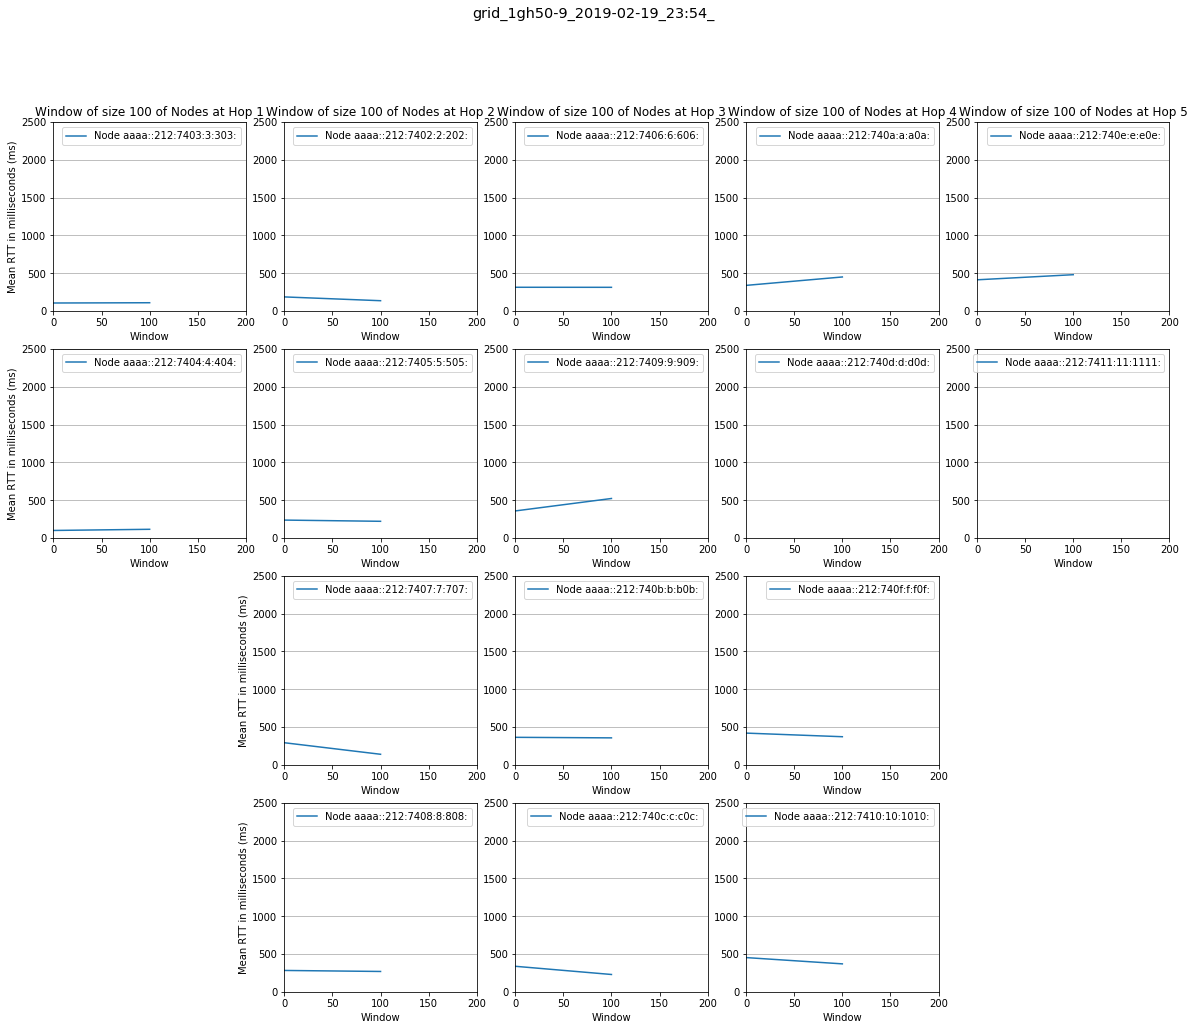

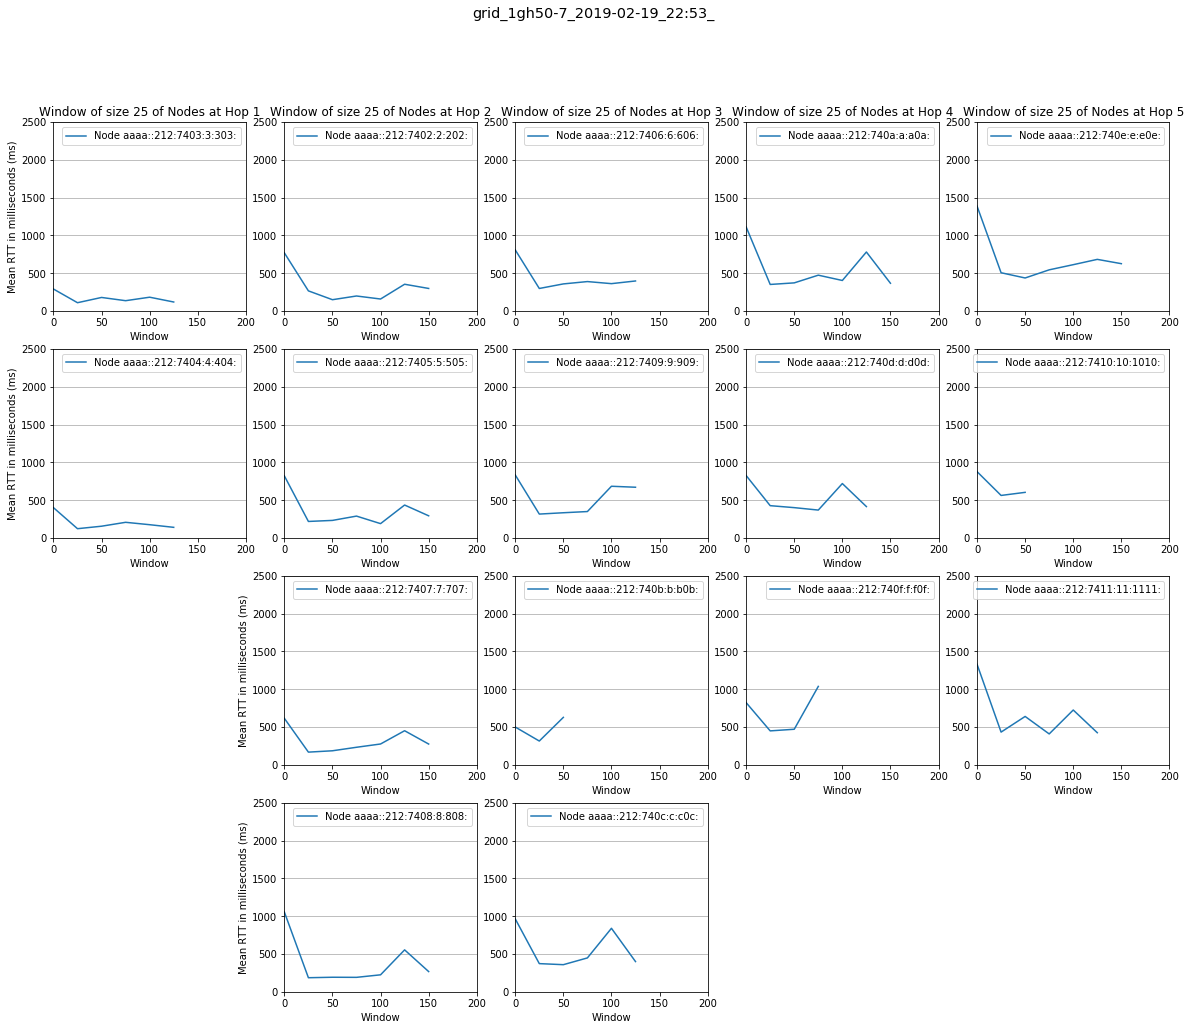

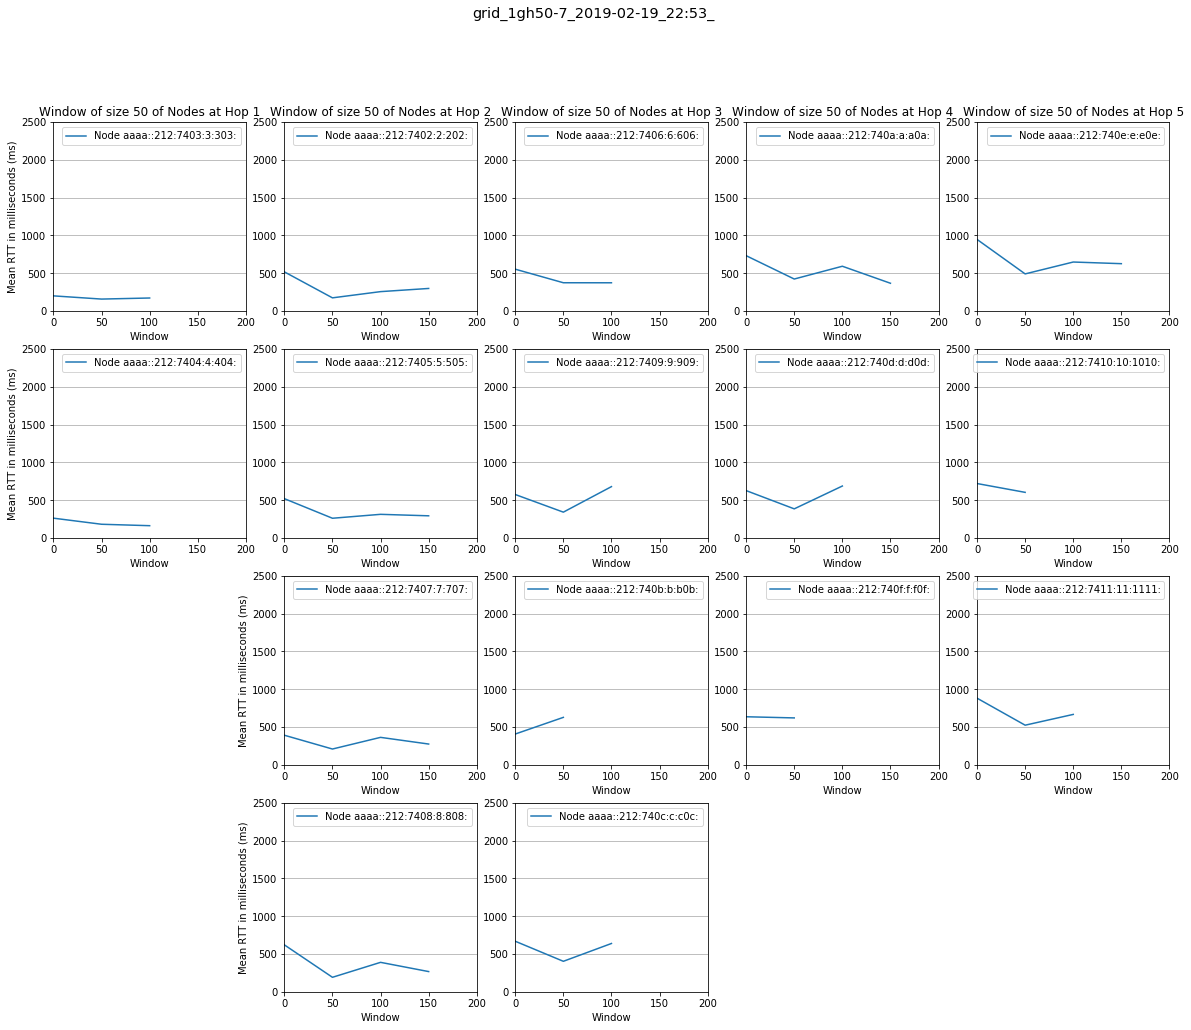

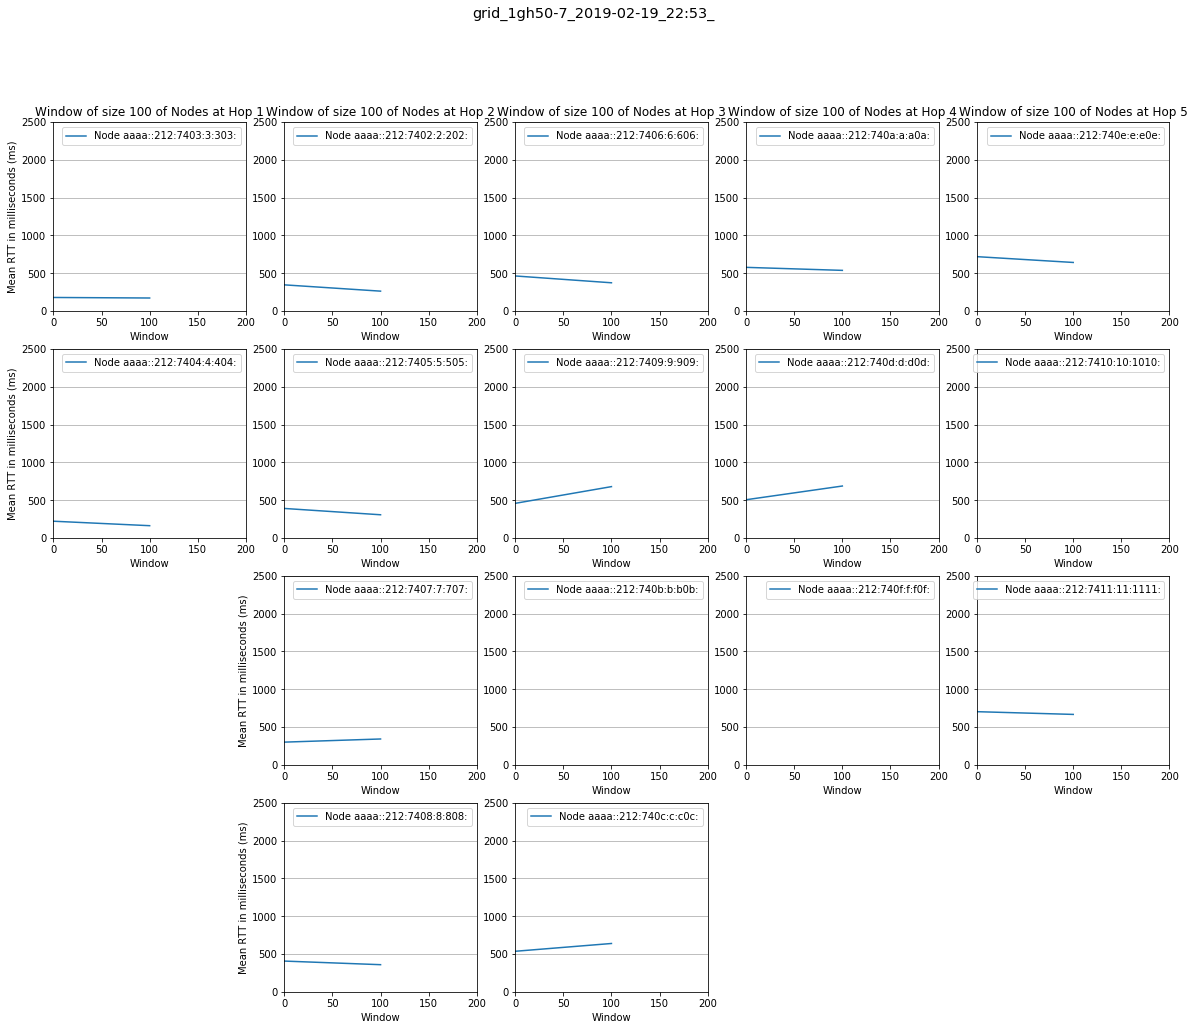

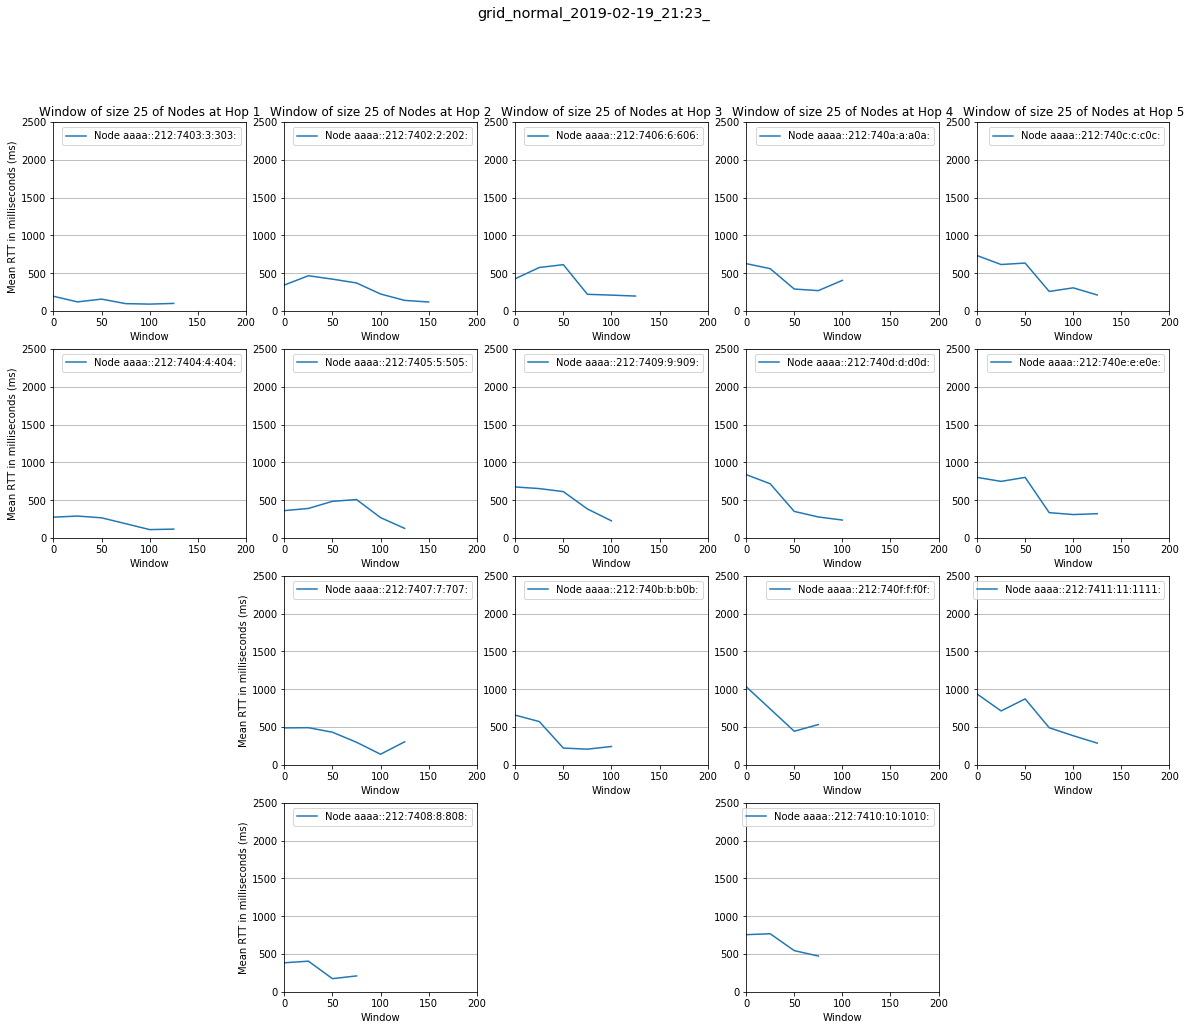

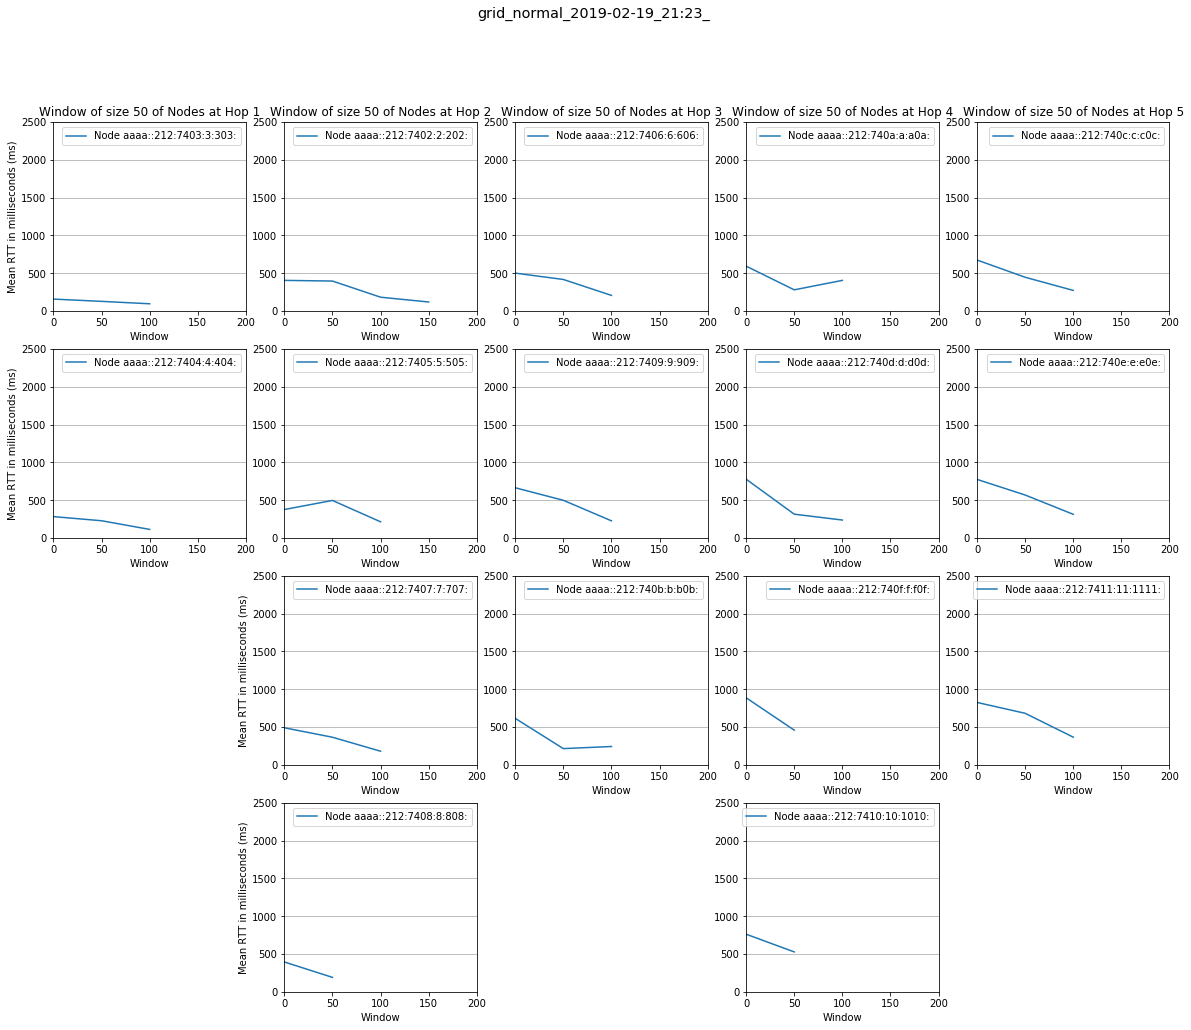

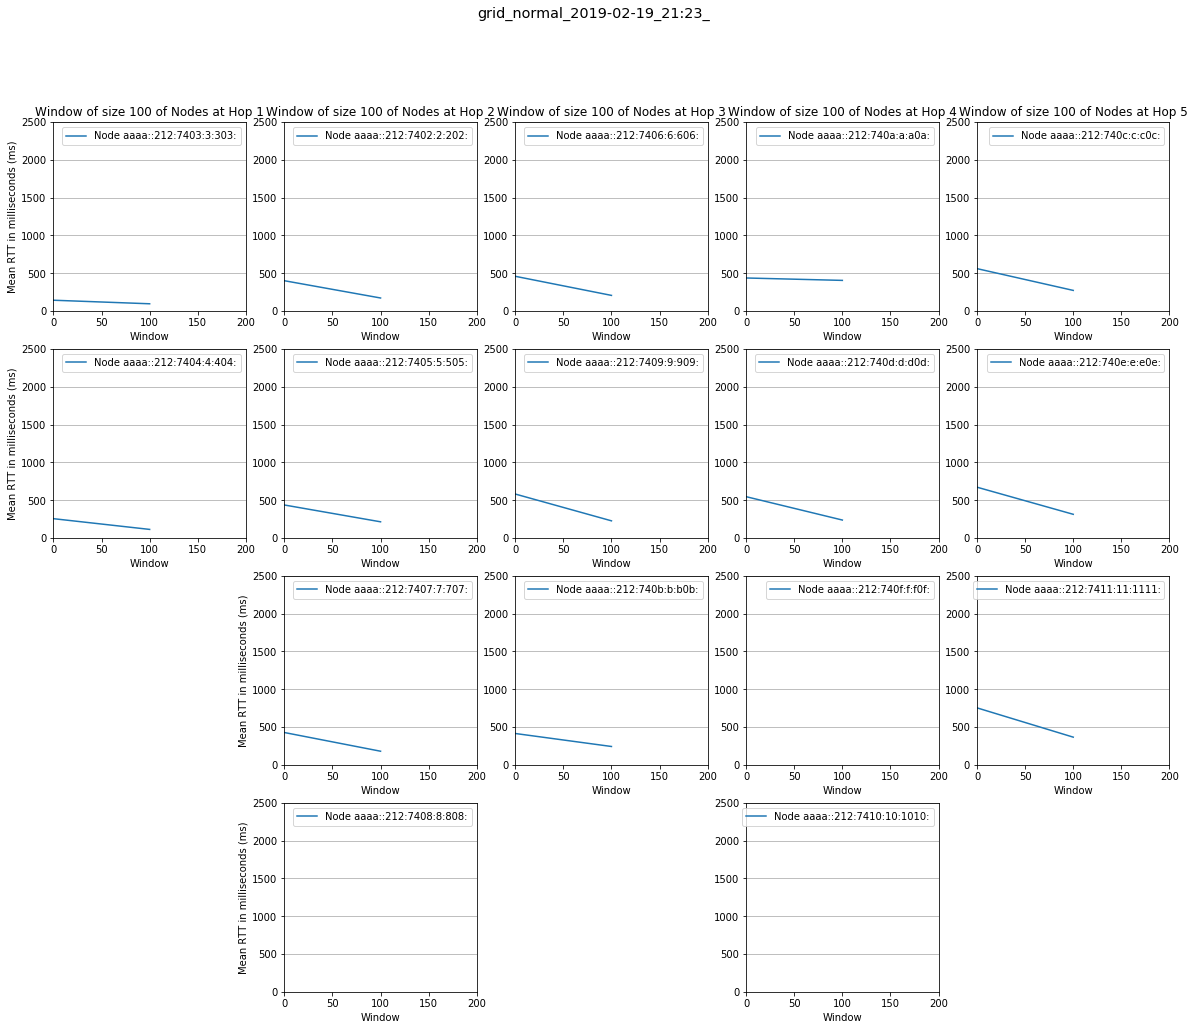

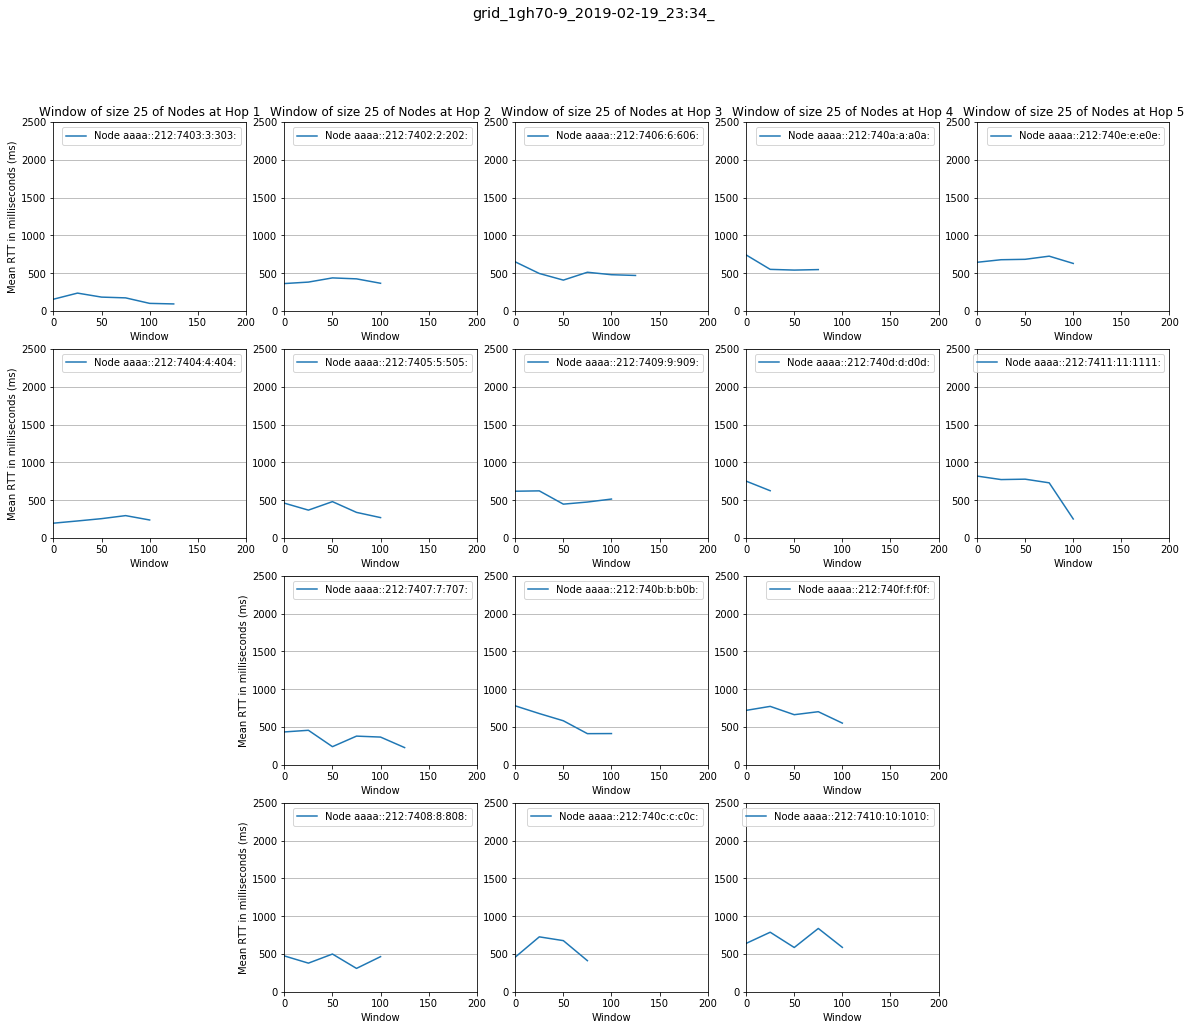

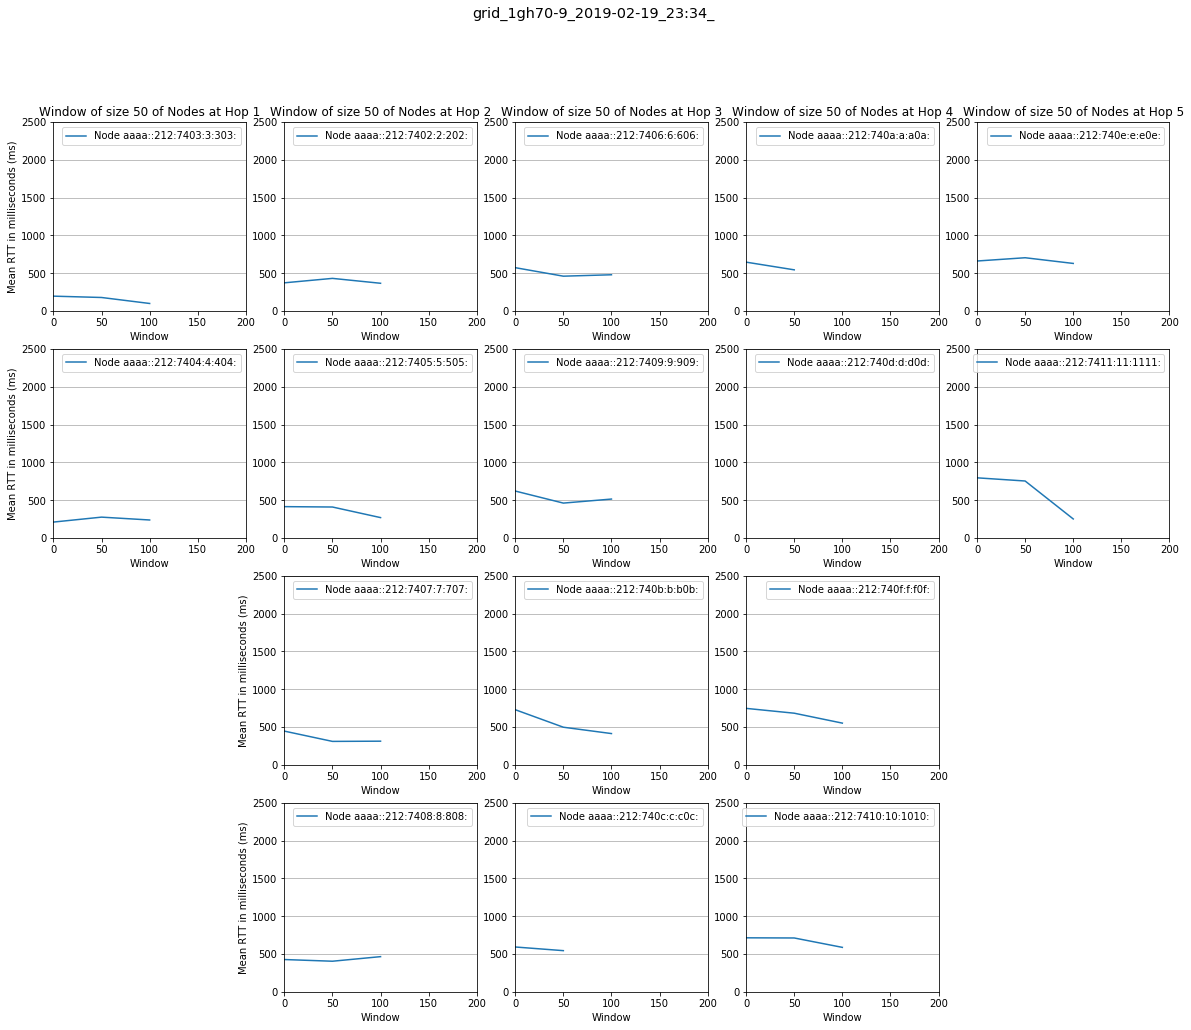

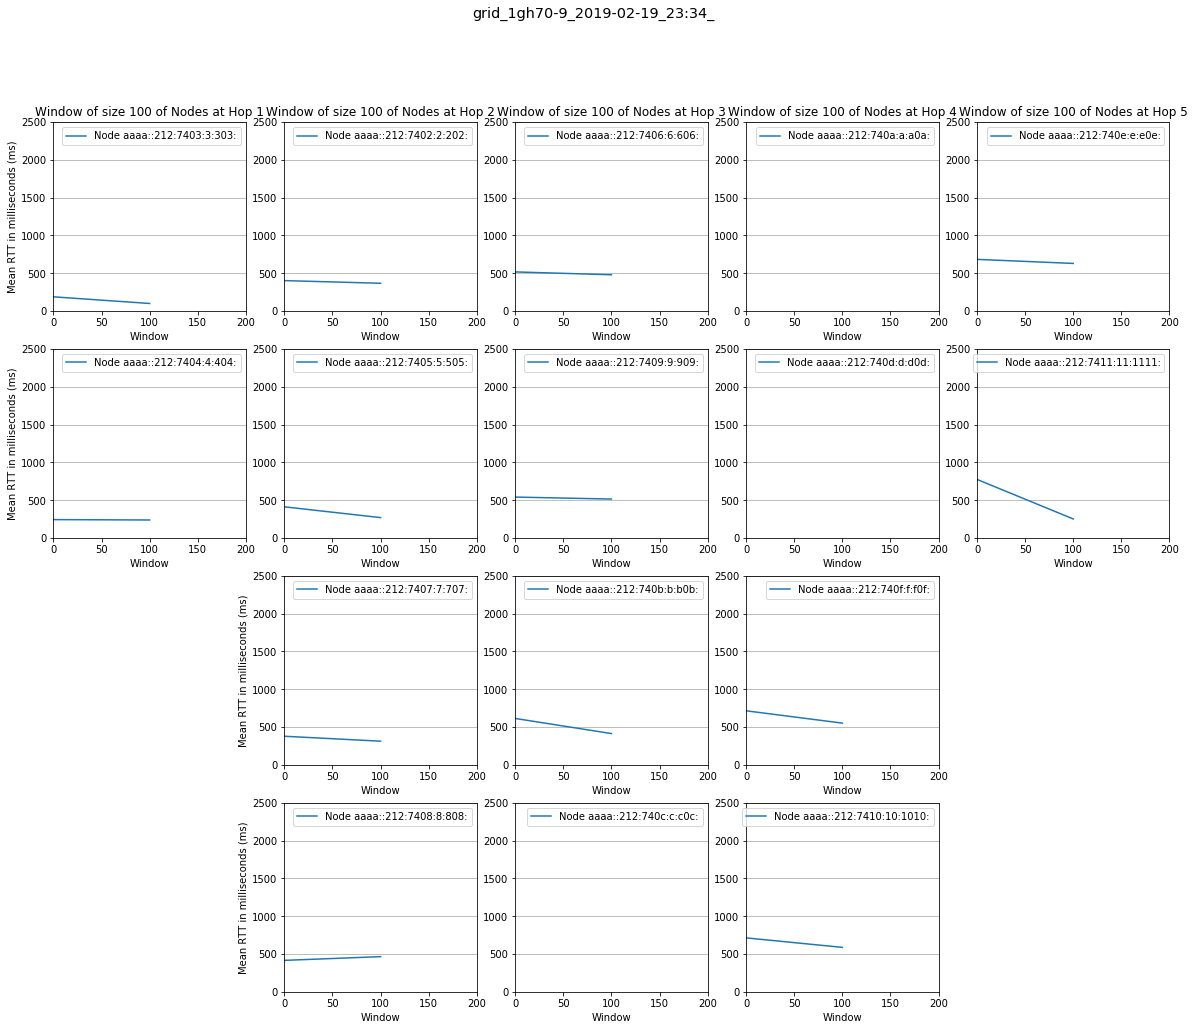

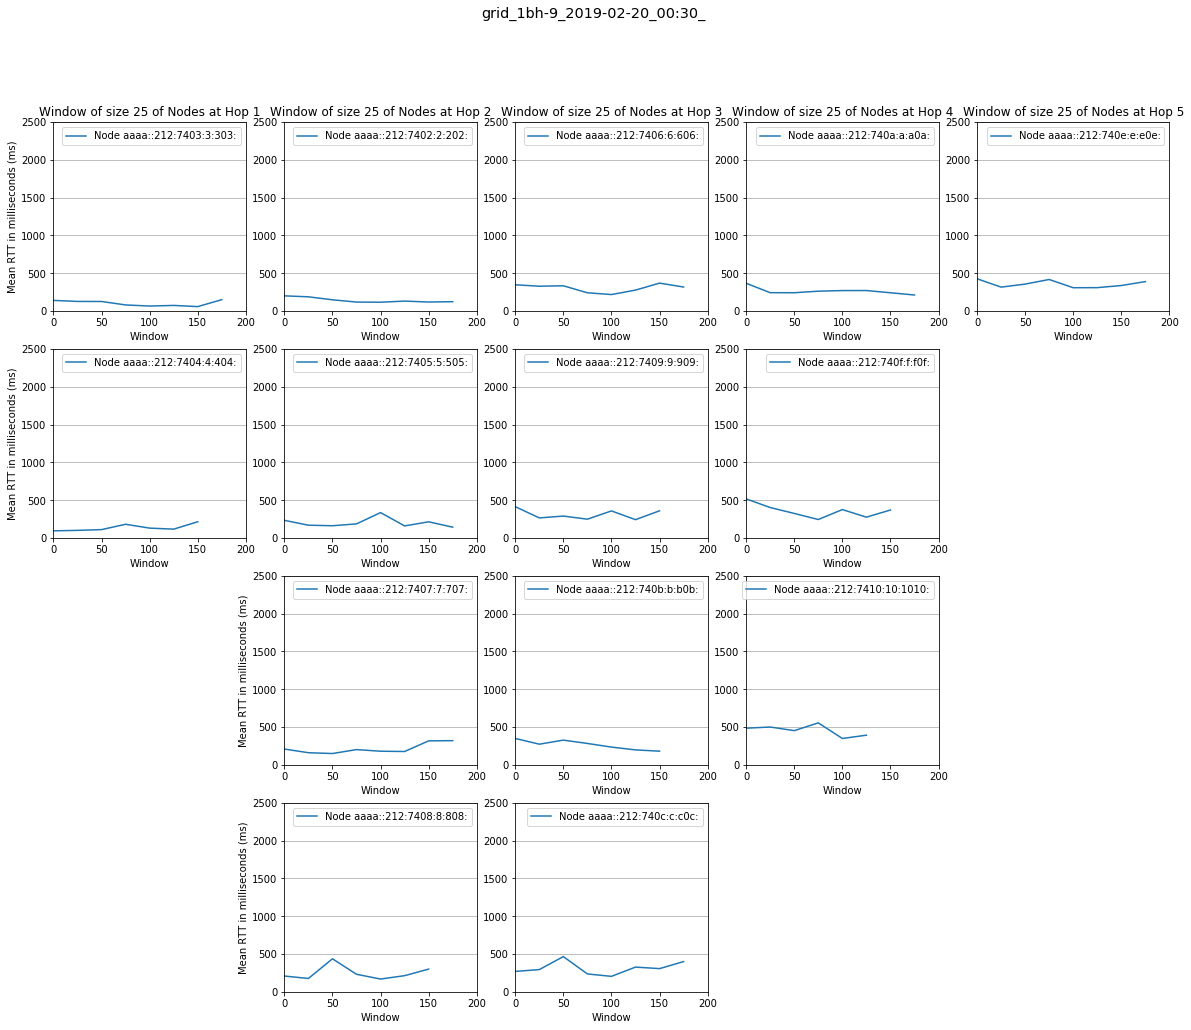

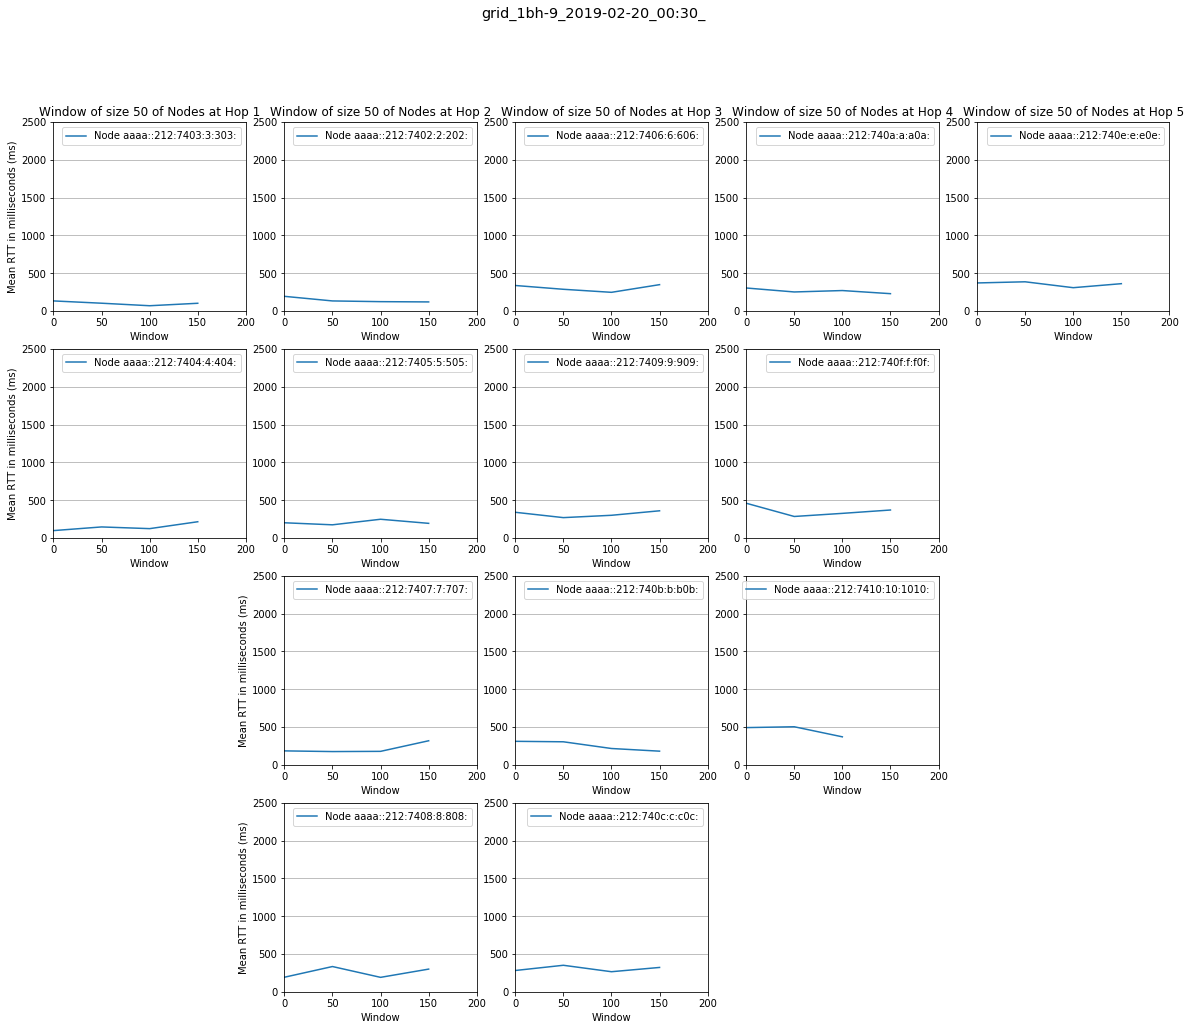

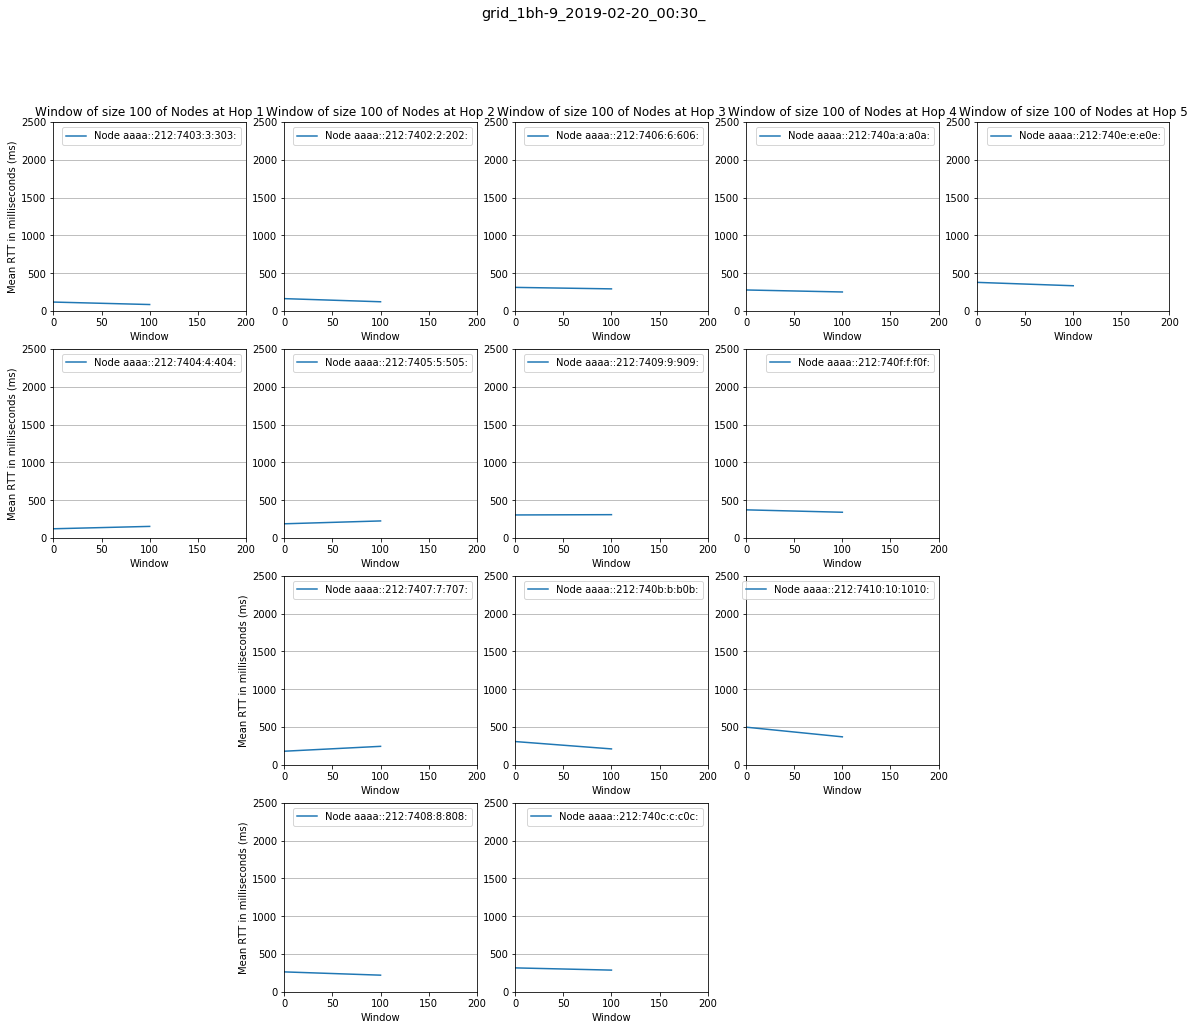

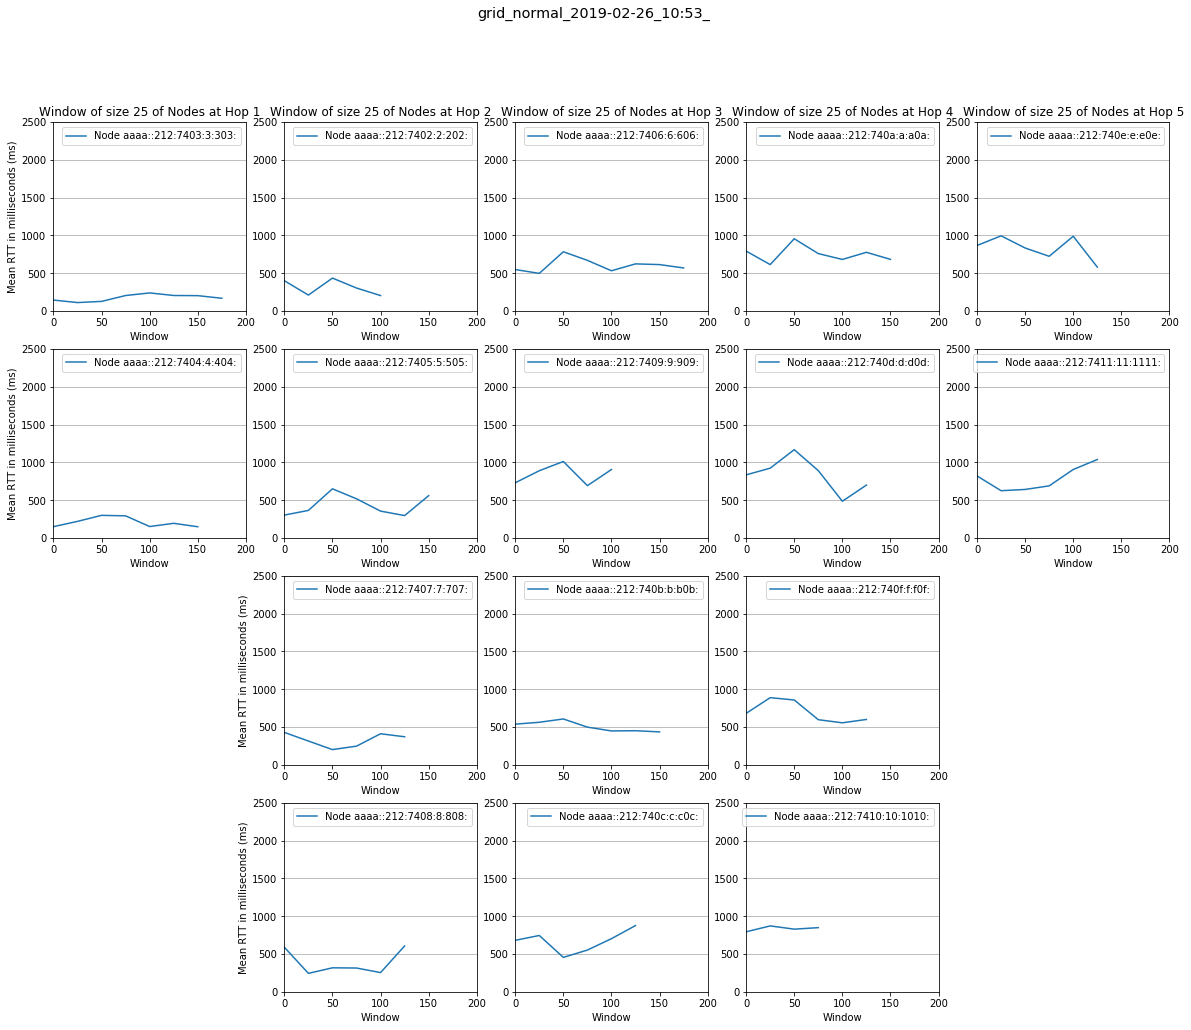

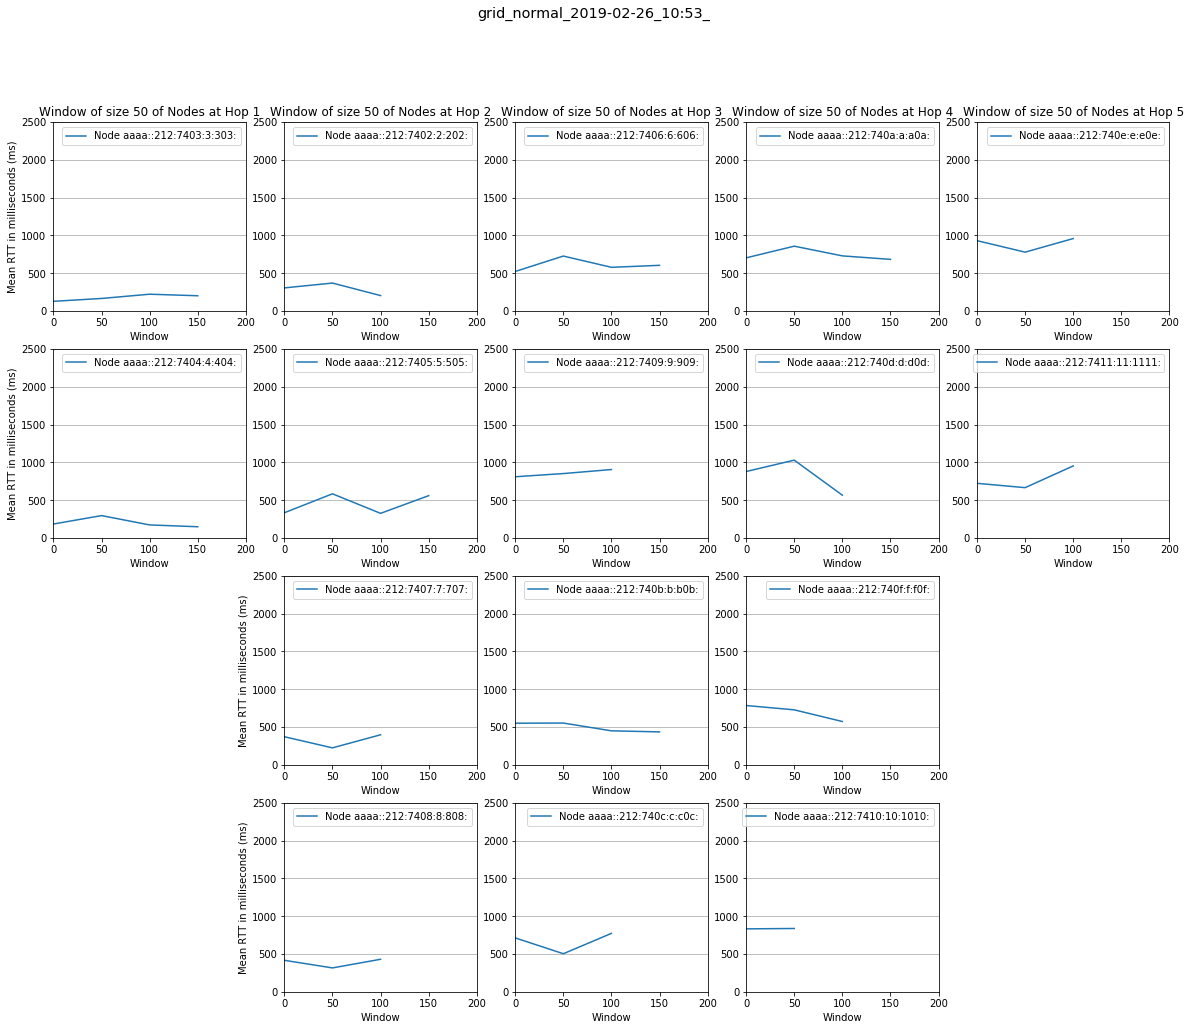

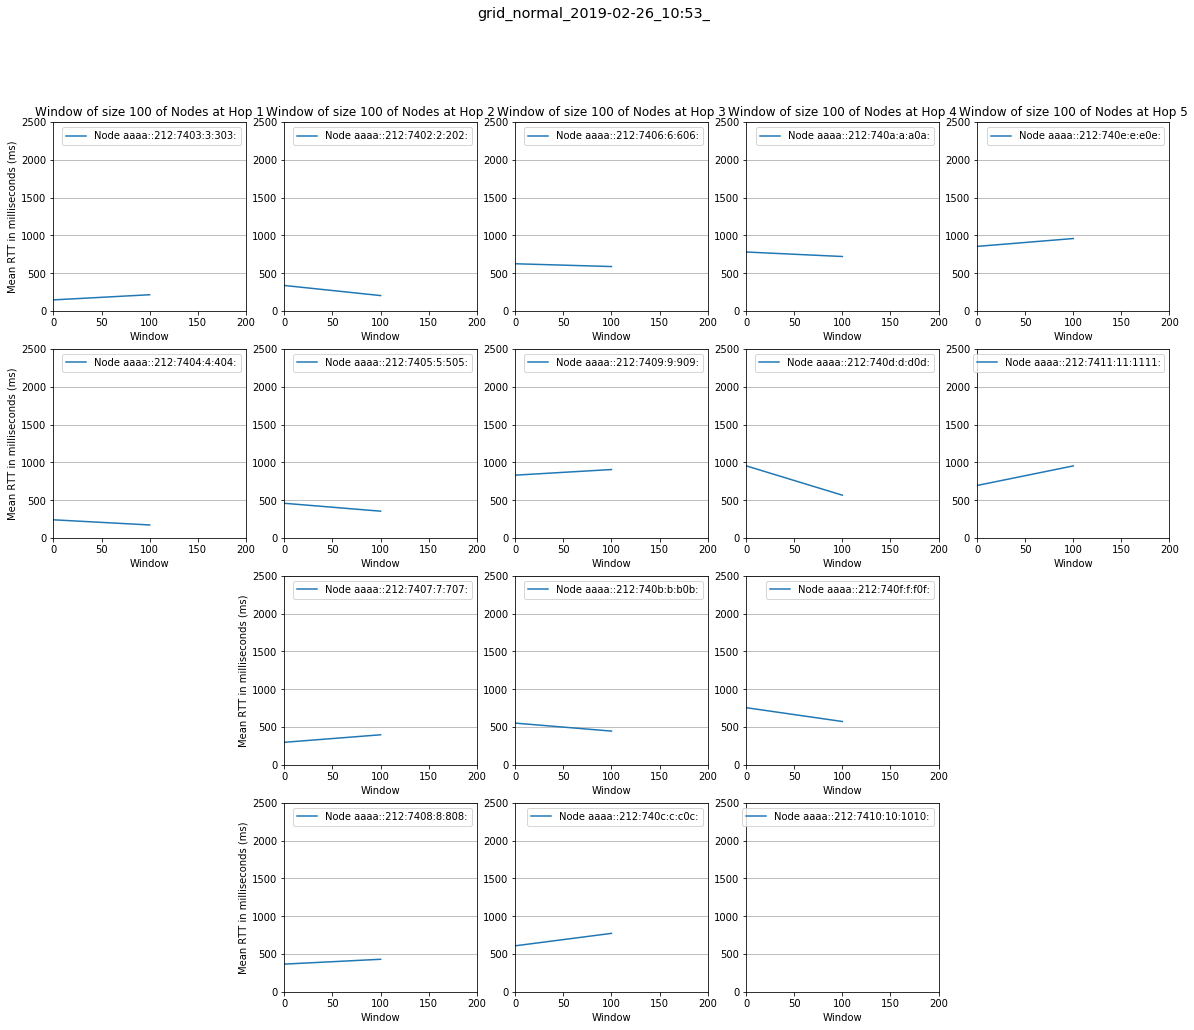

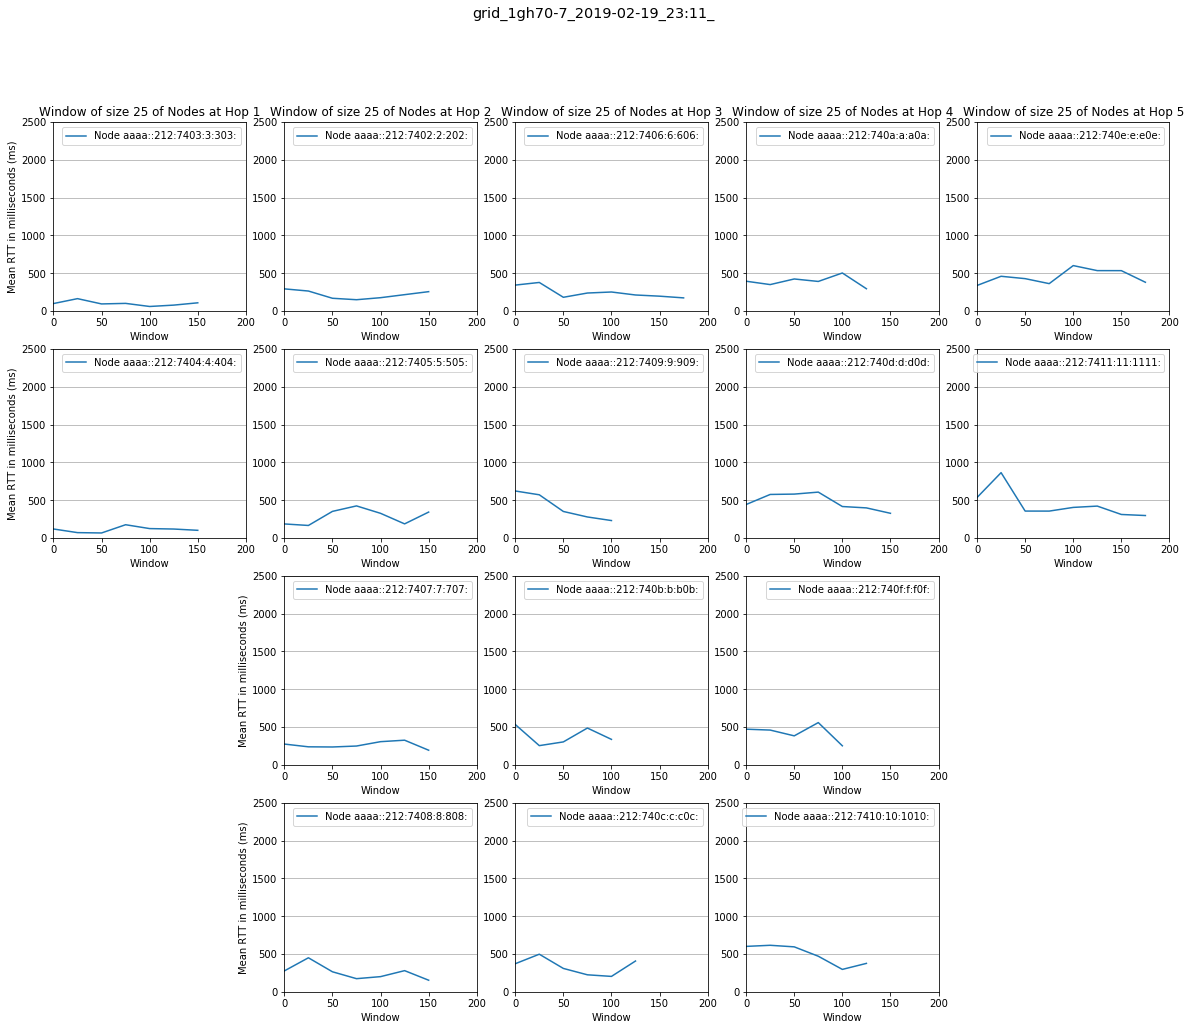

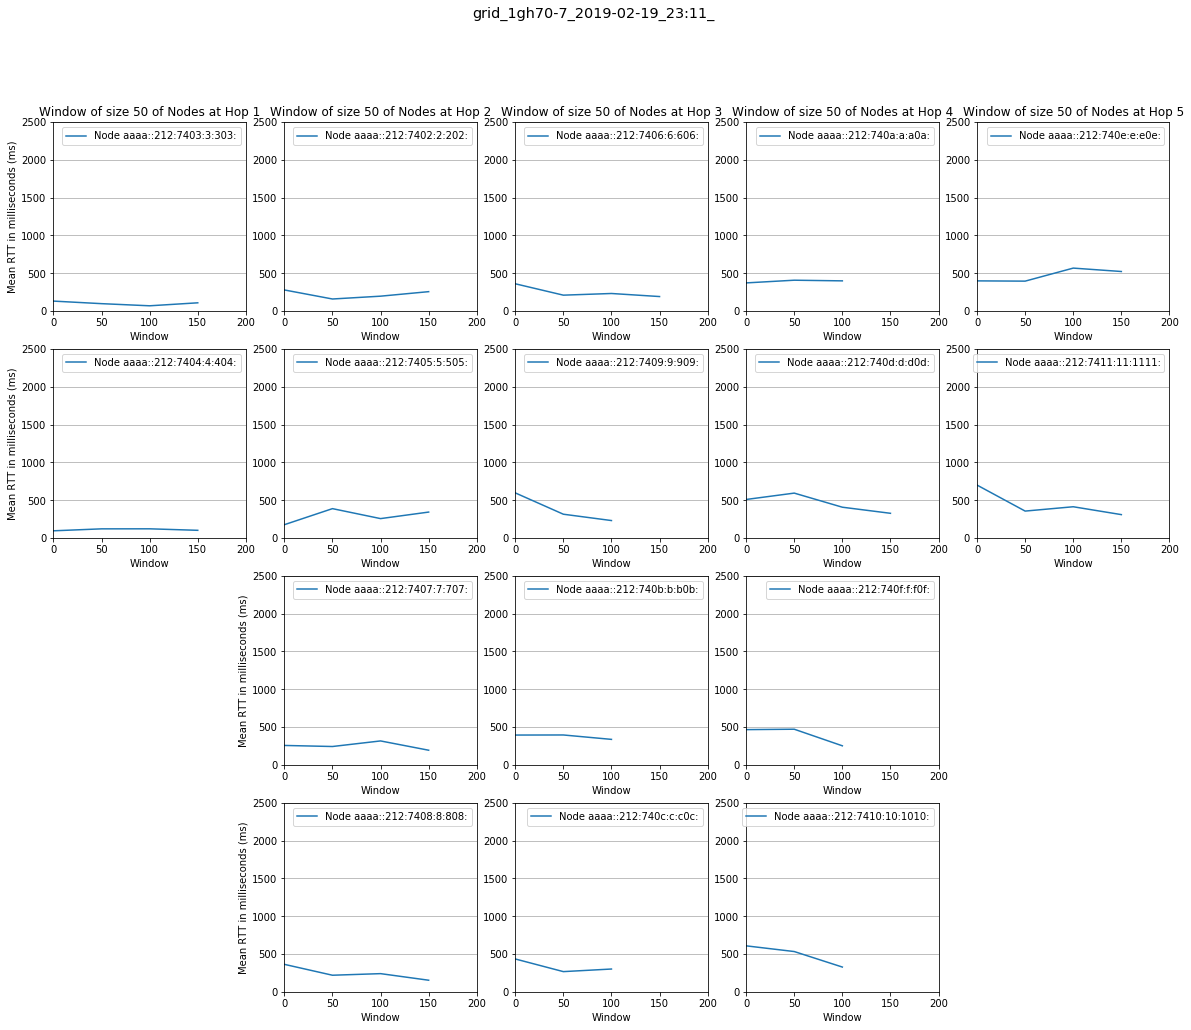

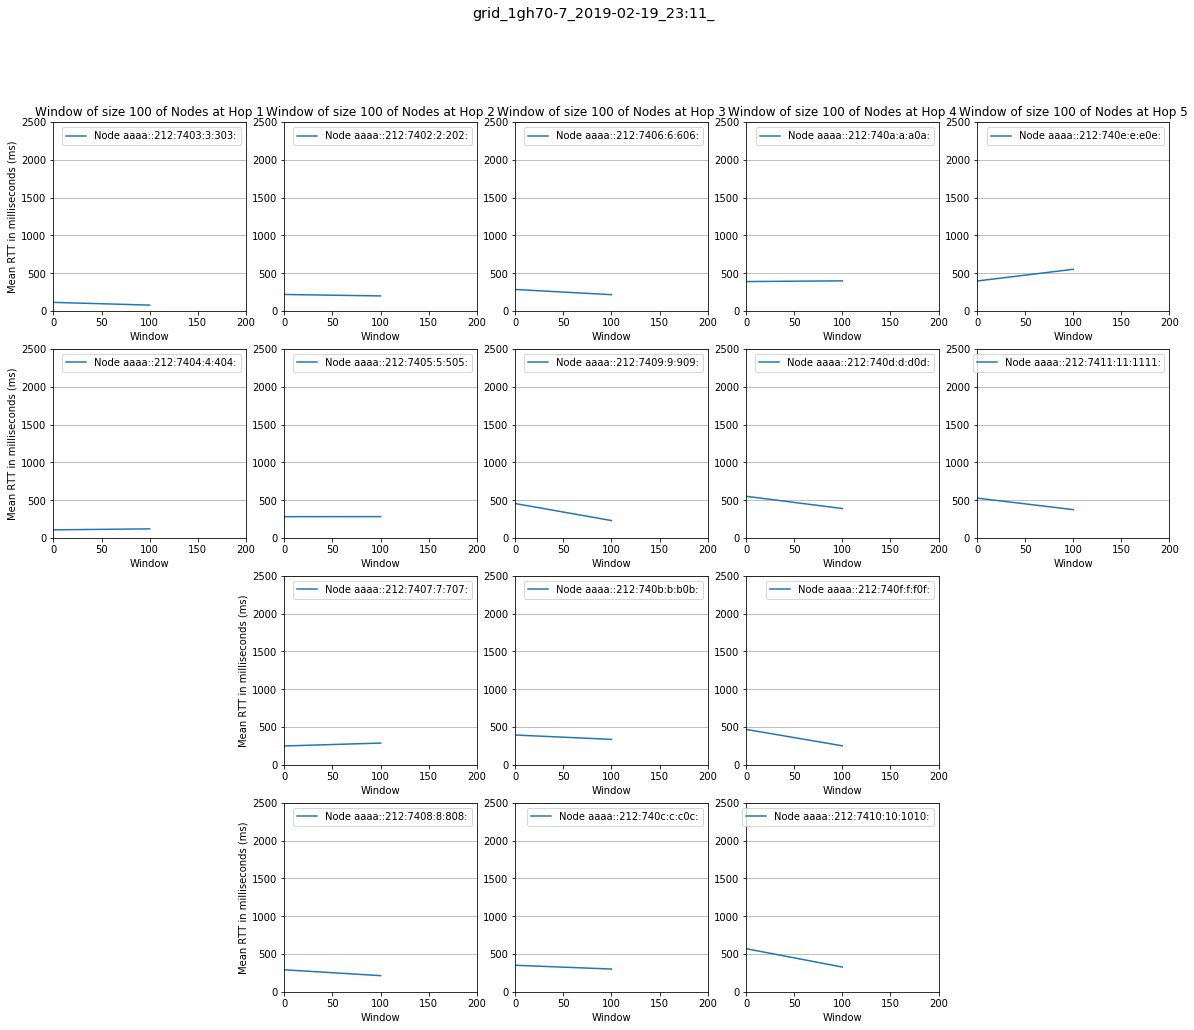

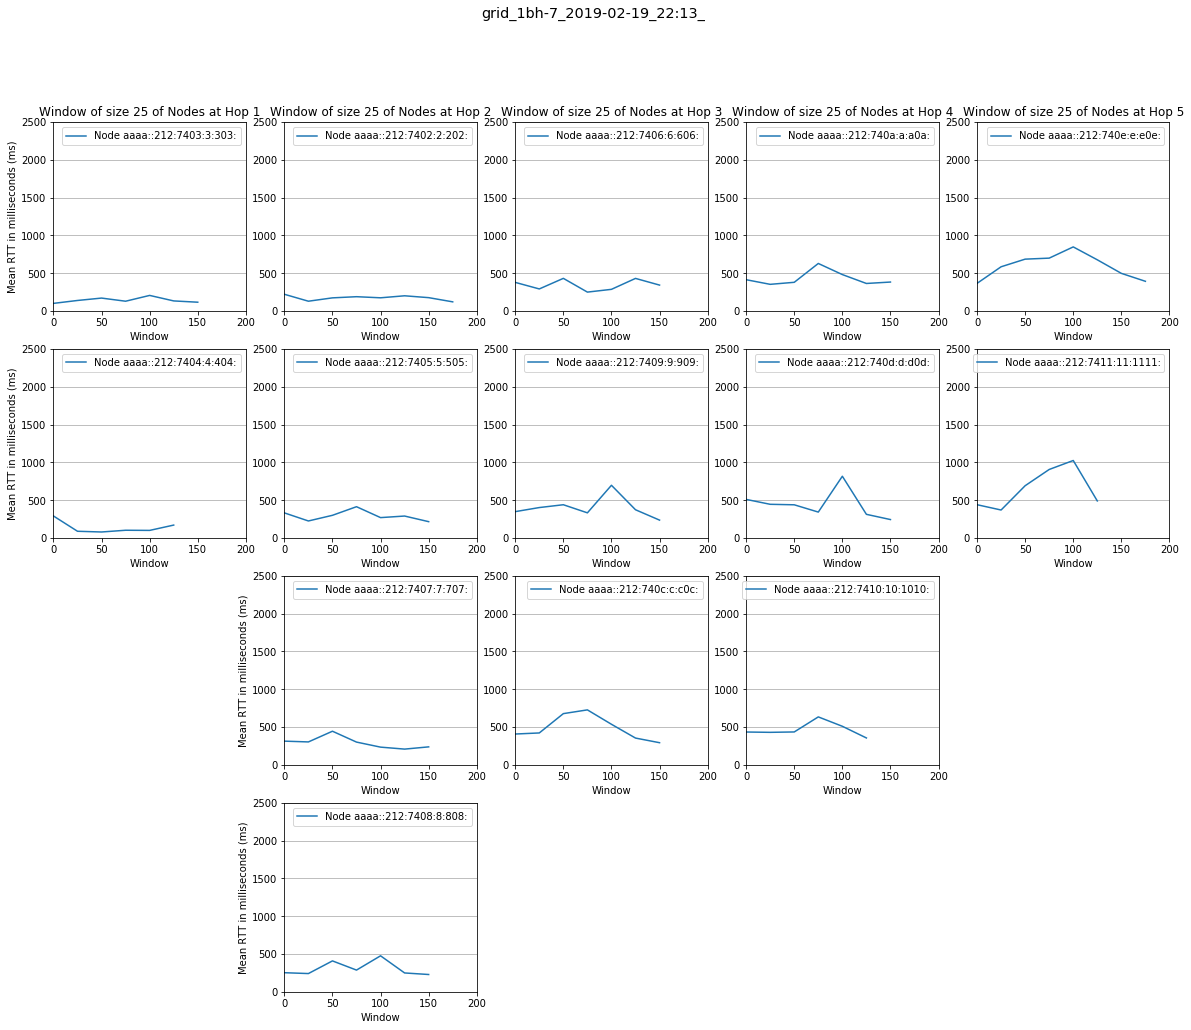

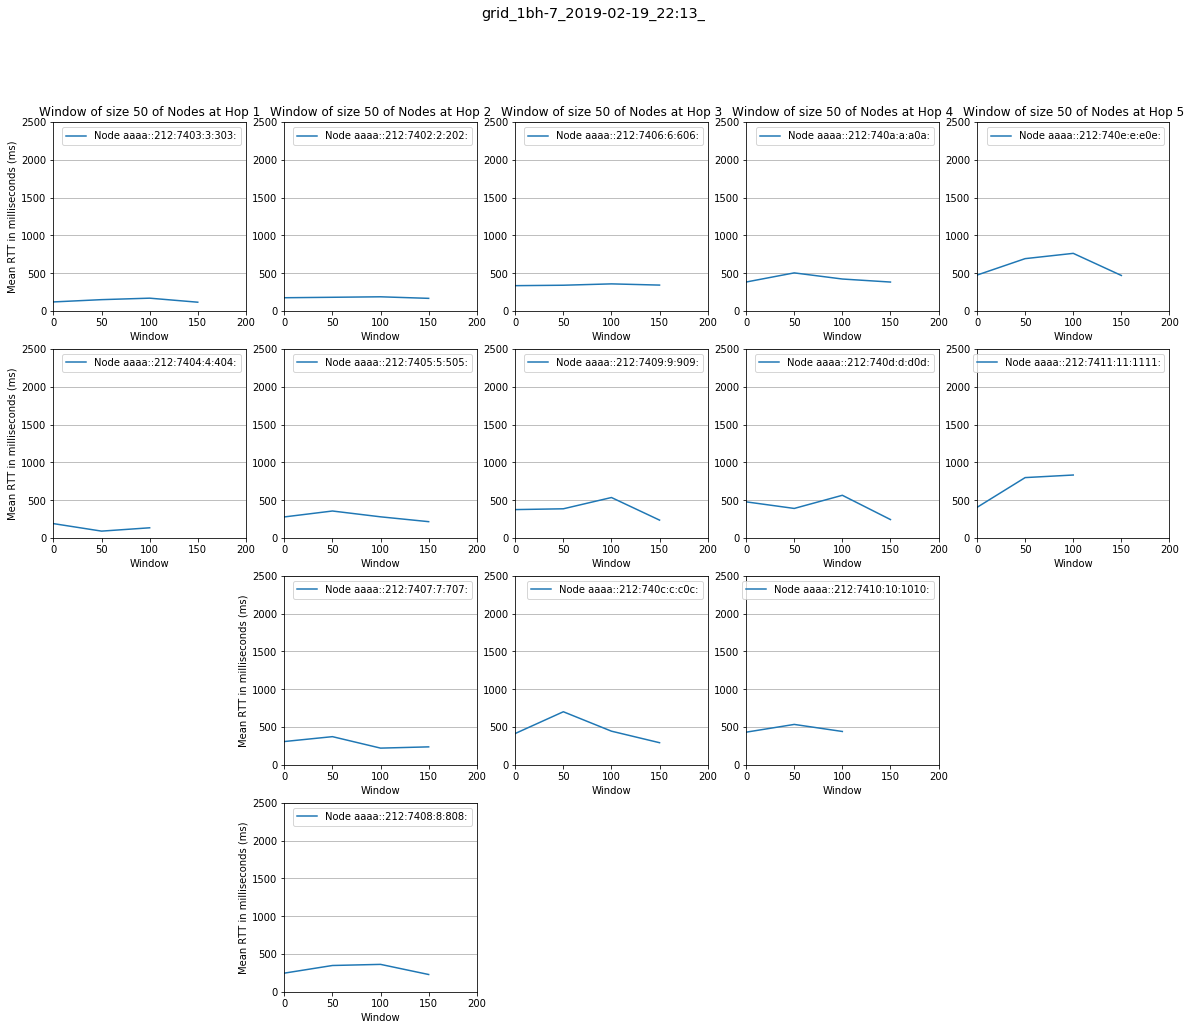

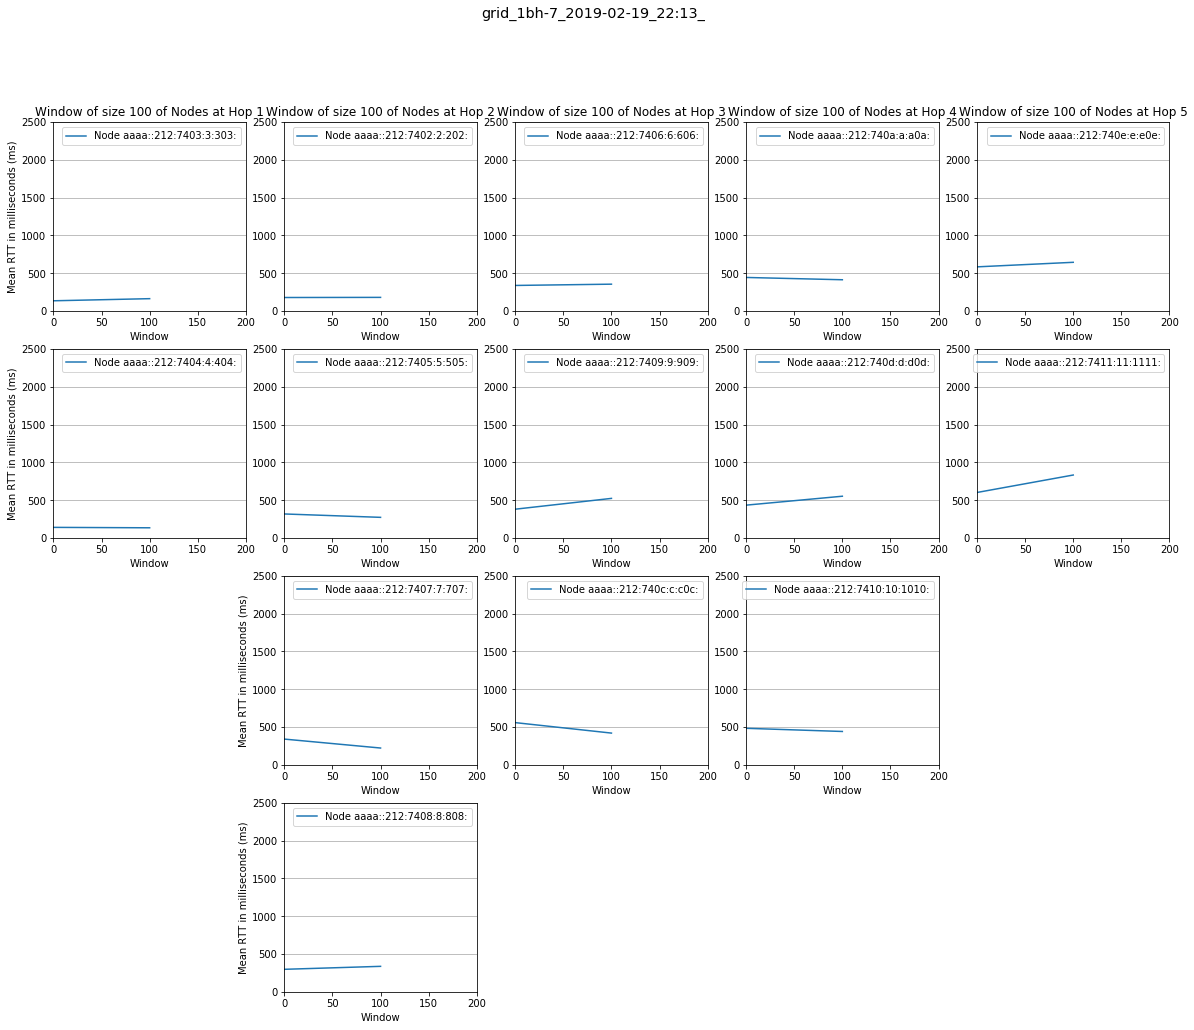

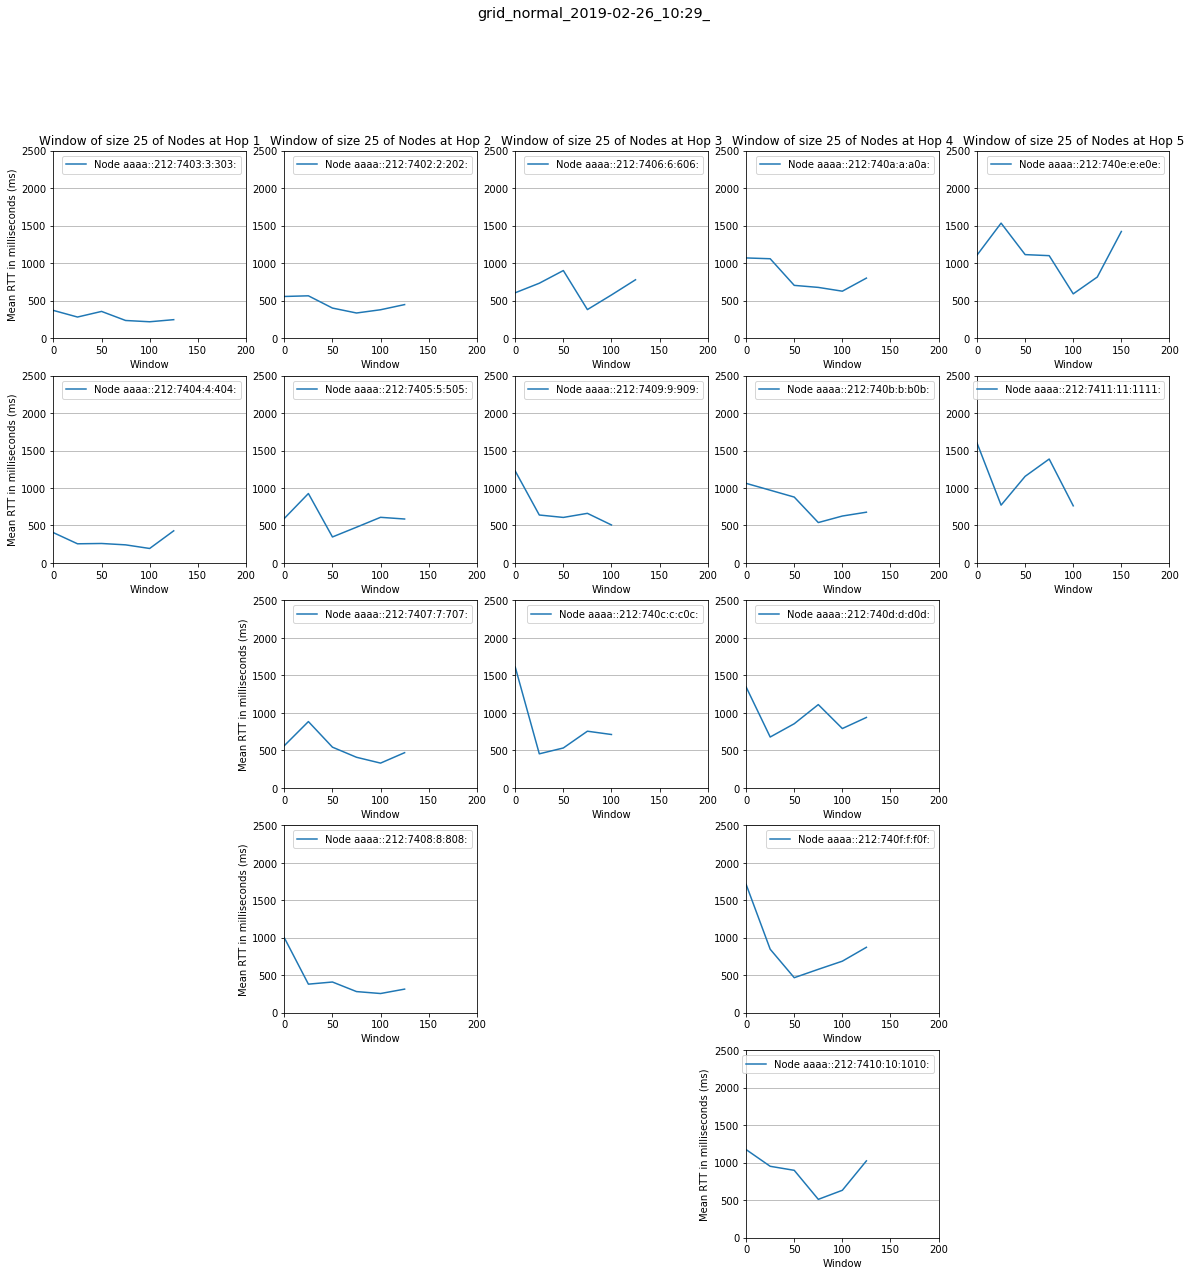

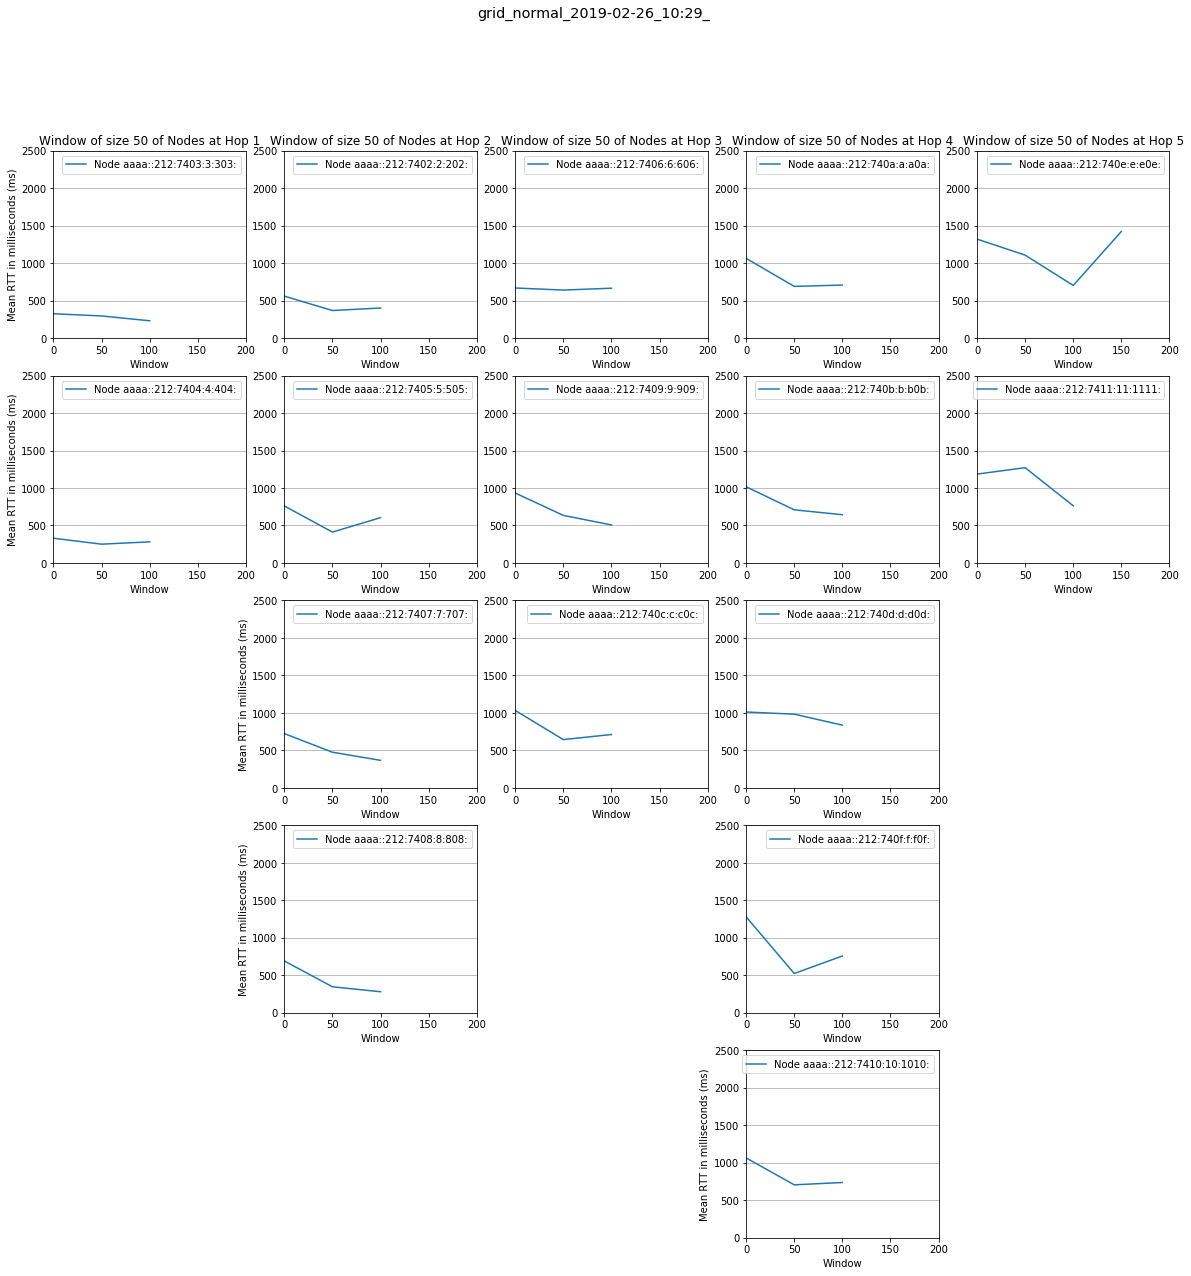

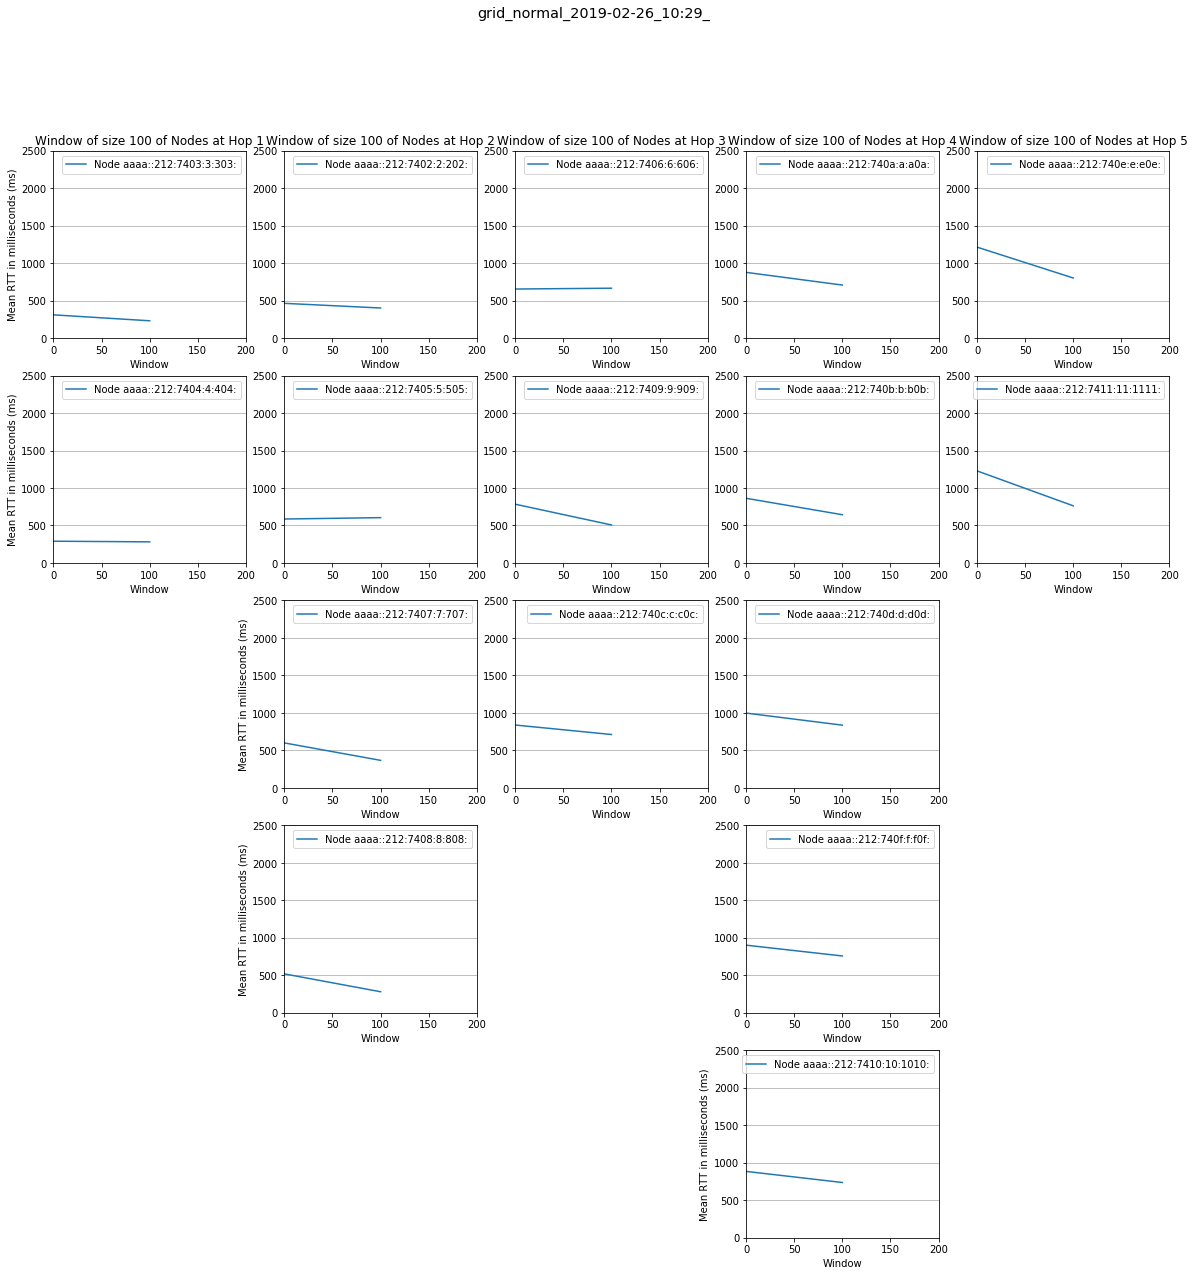

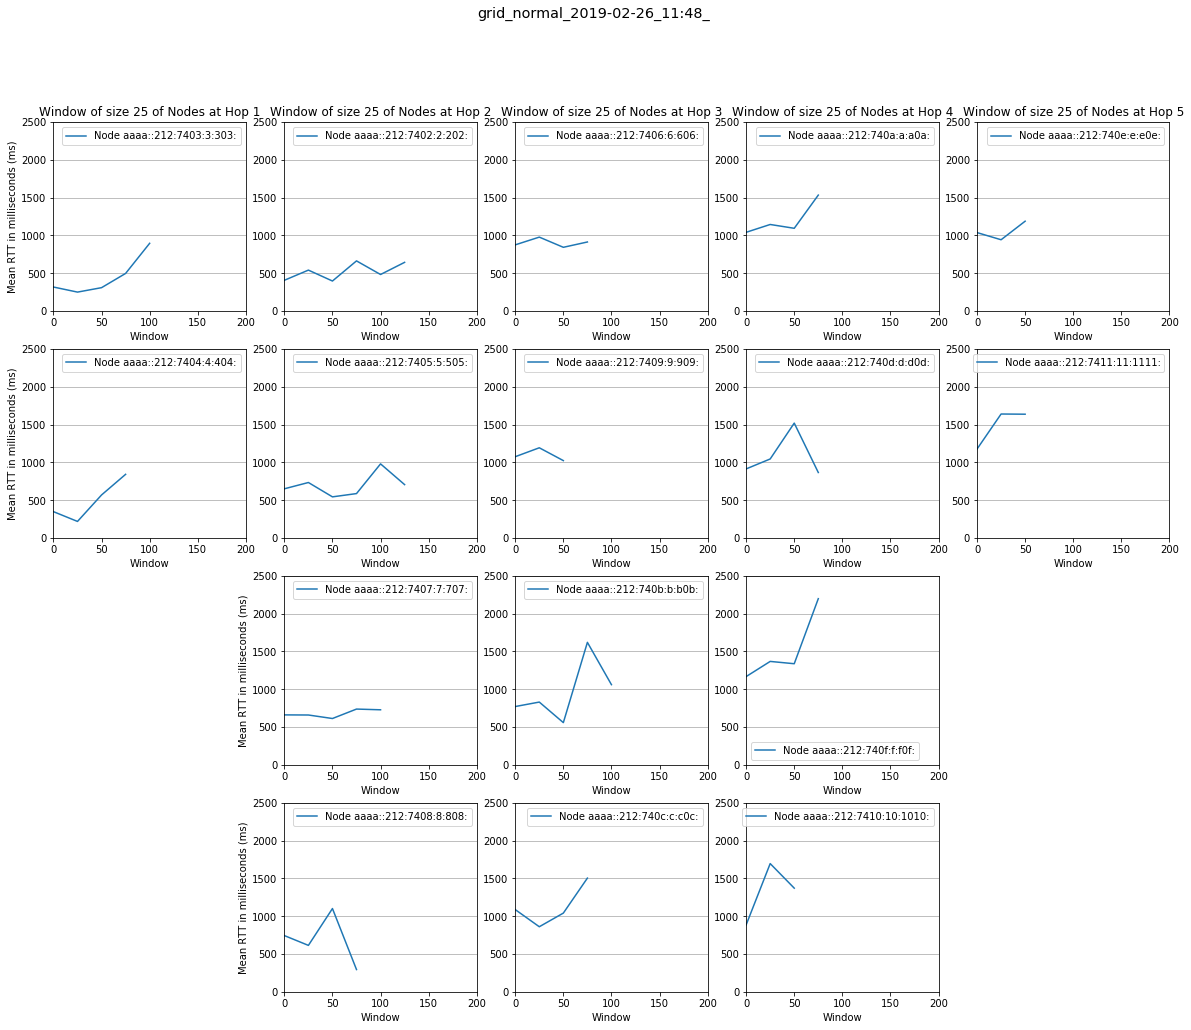

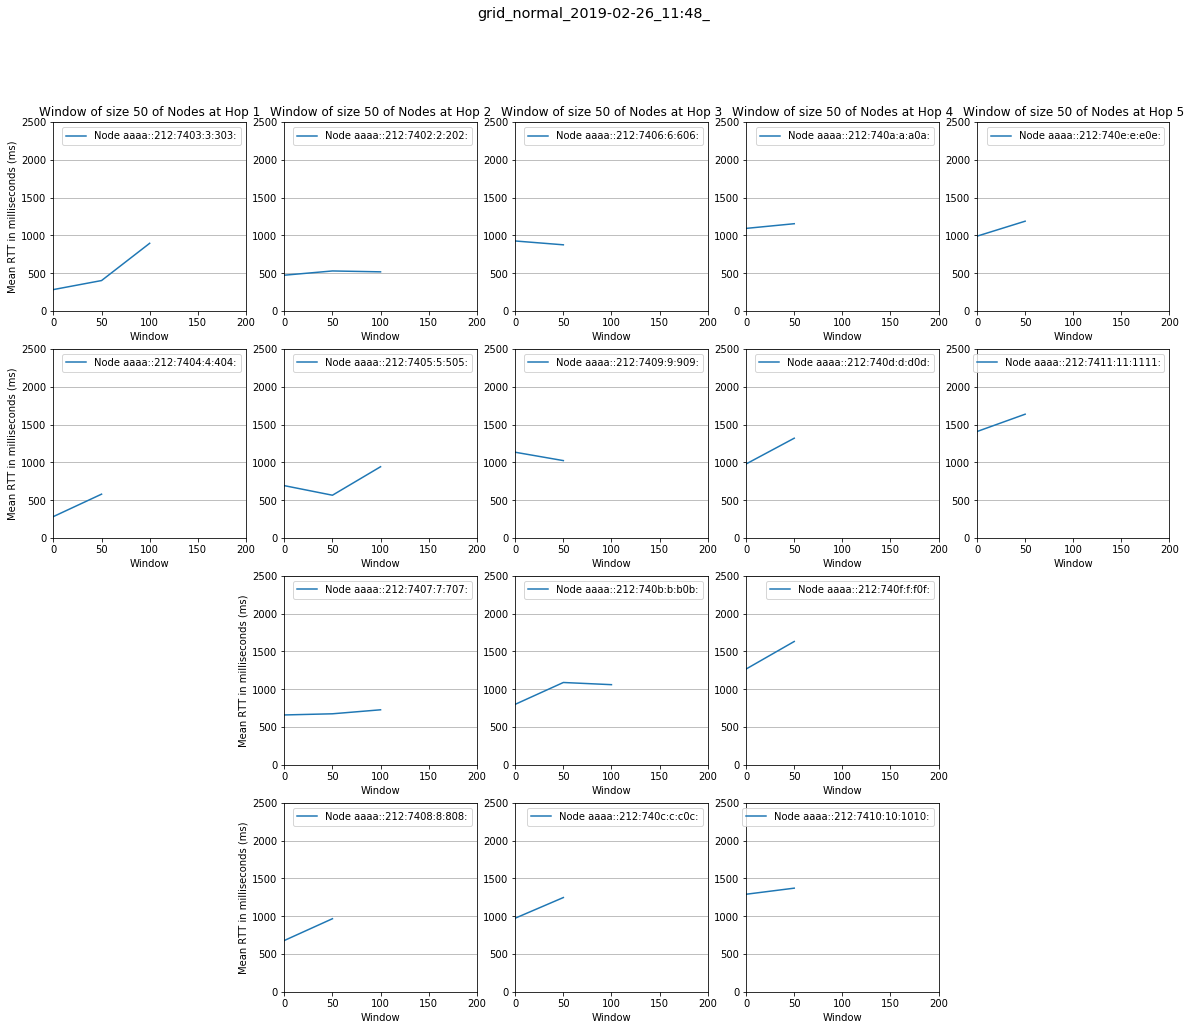

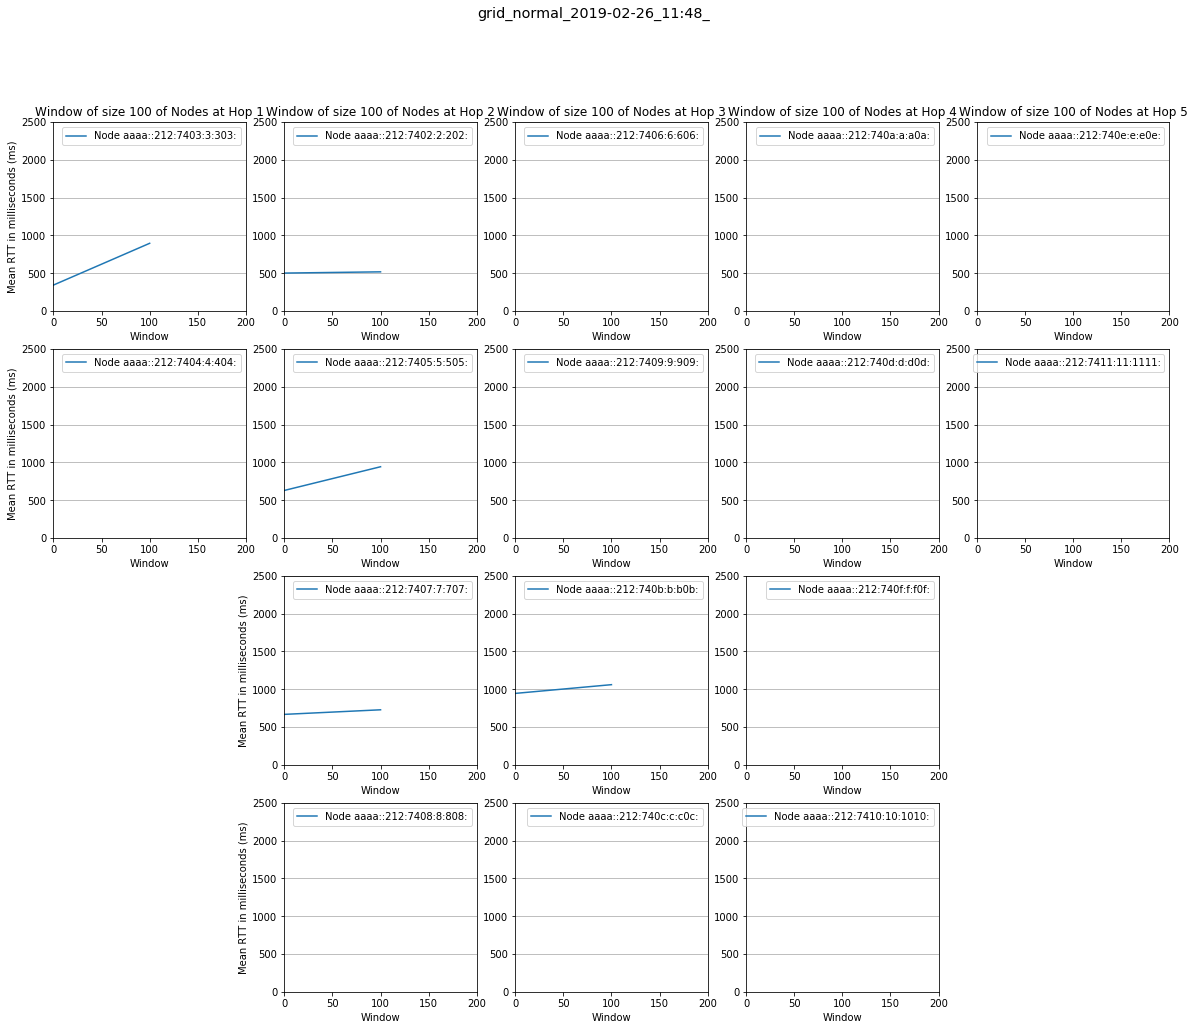

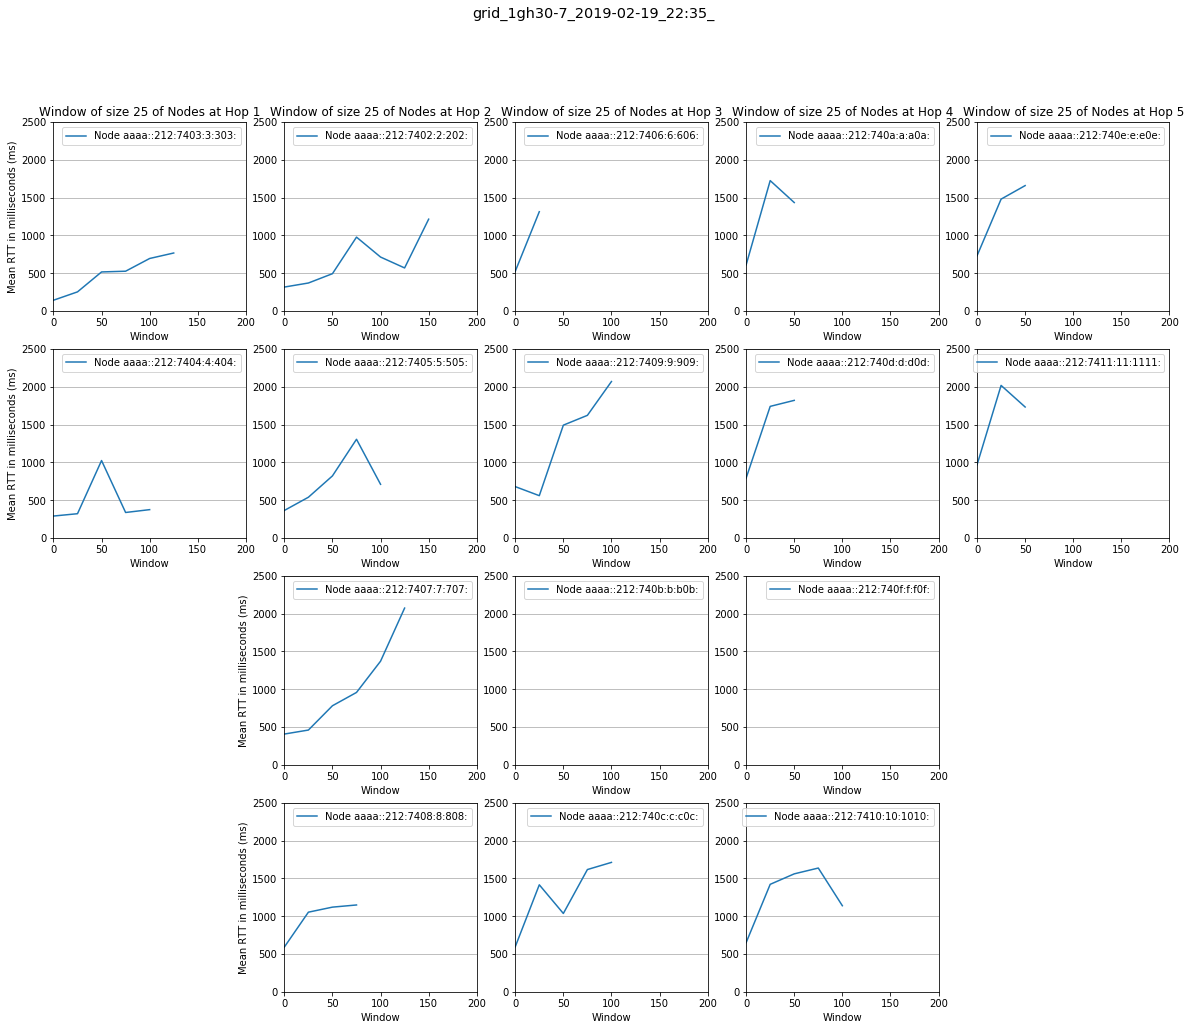

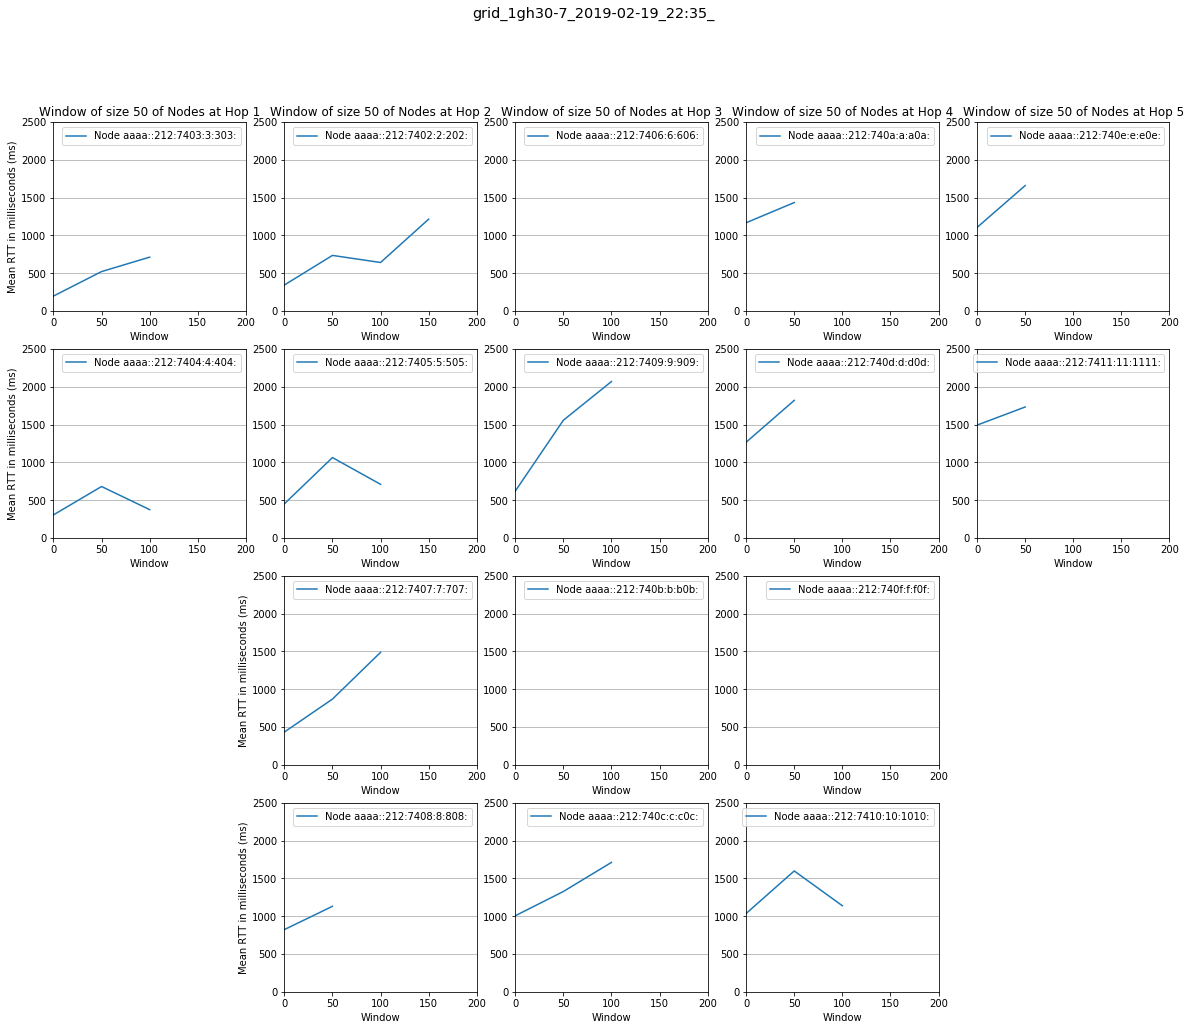

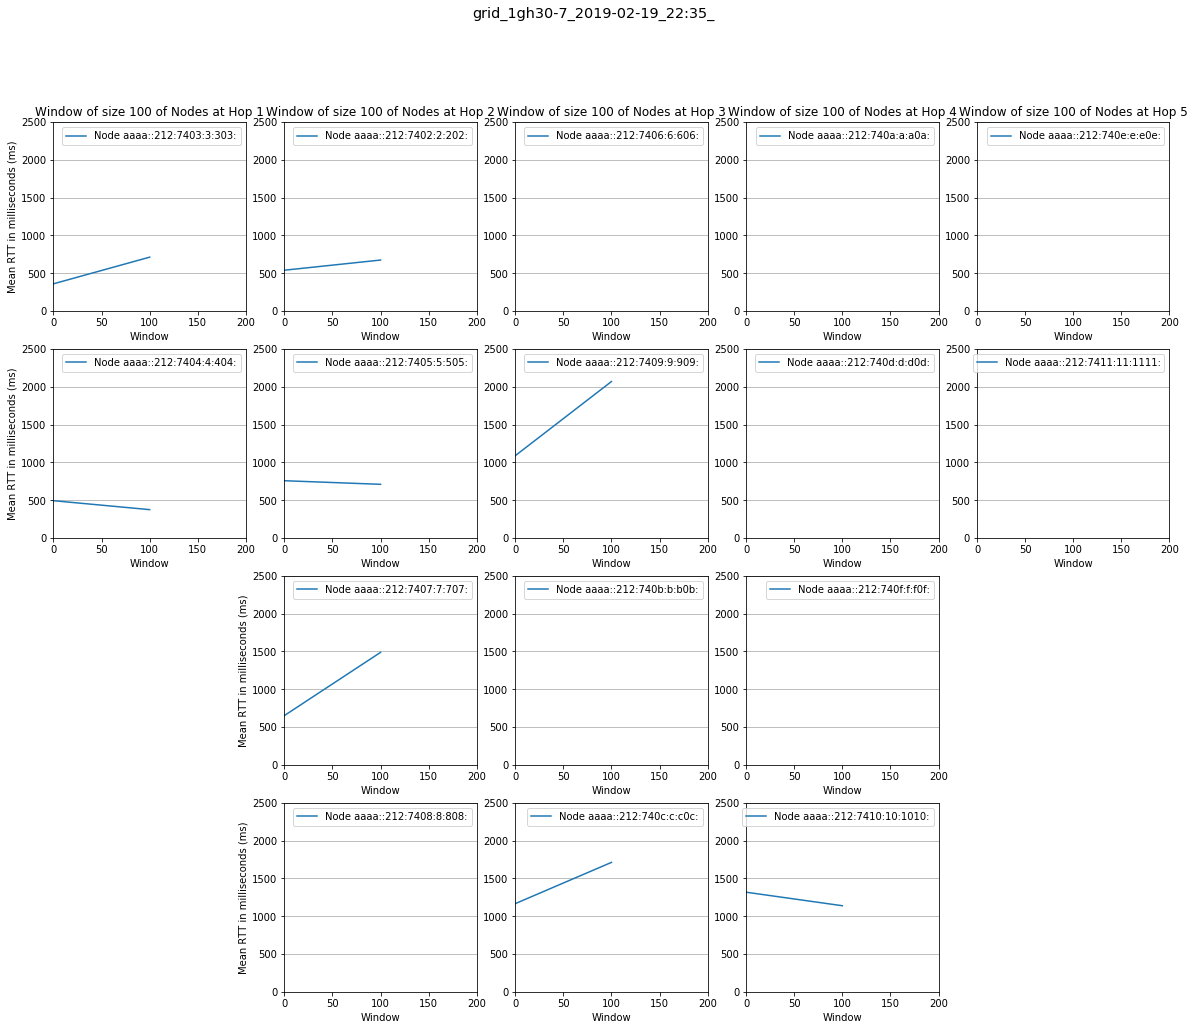

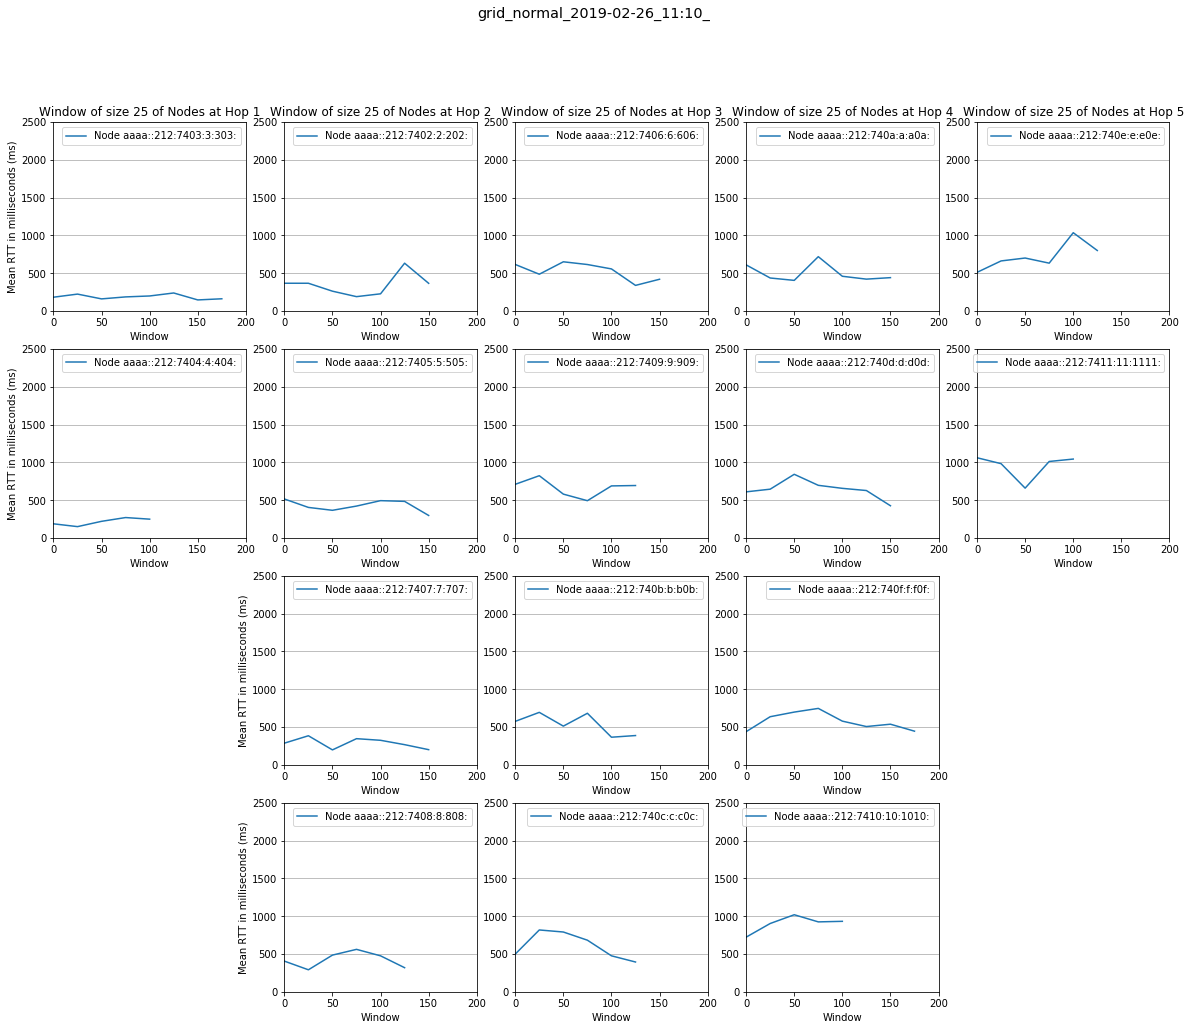

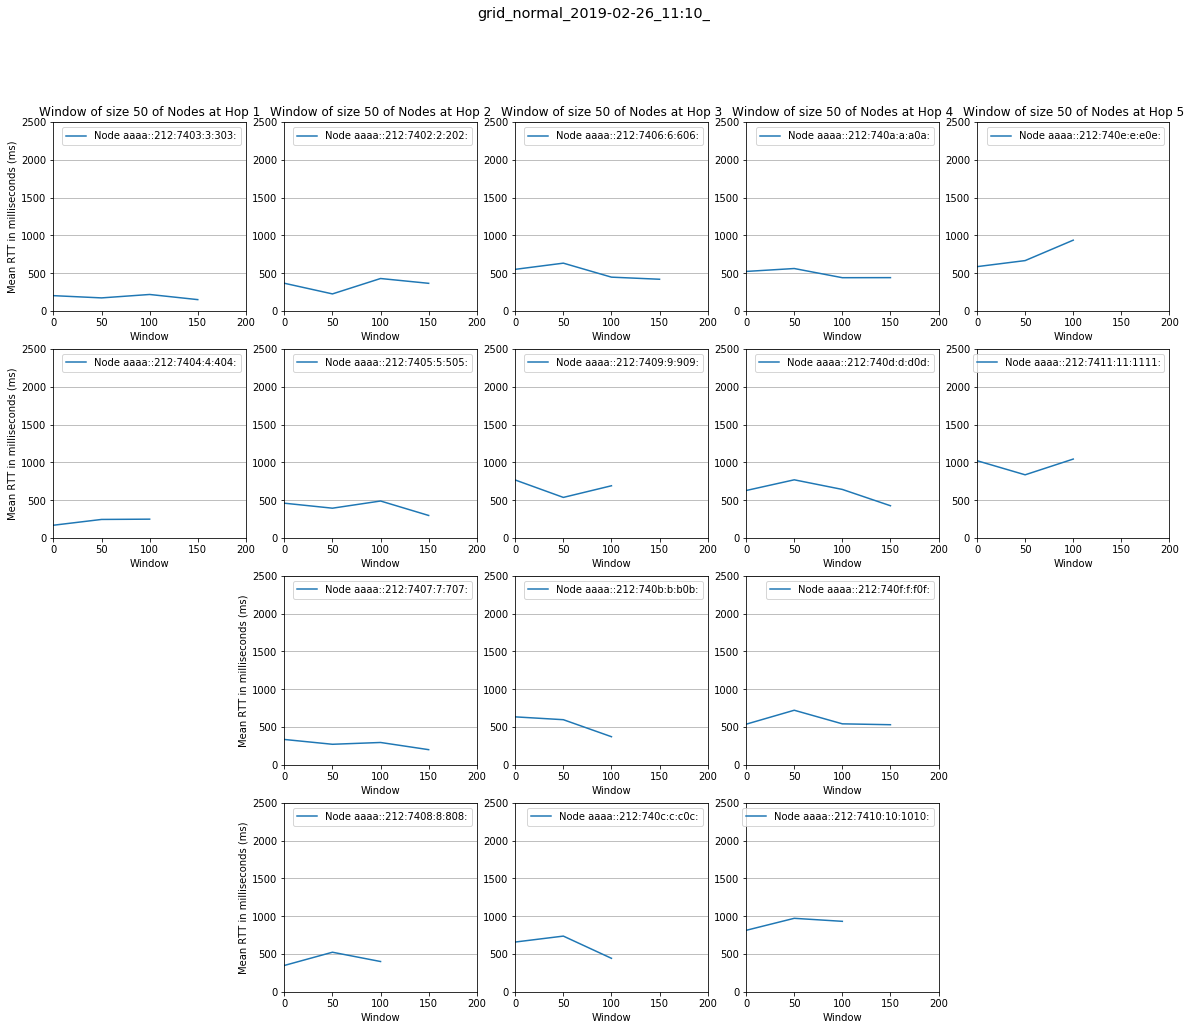

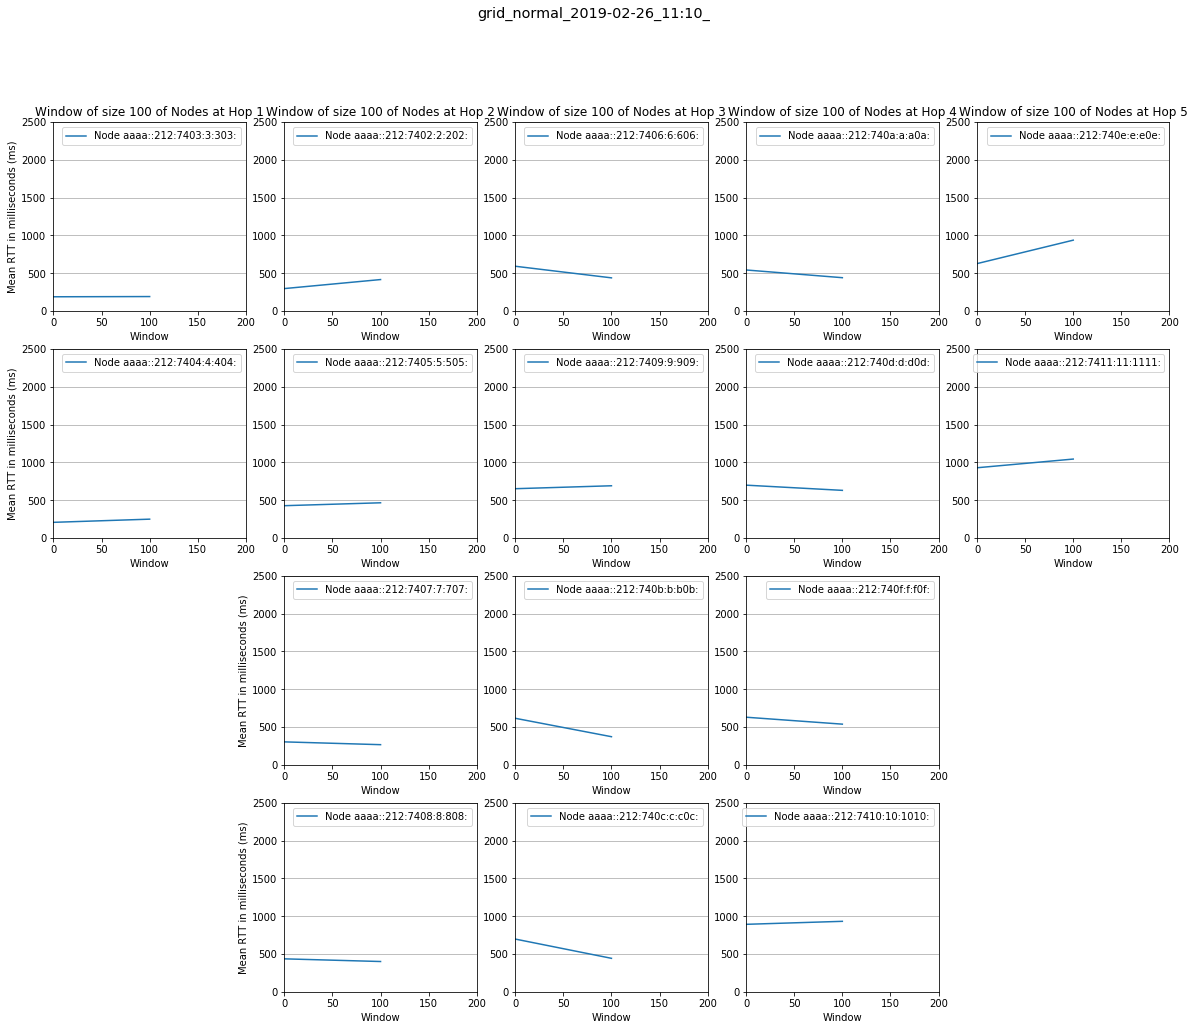

In [5]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, packets_node, 200, 2500, row[1], 25)
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, packets_node, 200, 2500, row[1], 50)
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, packets_node, 200, 2500, row[1], 100)


Outliers => points our of mean-2std <= x(t) <= mean + 2std

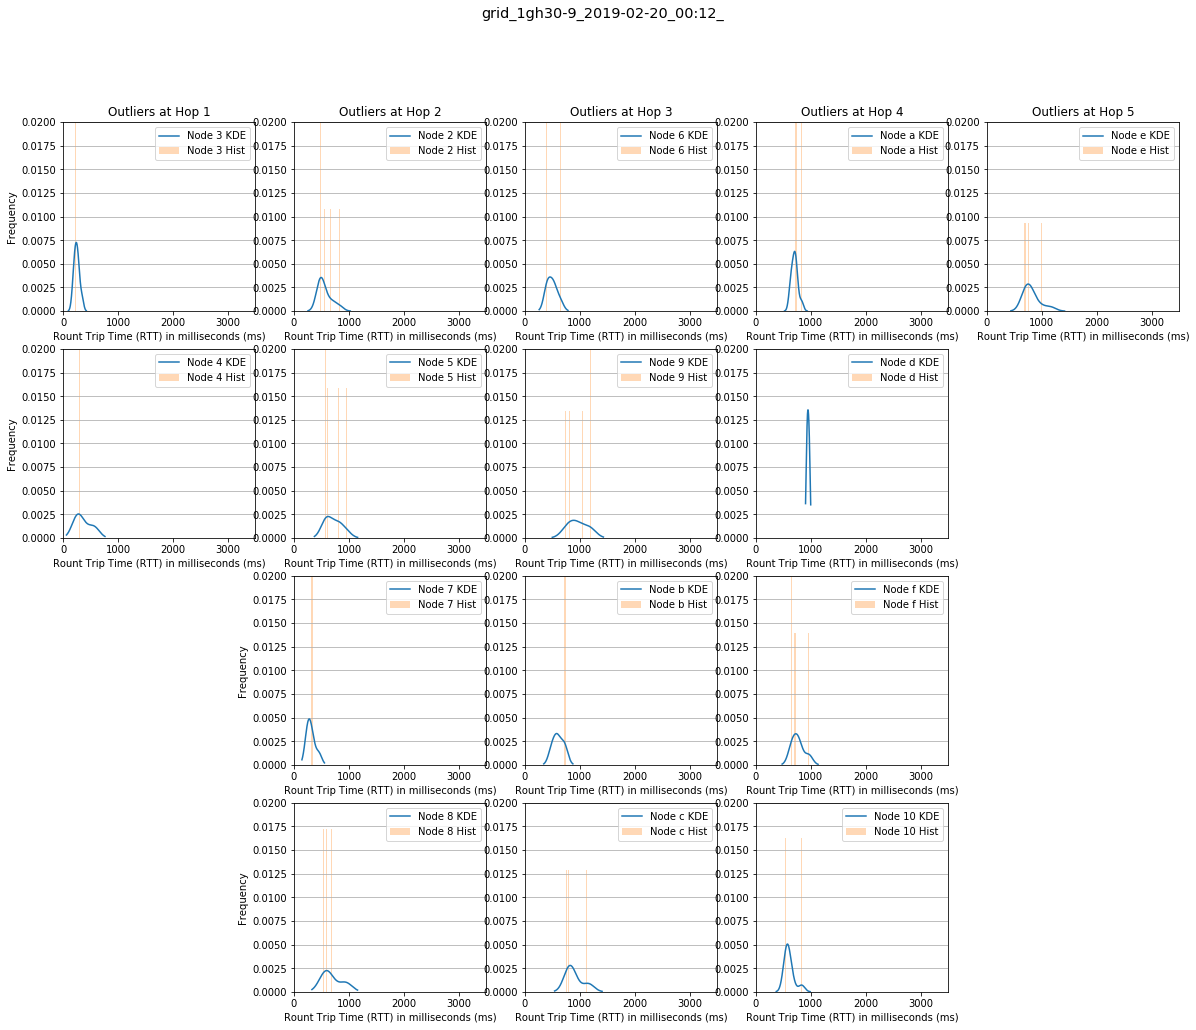

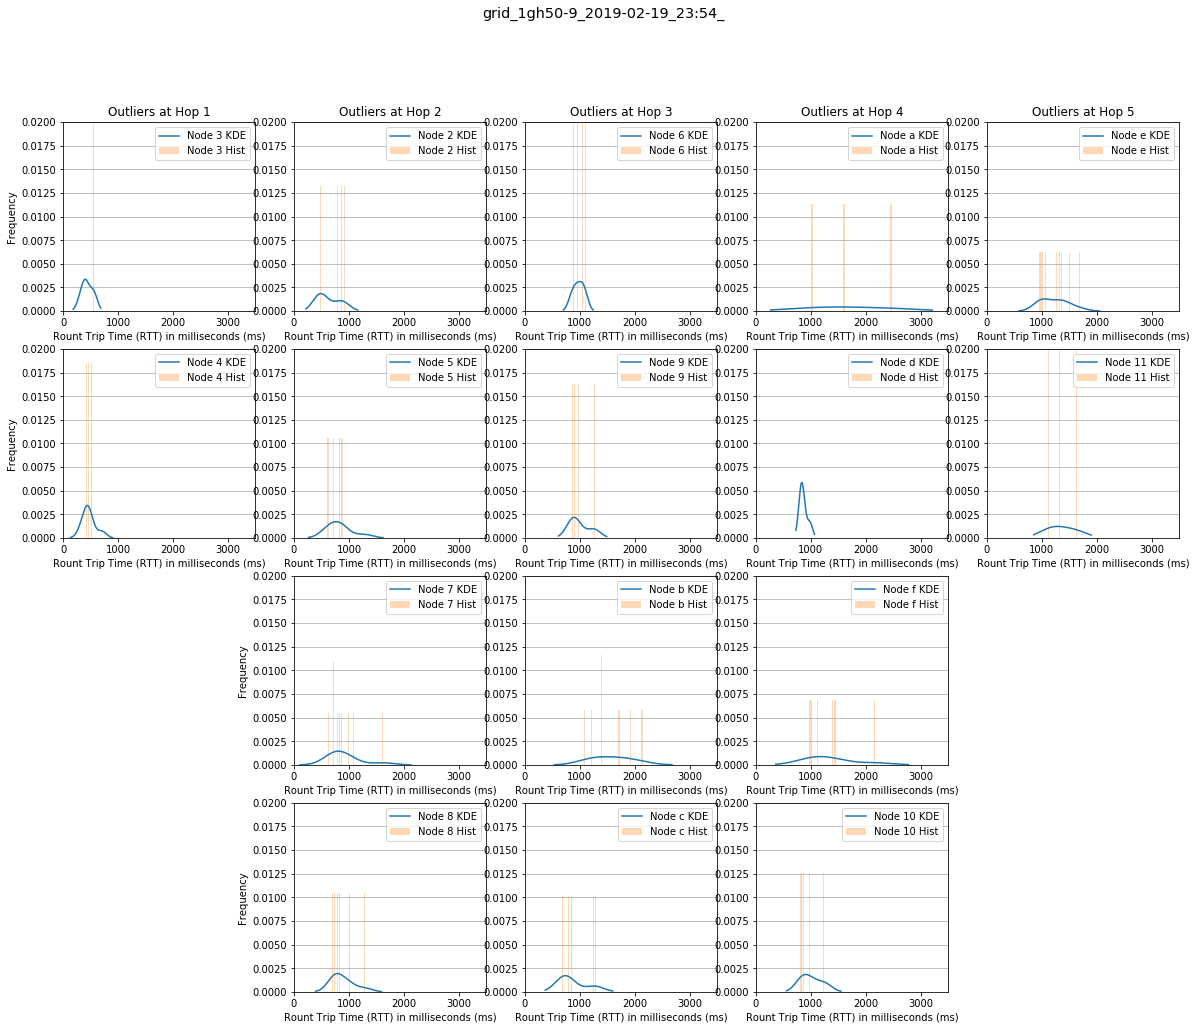

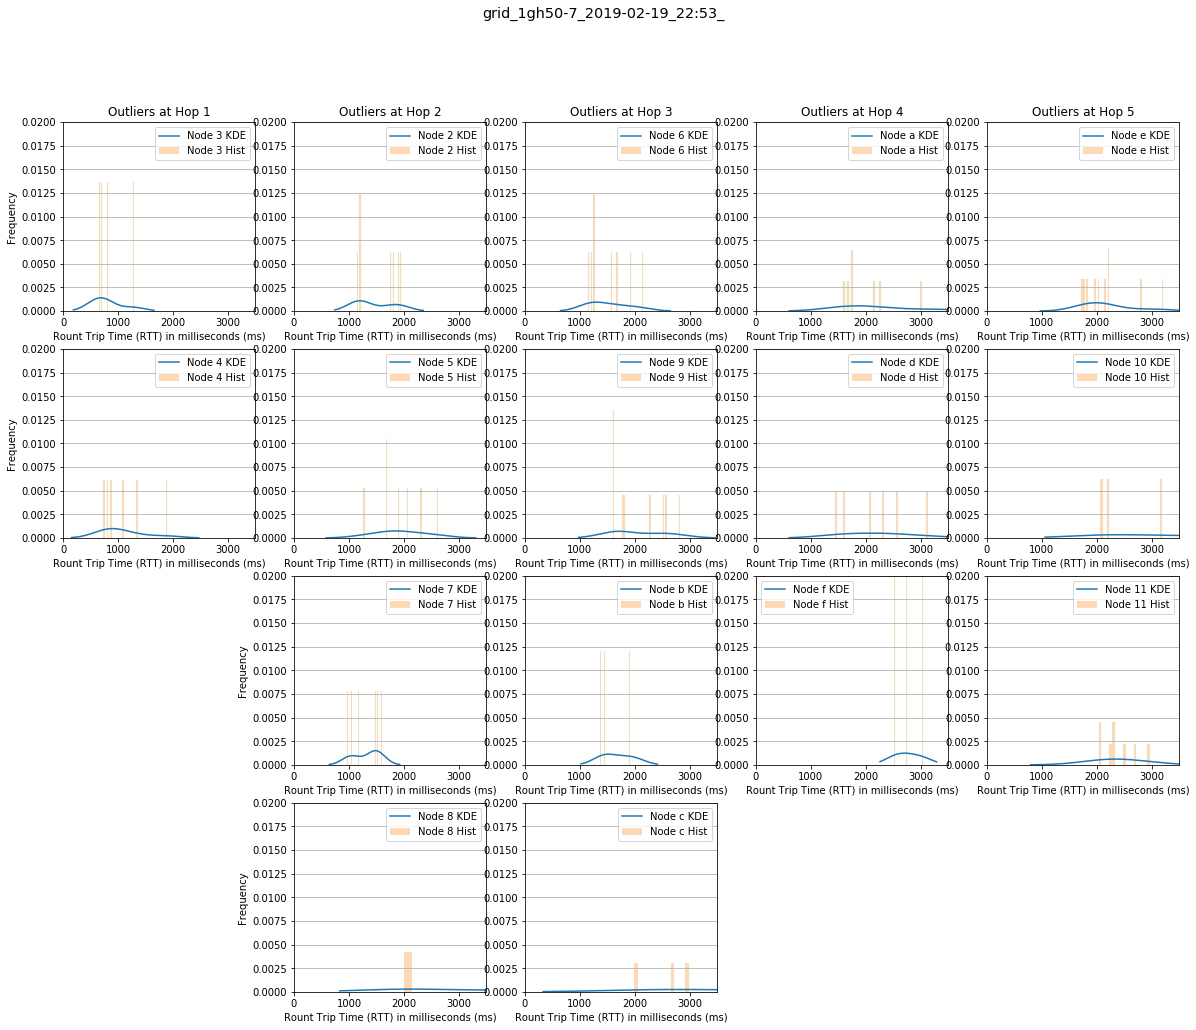

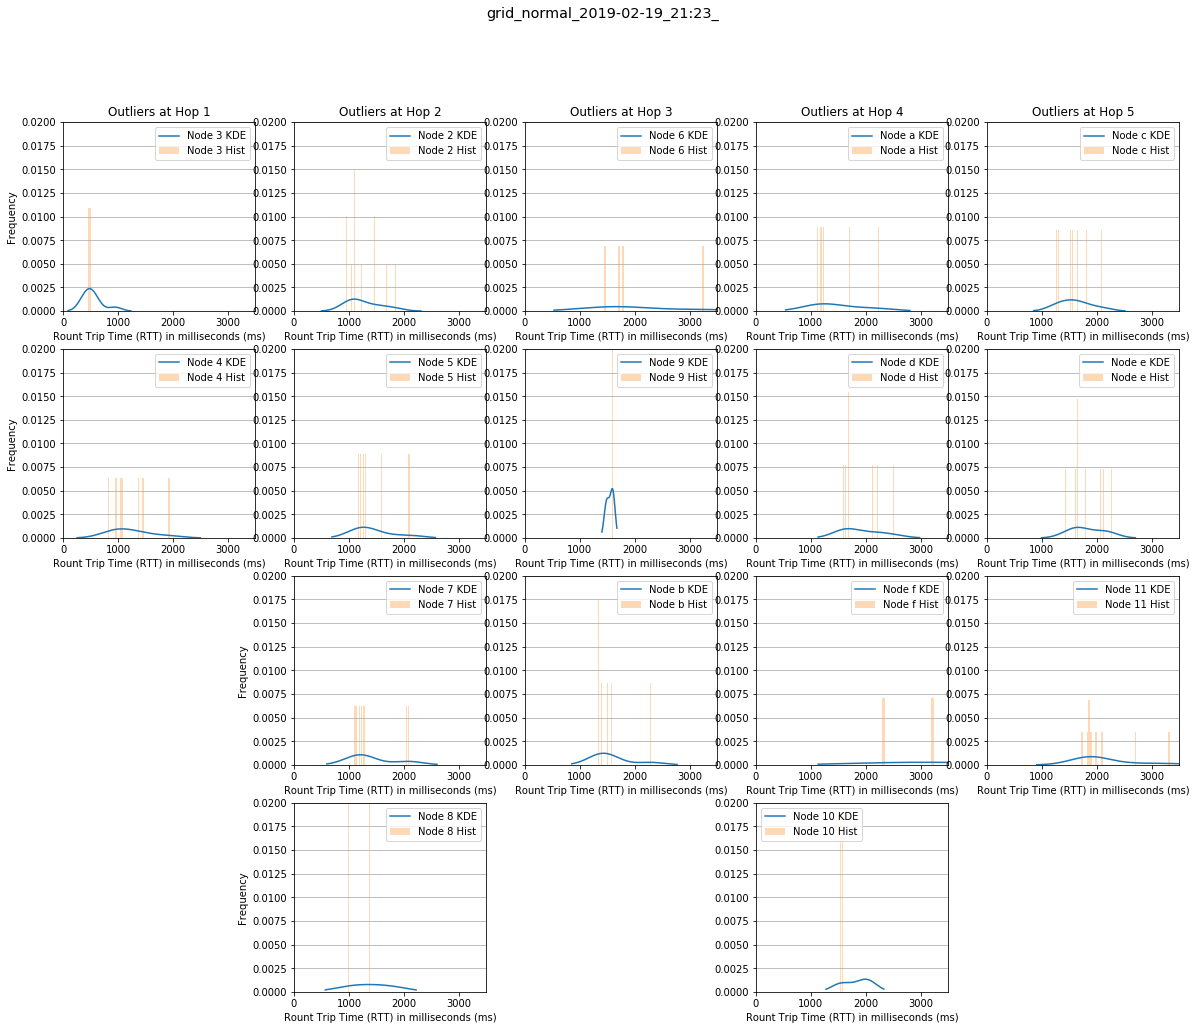

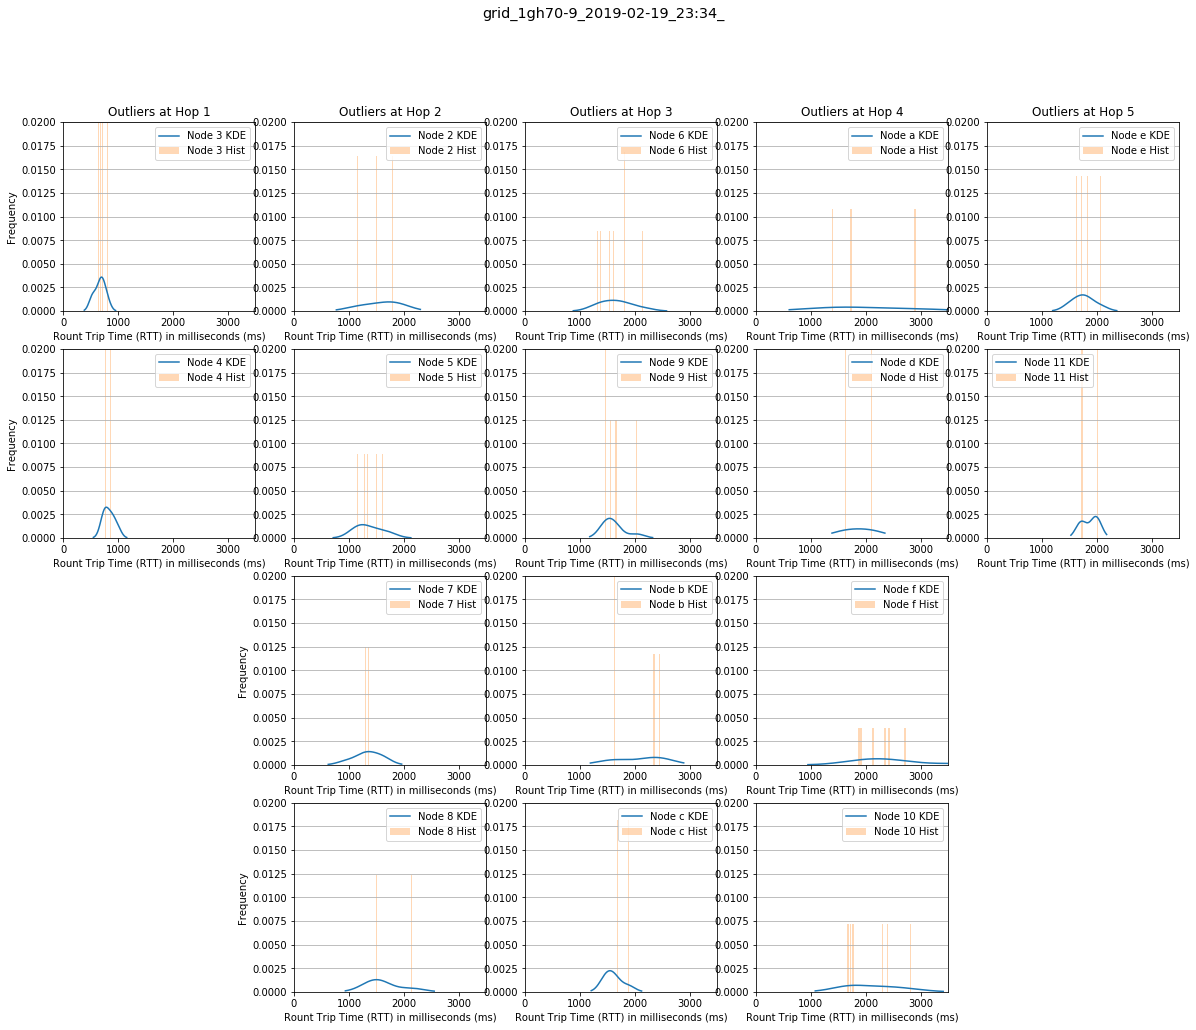

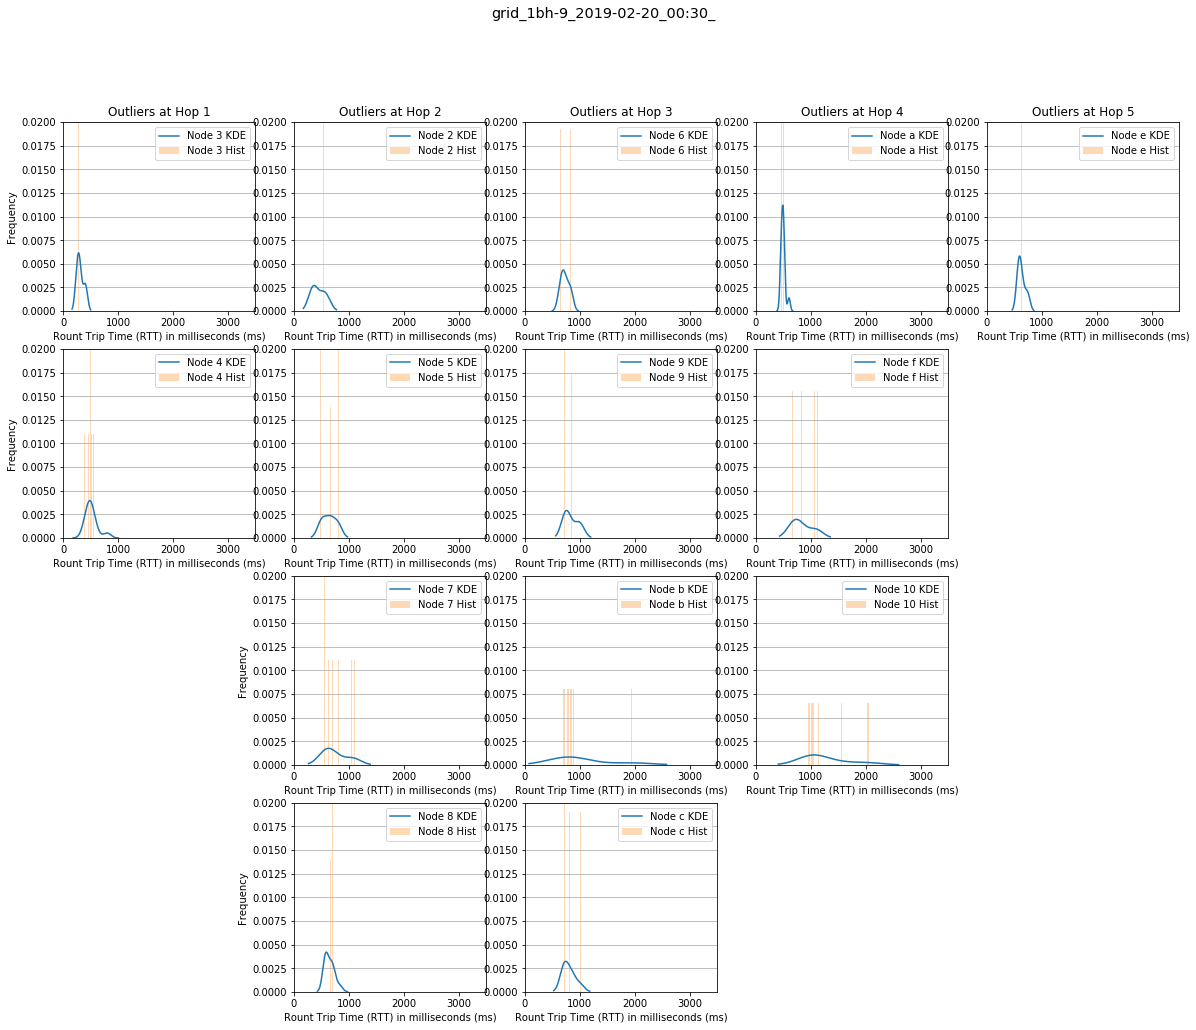

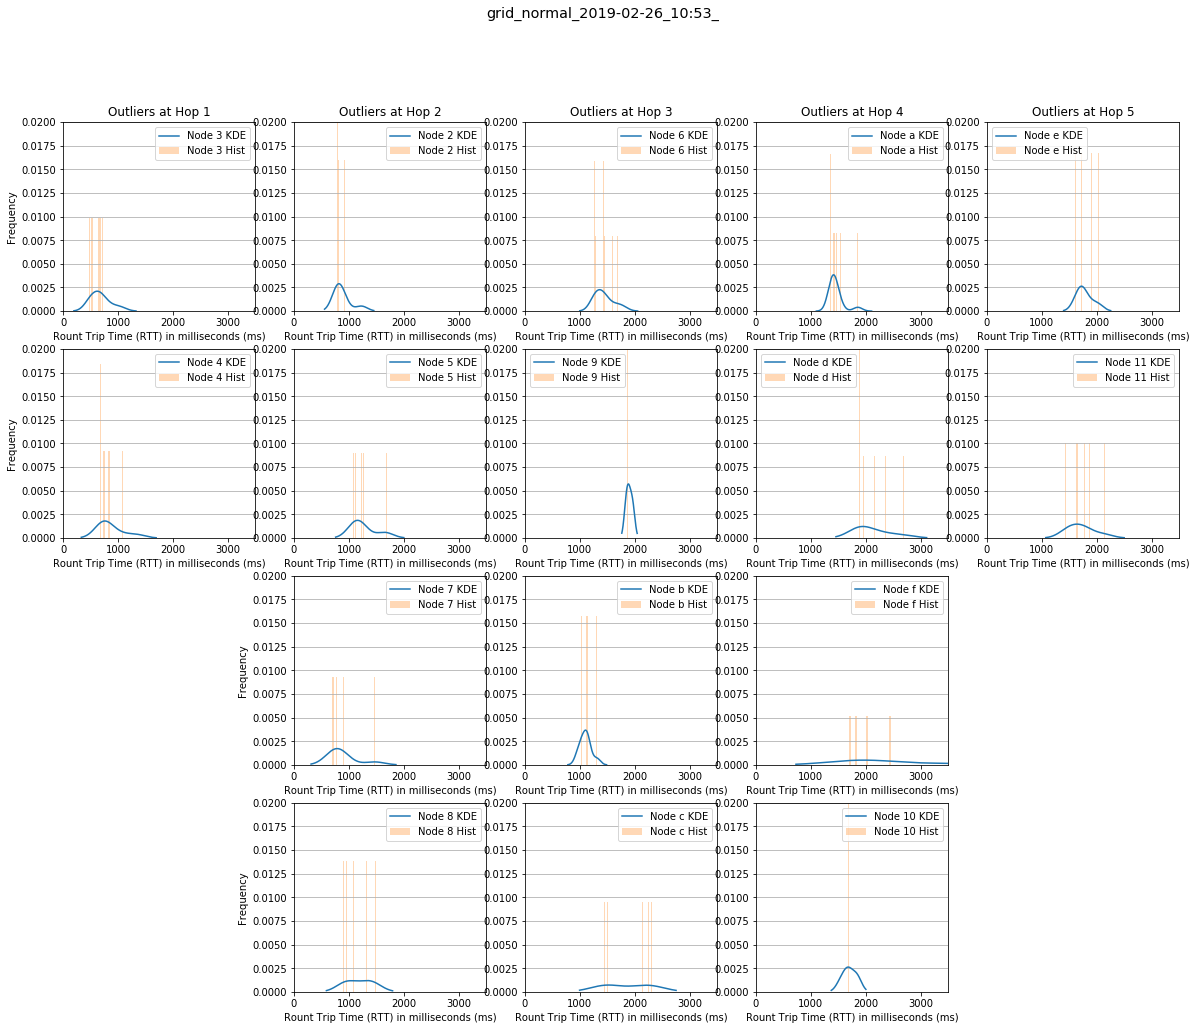

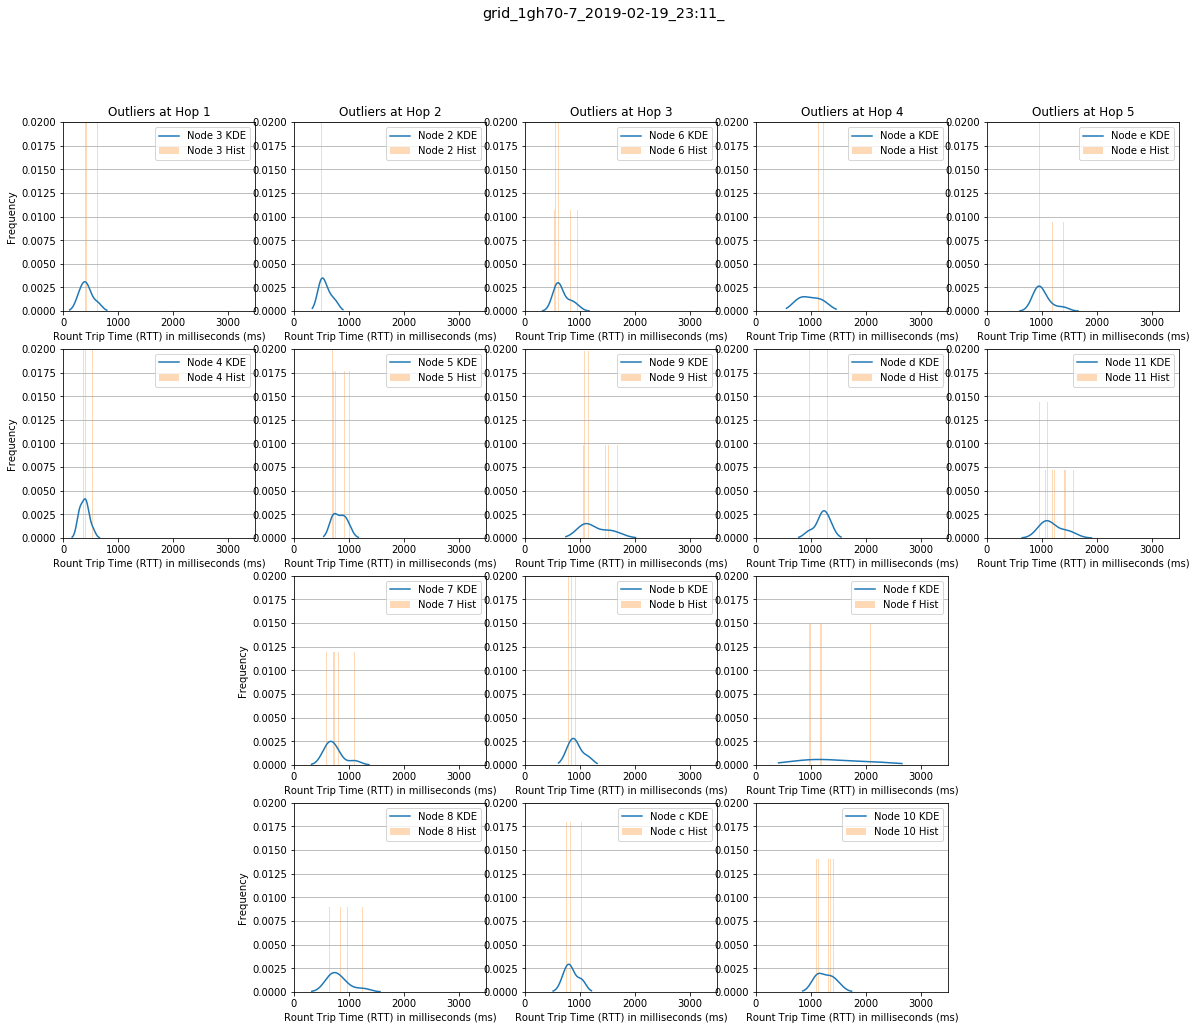

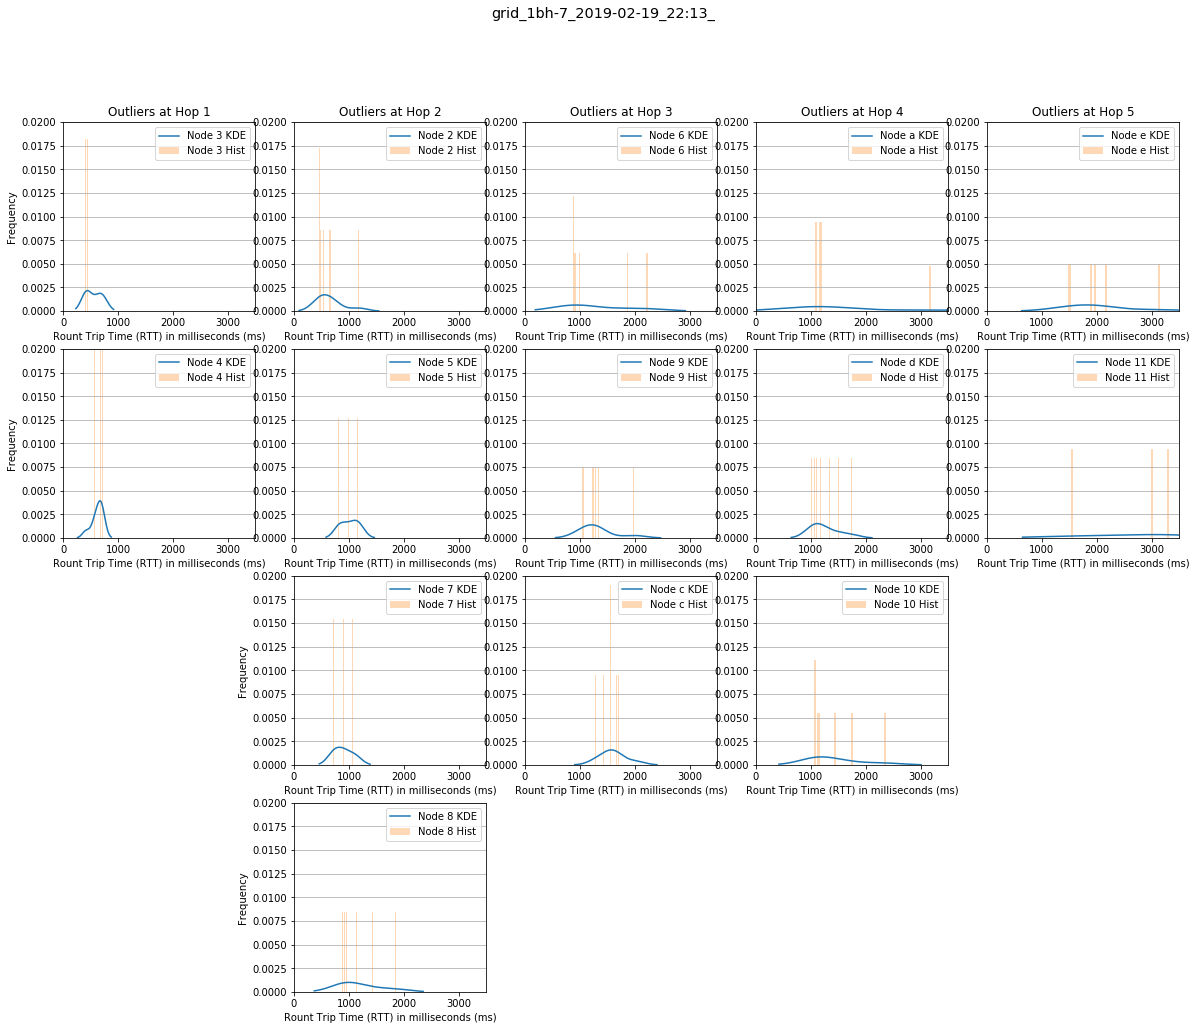

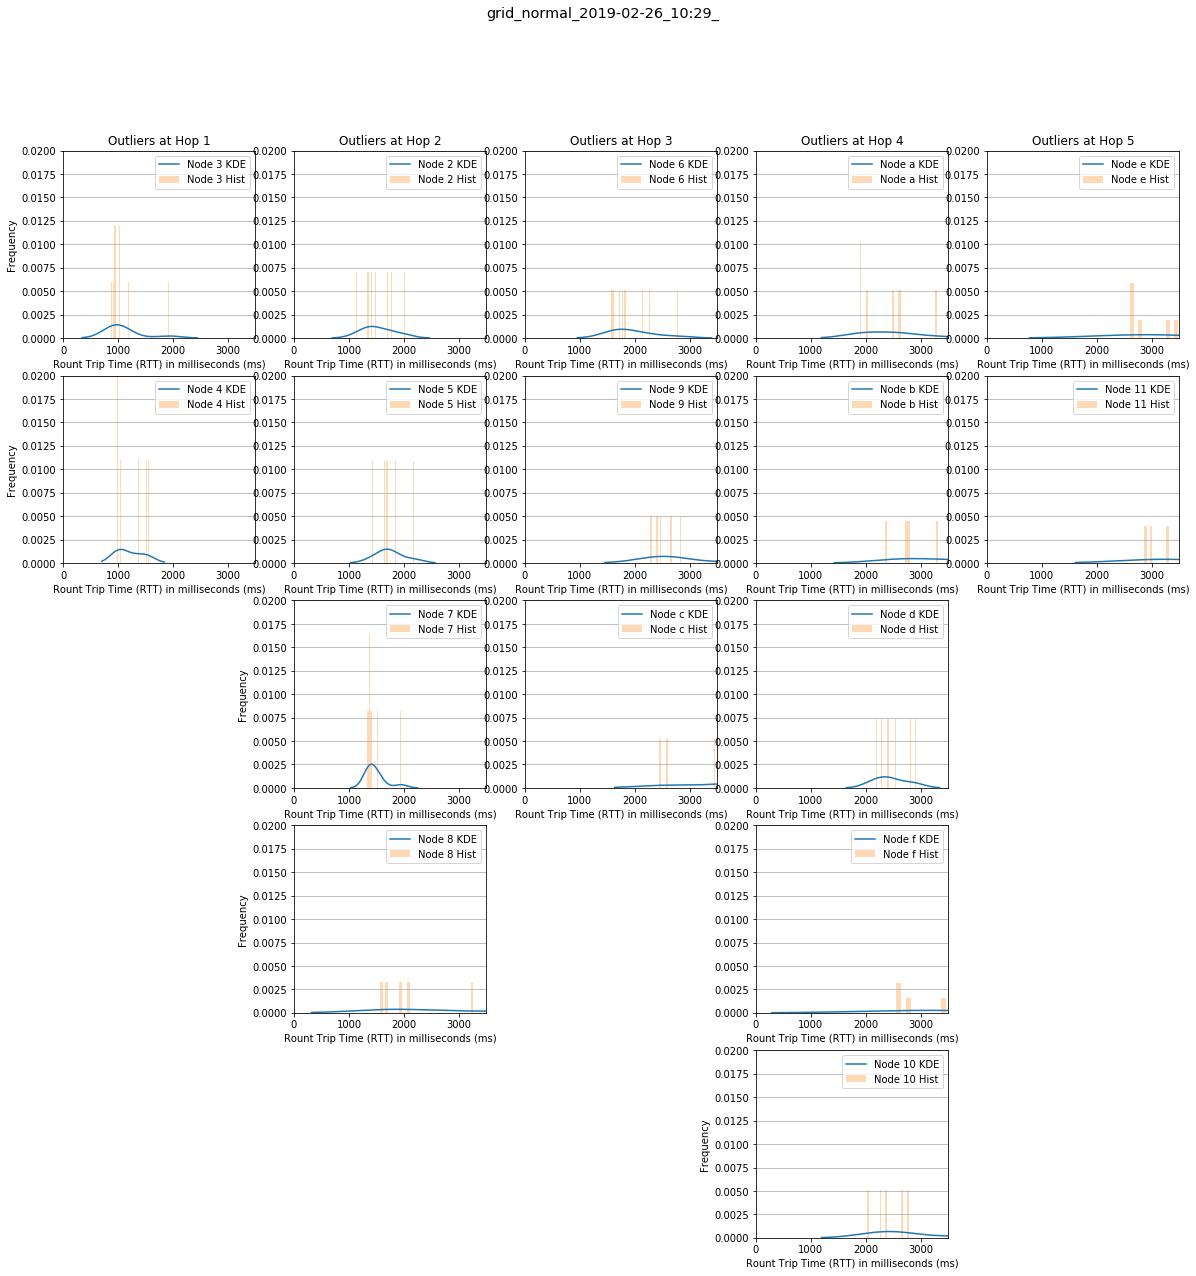

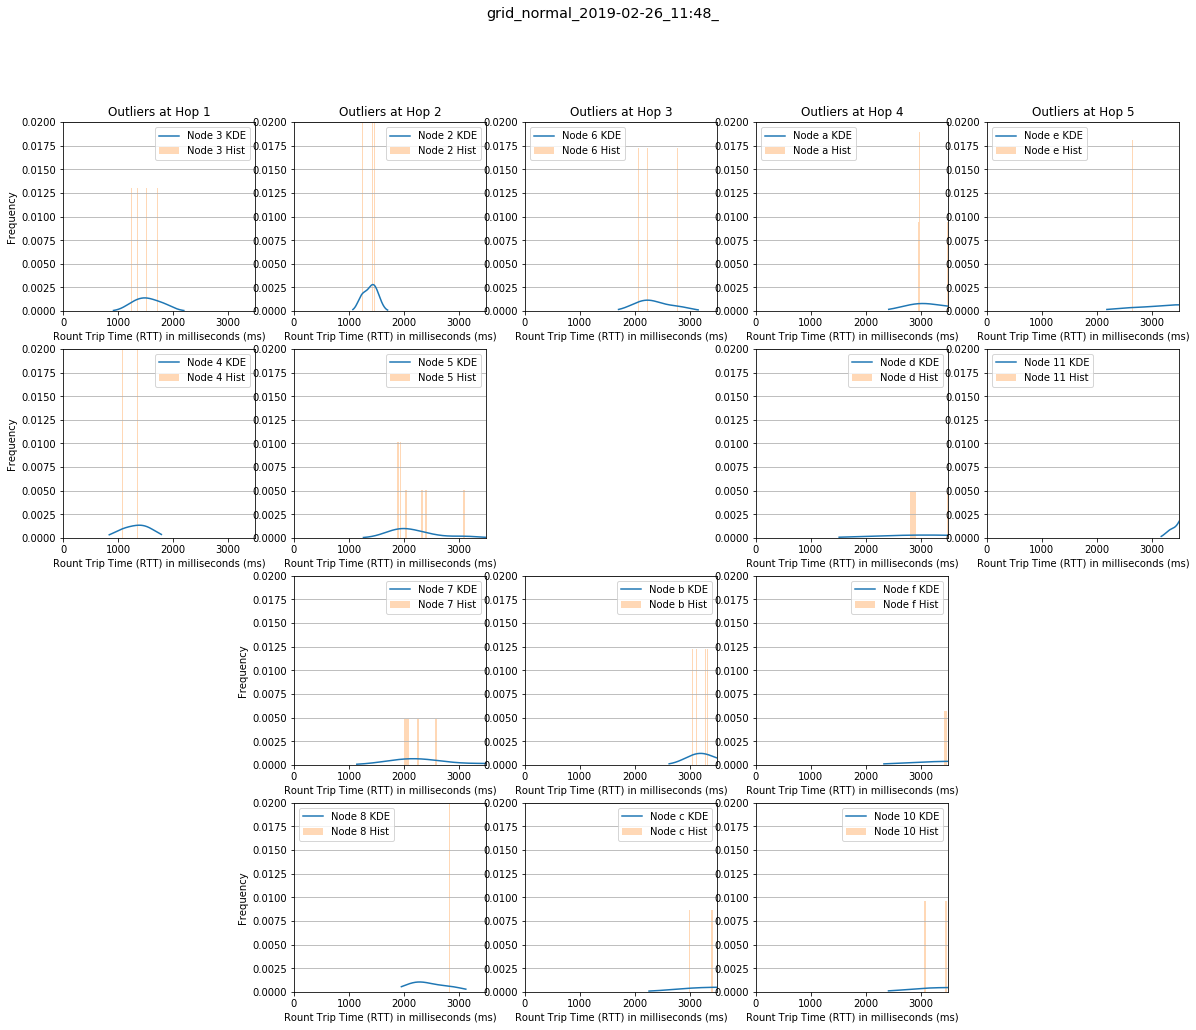

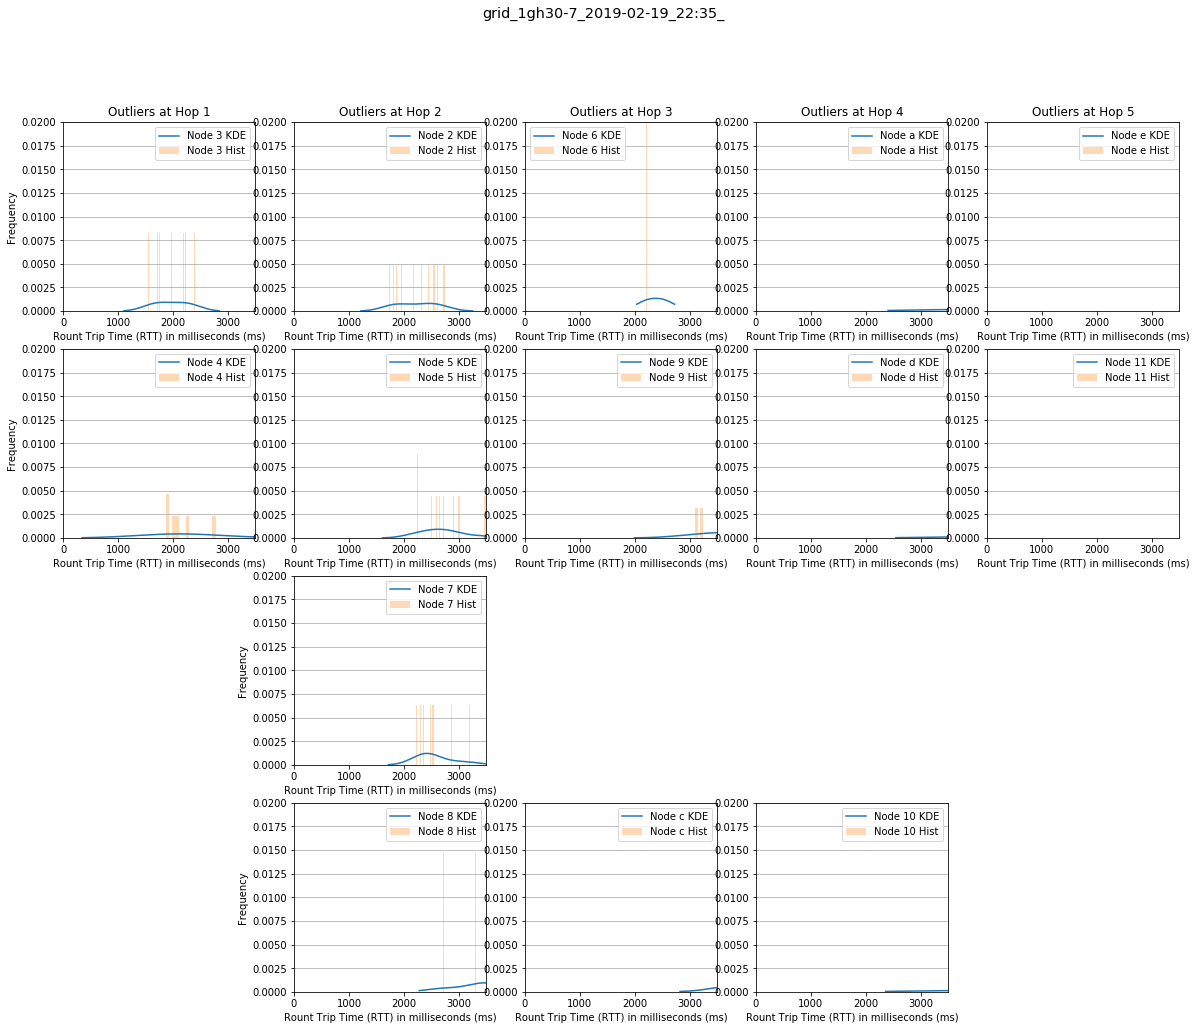

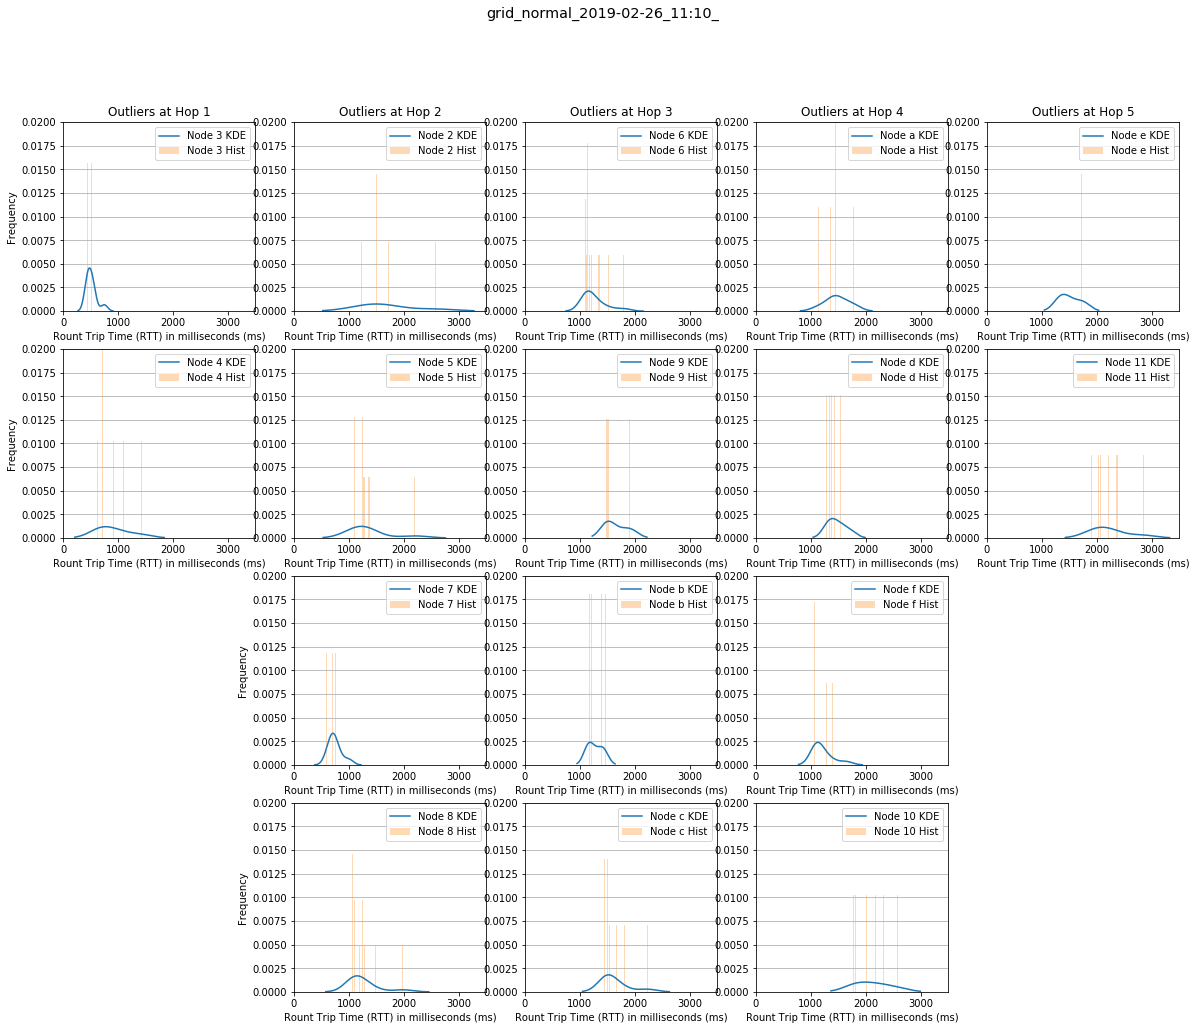

In [6]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_outliers_hops_nodes(nodes, outliers, 3500, 0.02, row[1])

IQR outliers

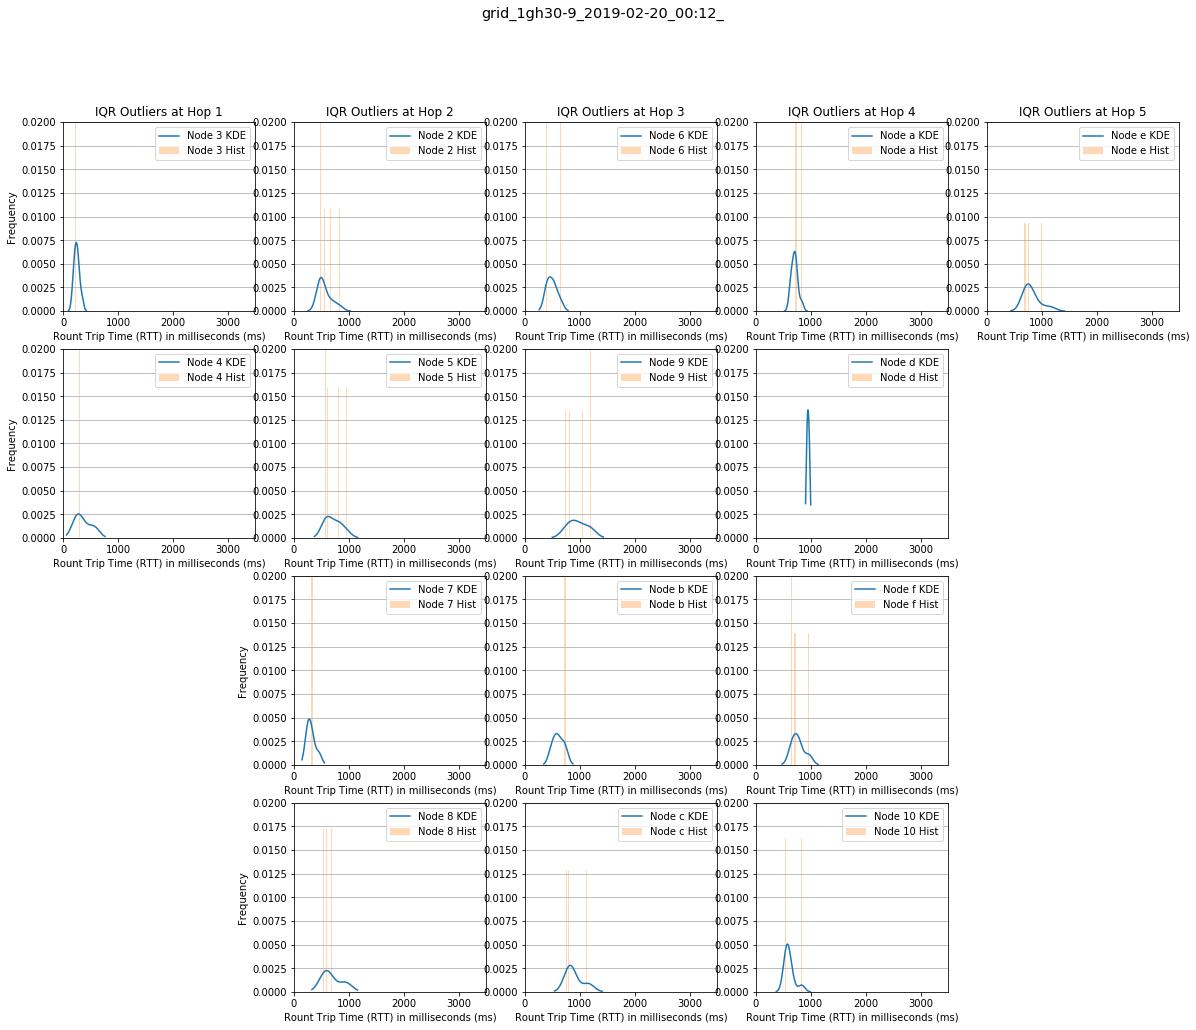

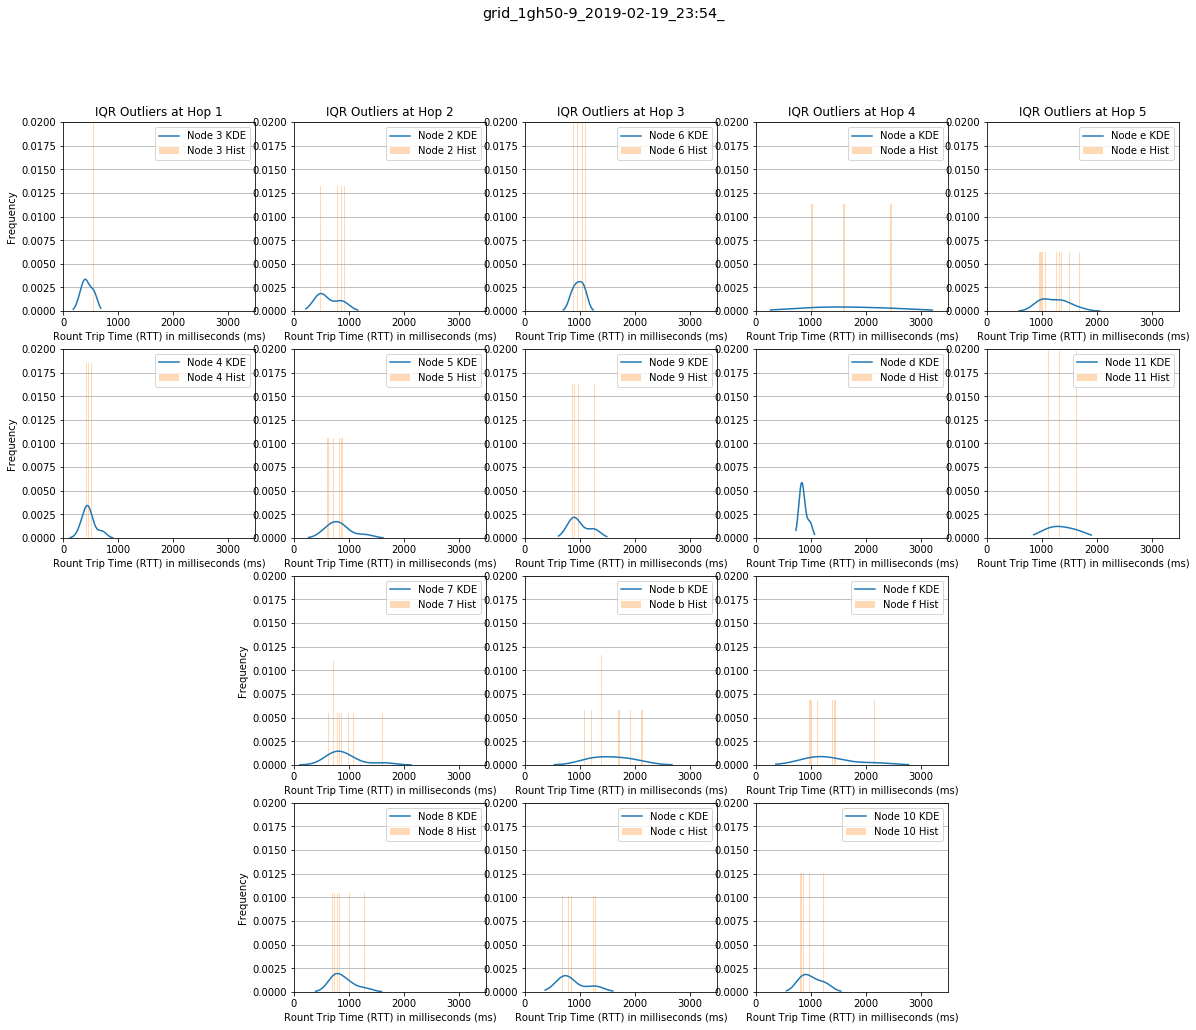

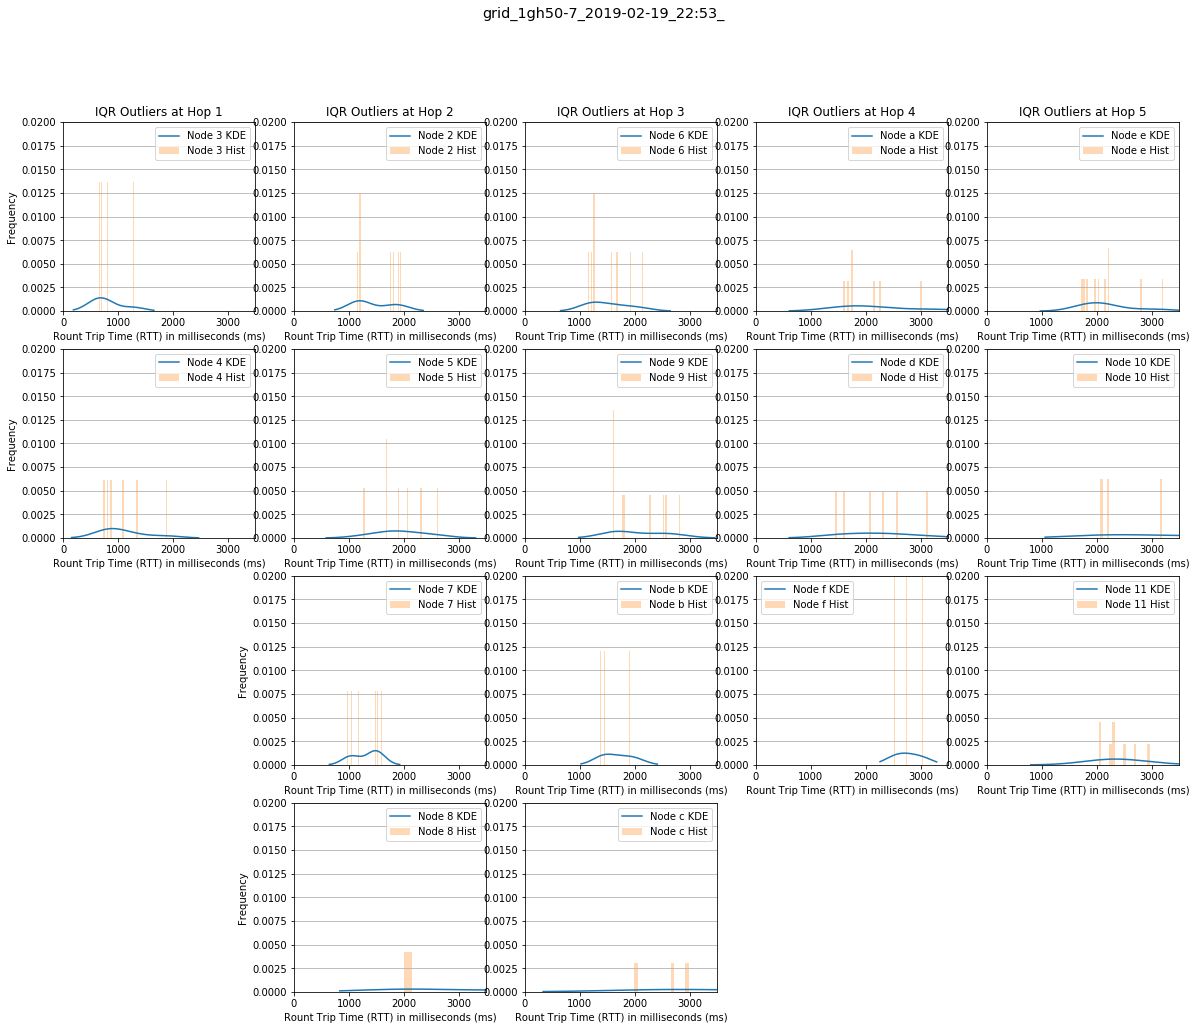

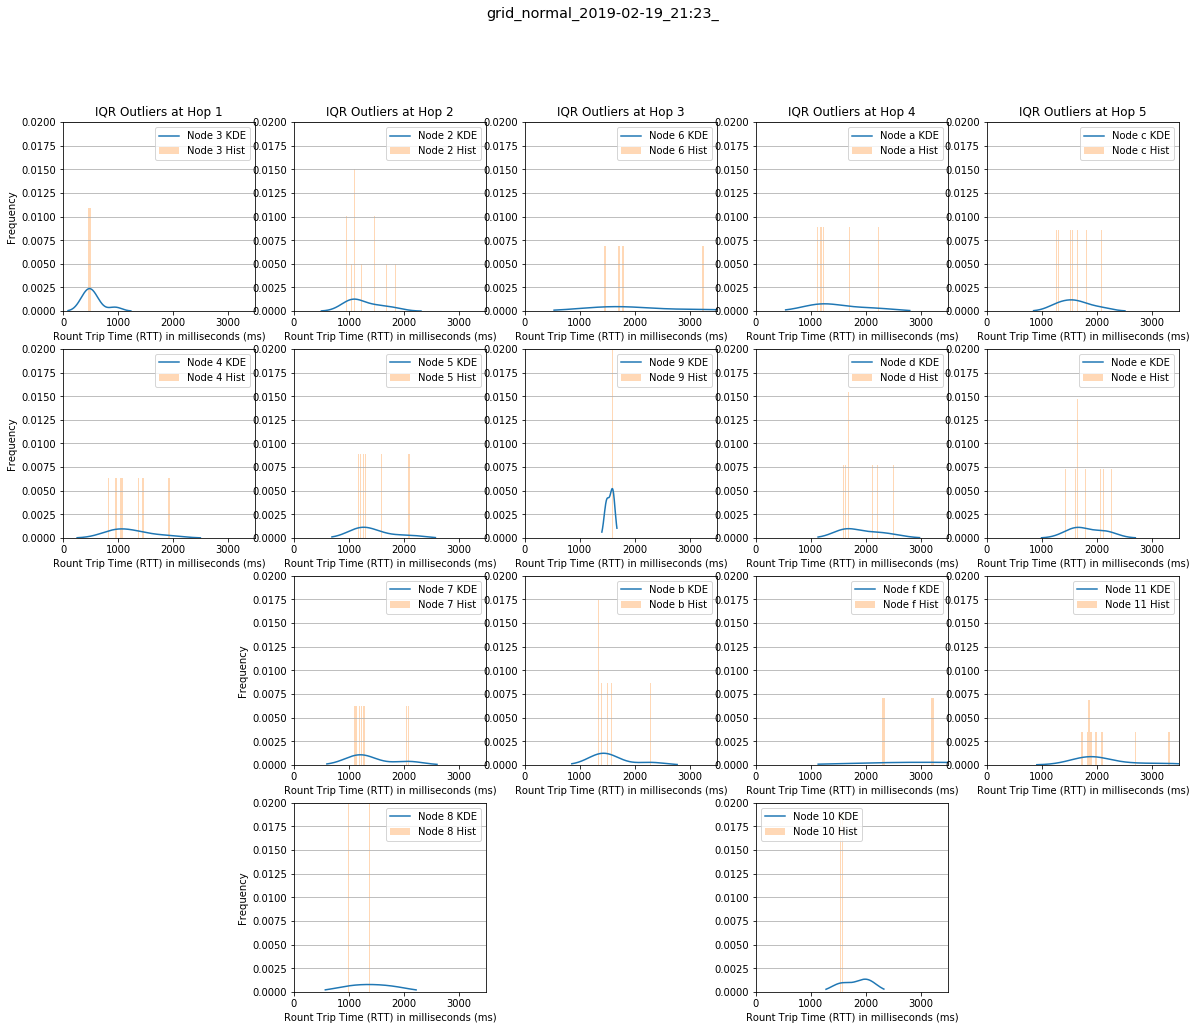

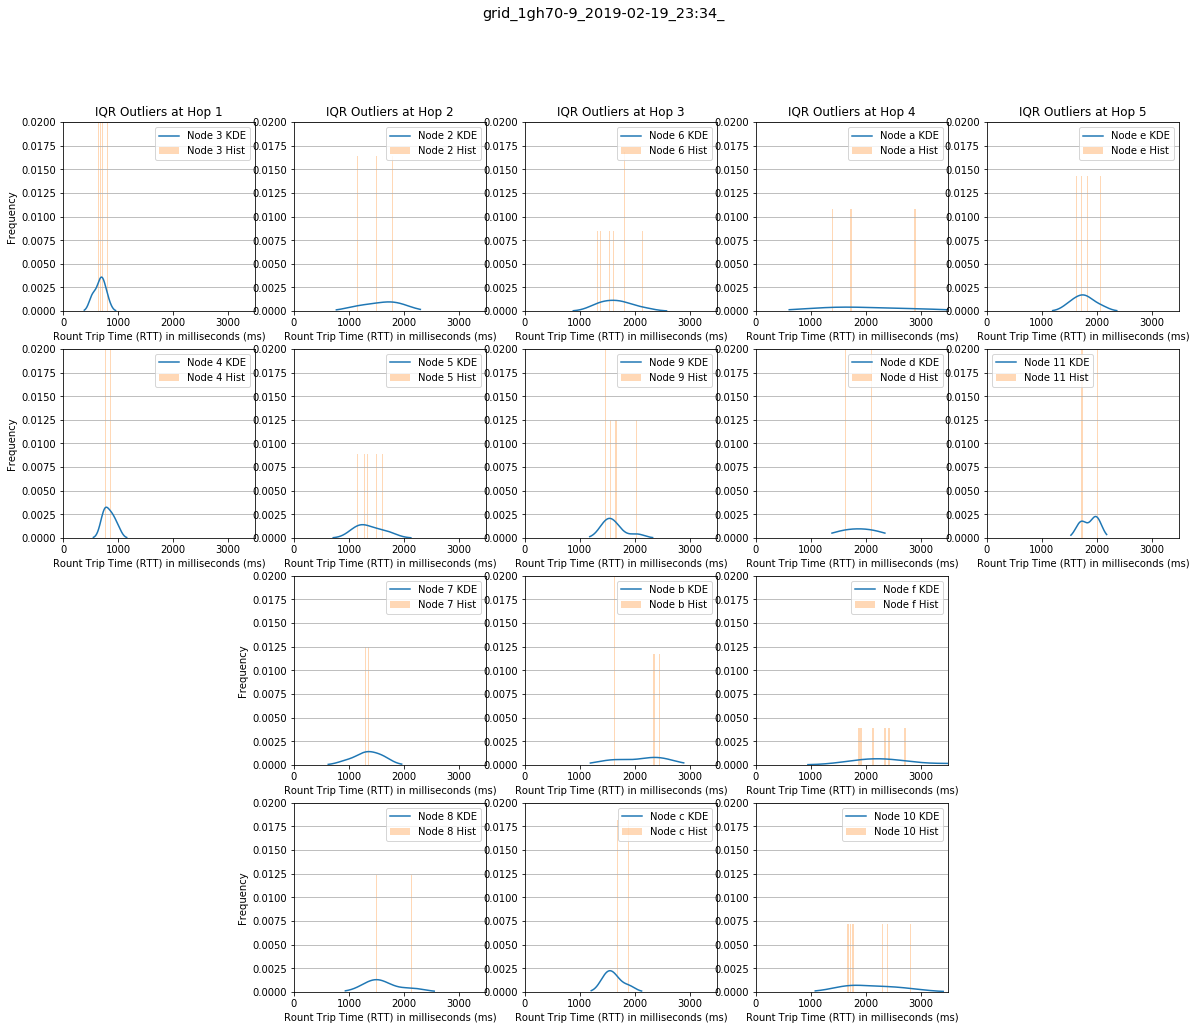

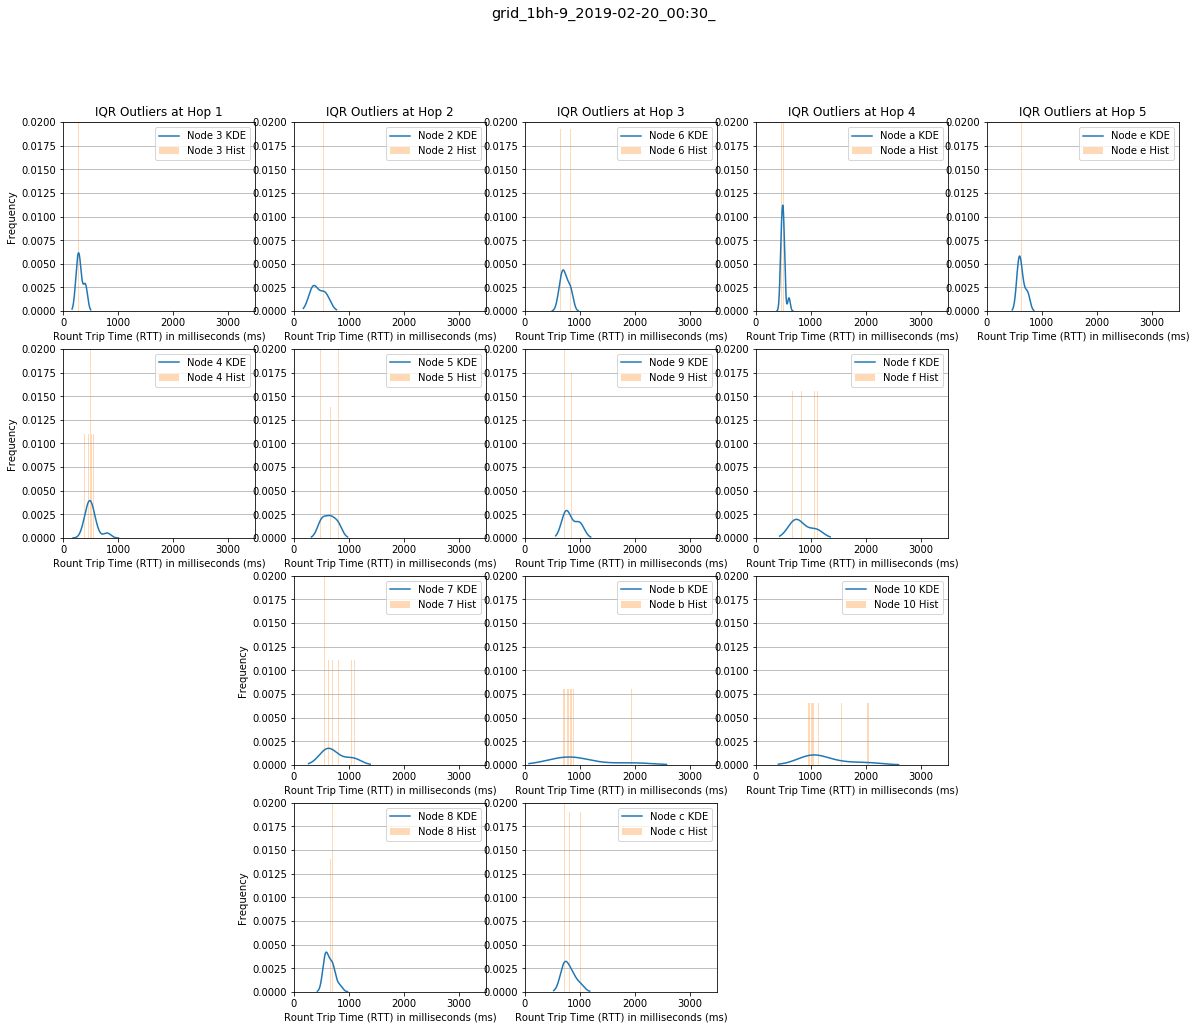

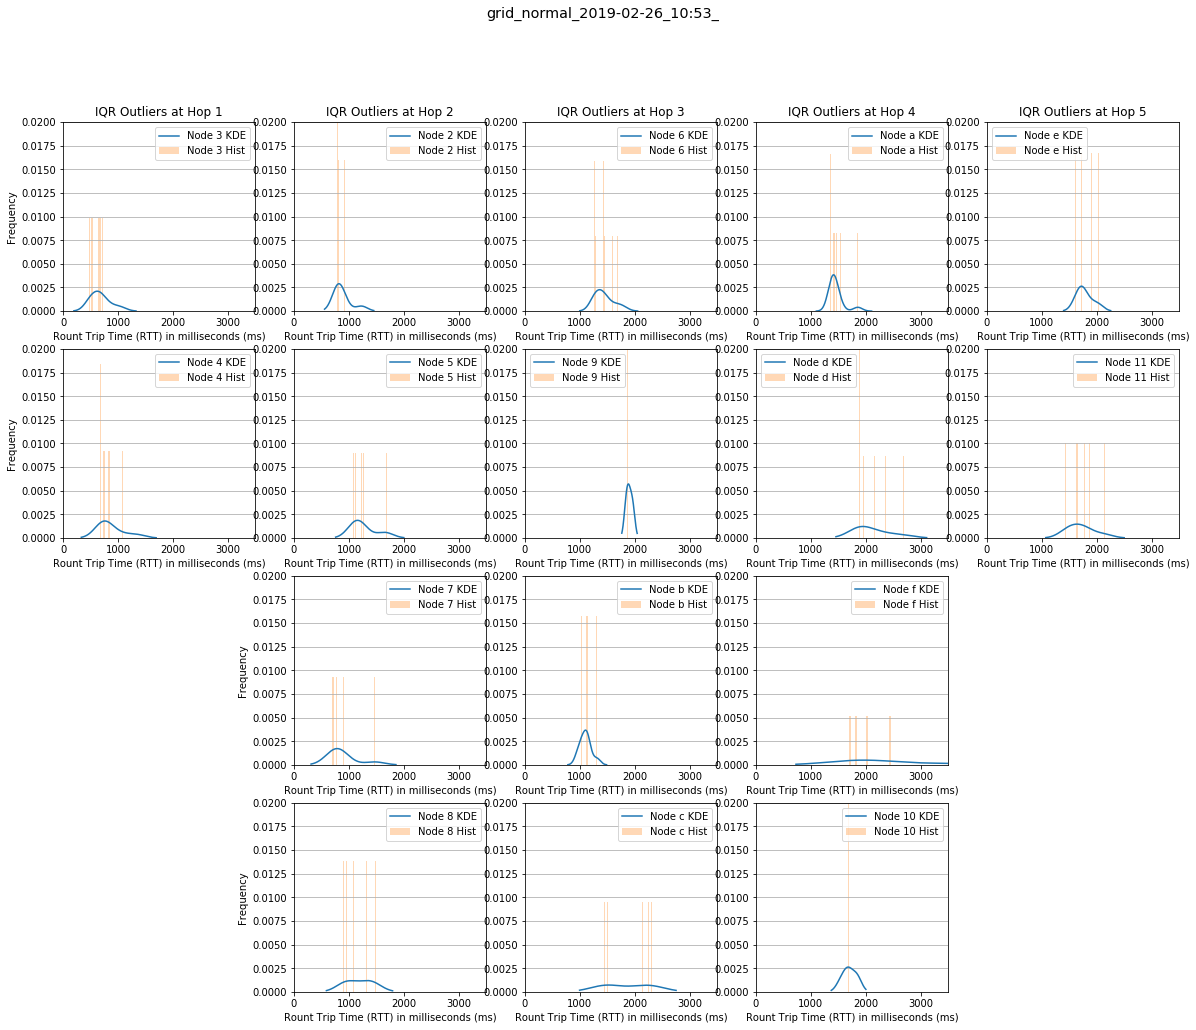

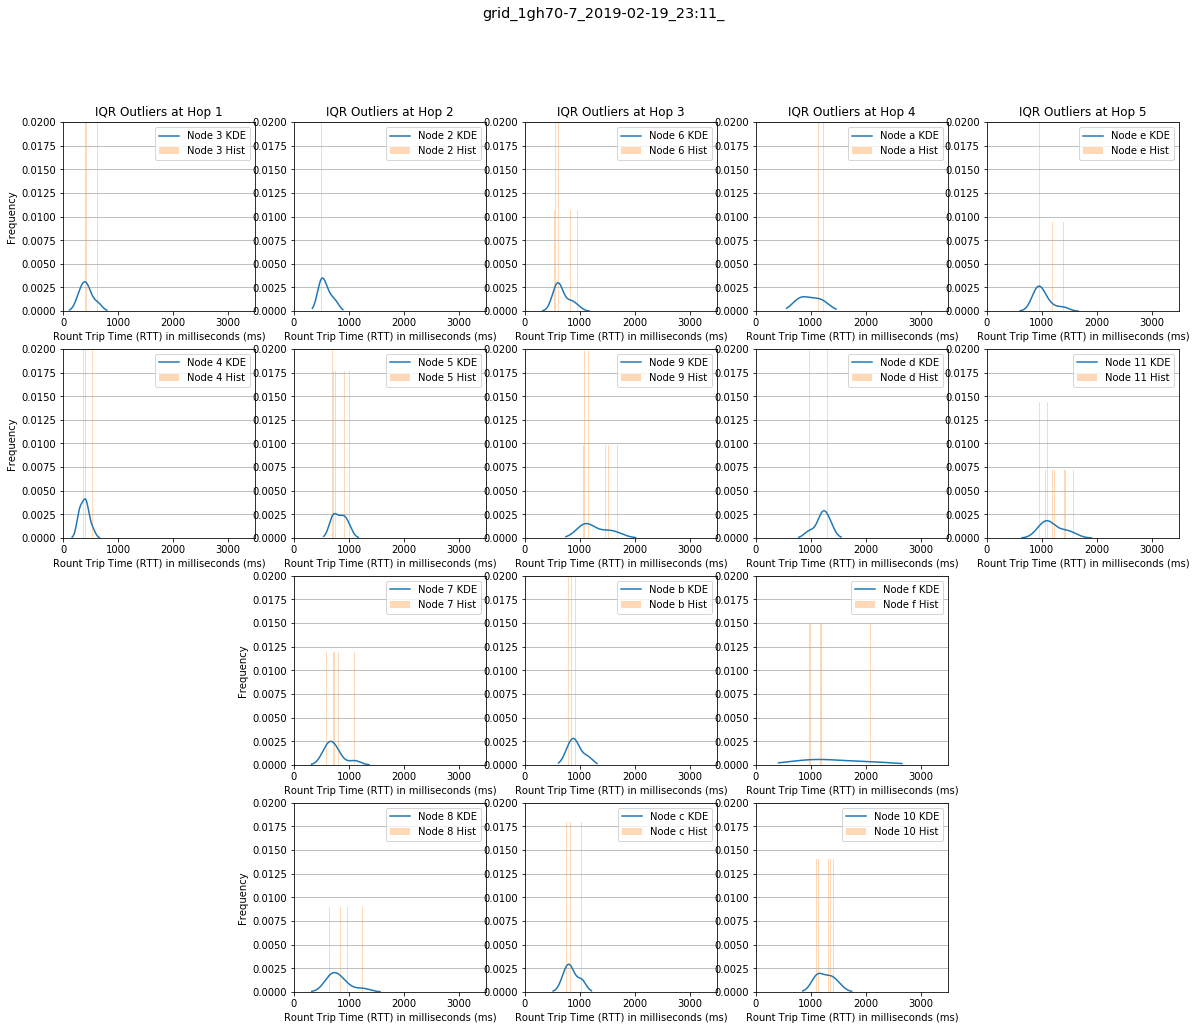

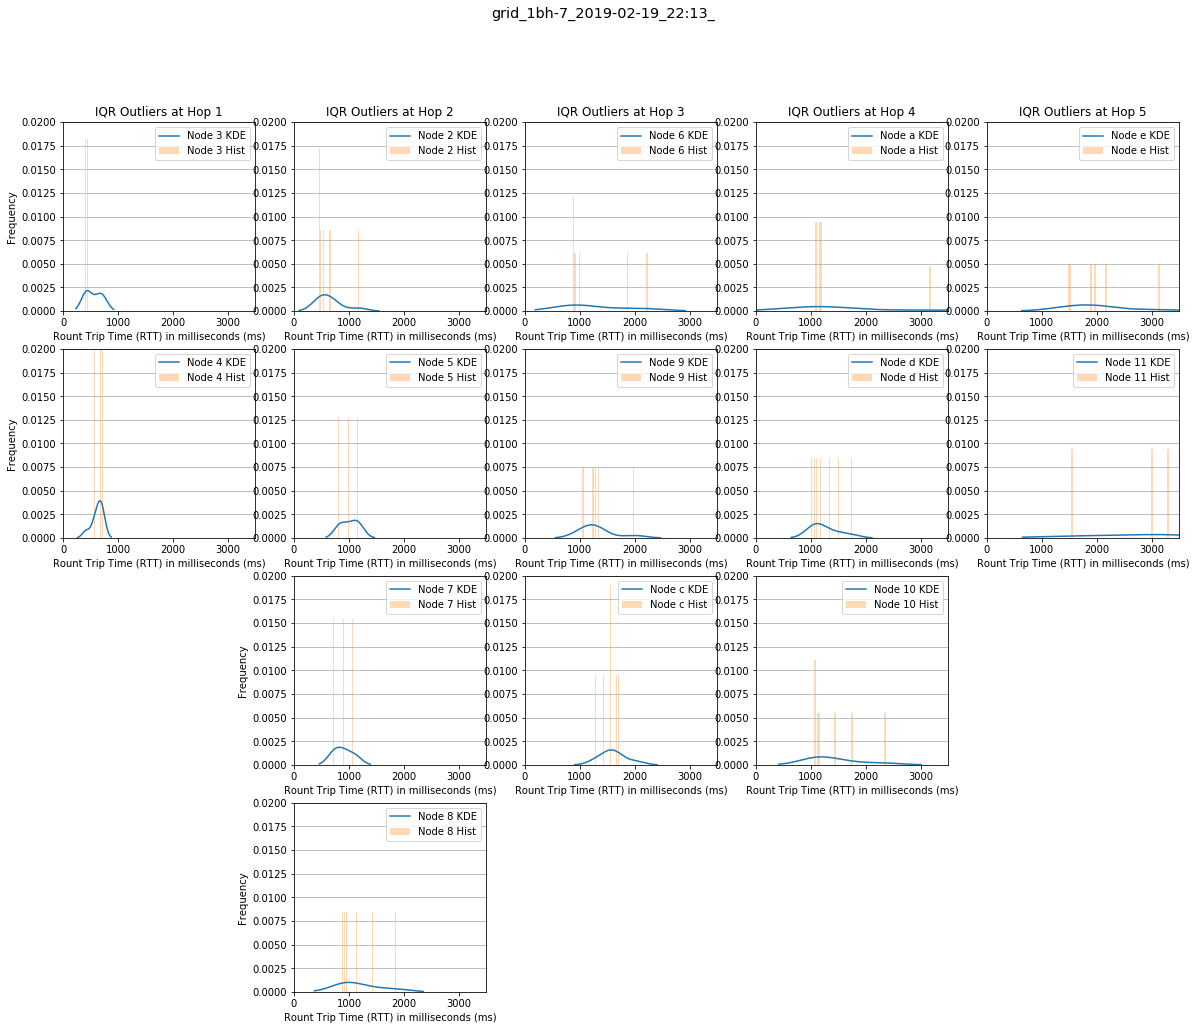

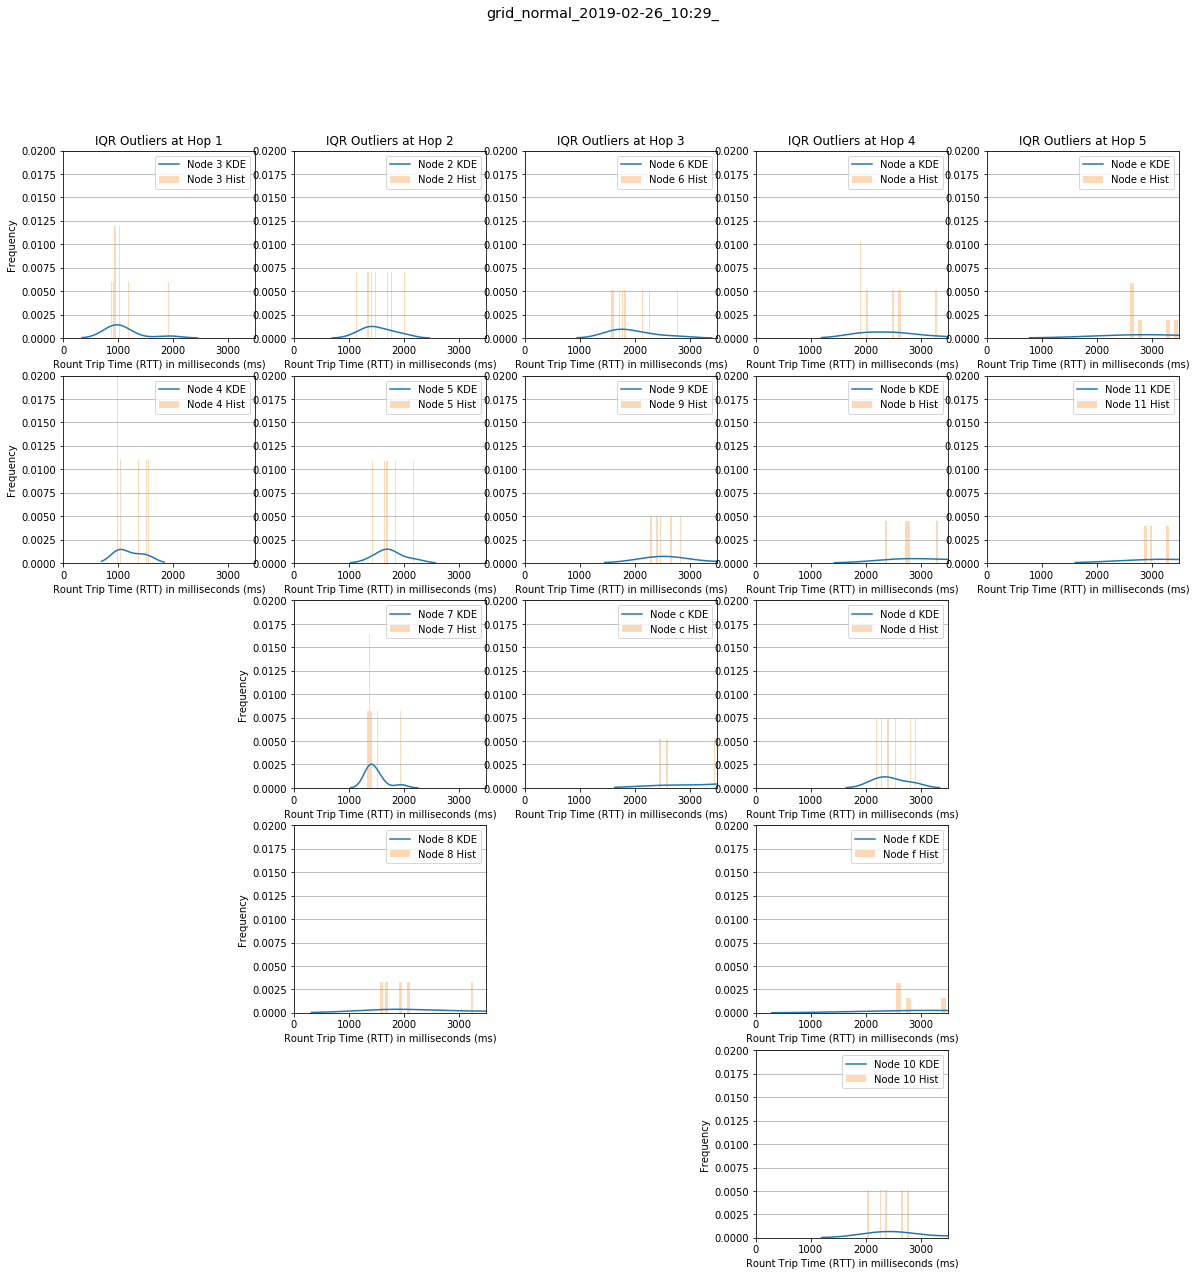

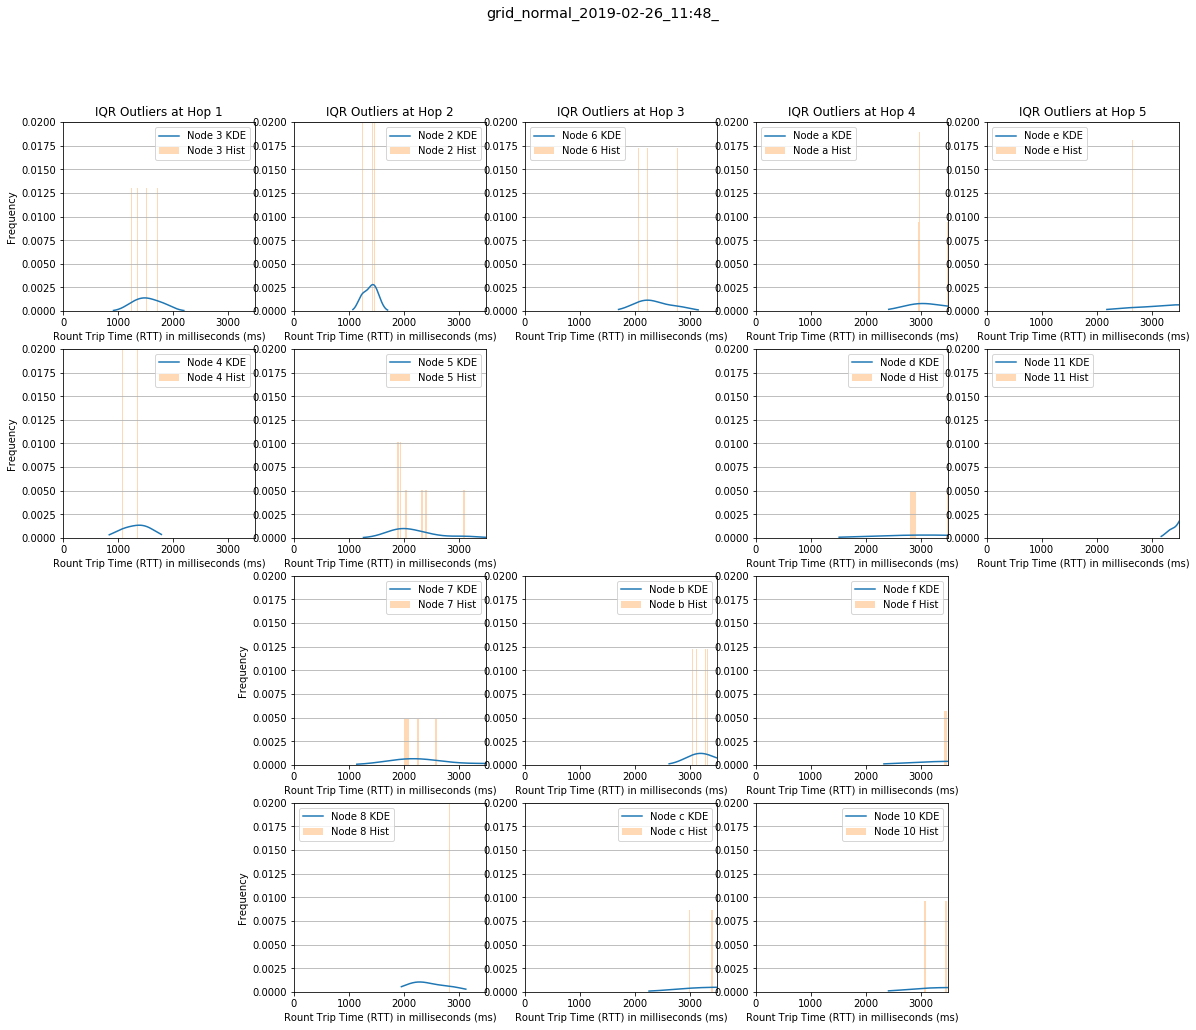

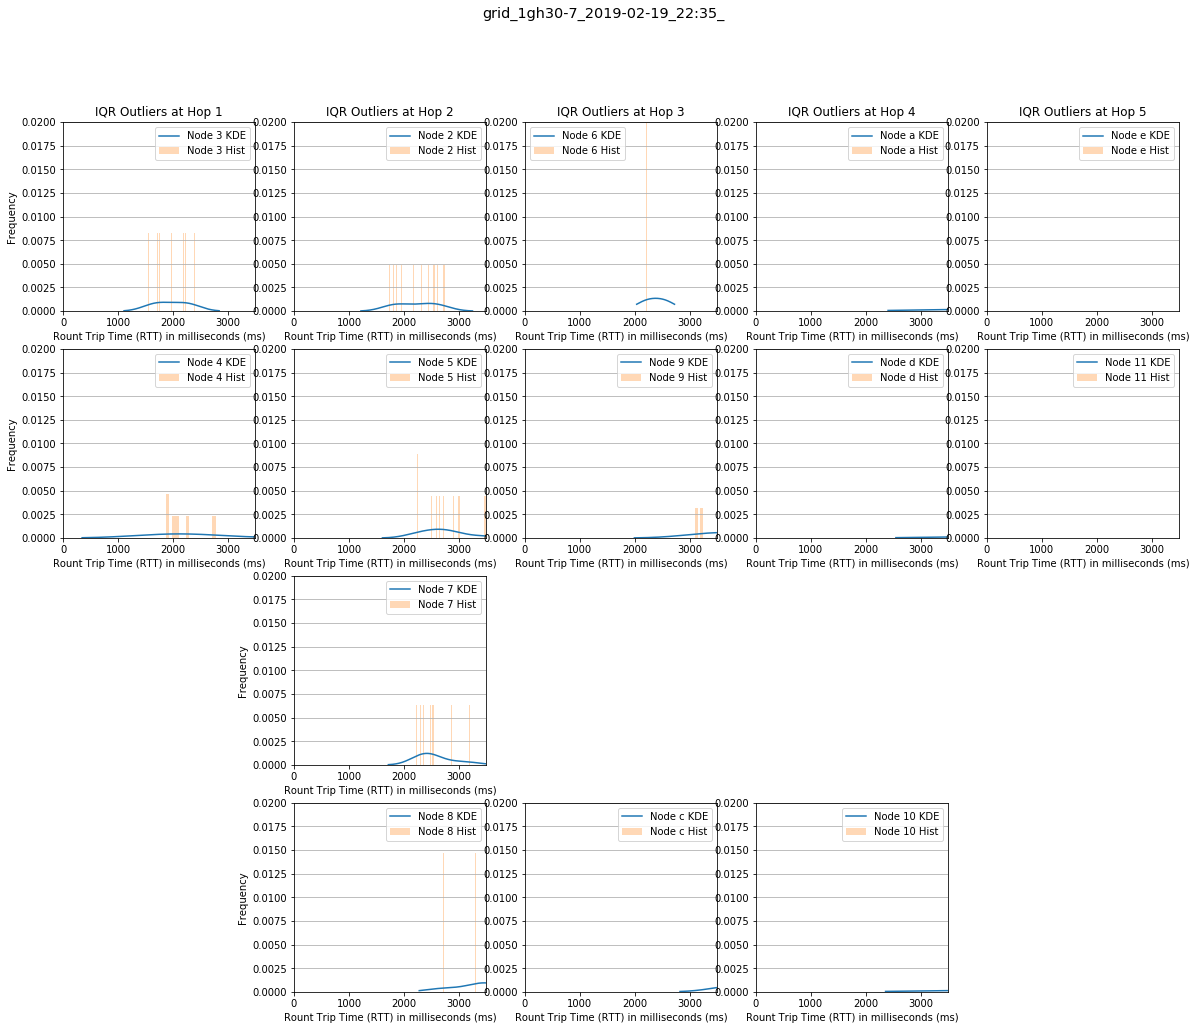

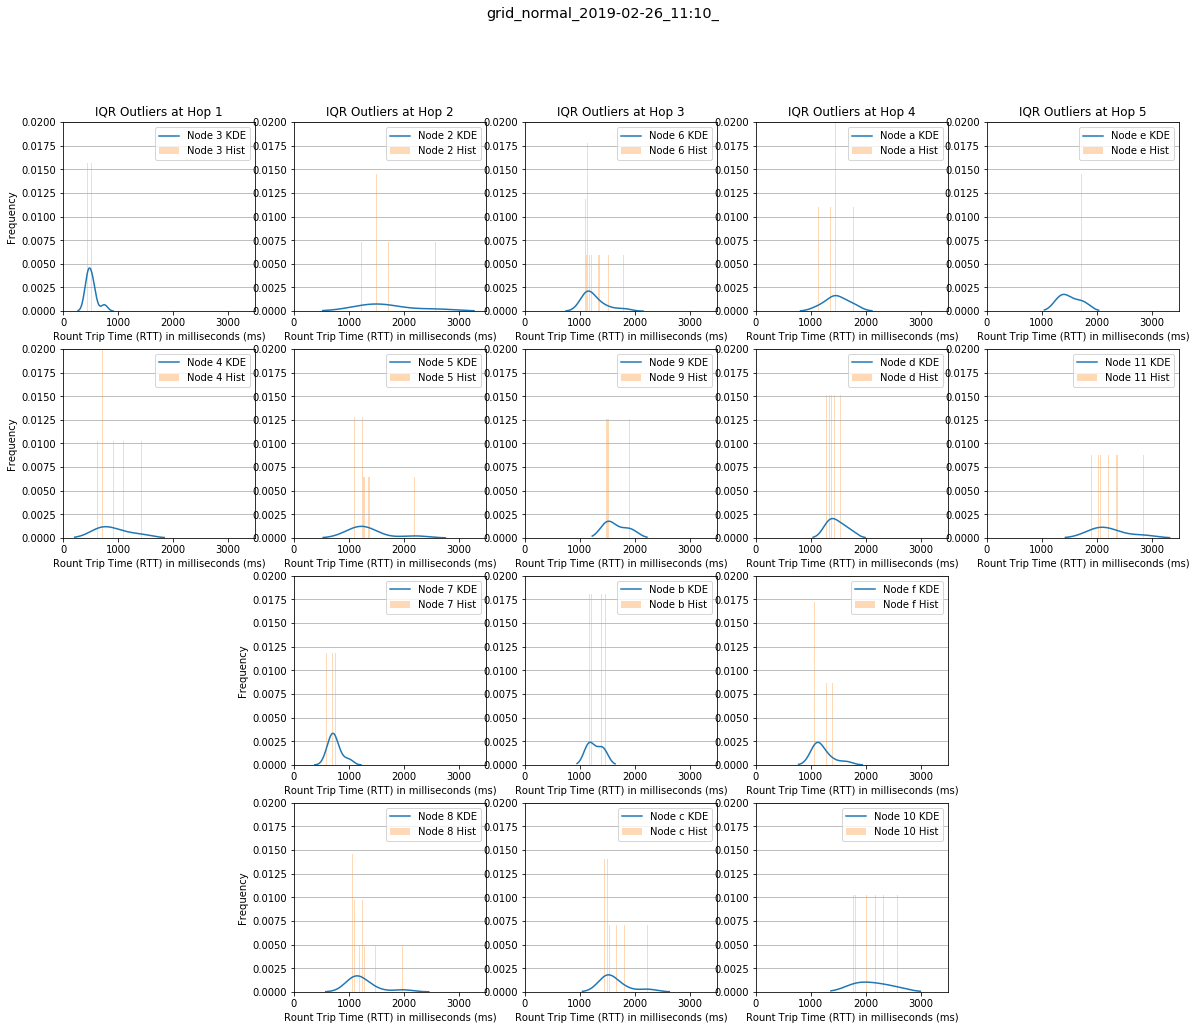

In [7]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    iqr_outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_iqr_outliers_hops_nodes(nodes, iqr_outliers, 3500, 0.02, row[1])

# Statistics

Compute statistics for each node in every experimentCompute statistics for each node in every experiment

In [8]:
stats = None

for row in plots:
    label = 'Normal'
    # Assign a label
    if row[1].find('gh') >= 0:
        label = 'GH'
    elif row[1].find('bh') >= 0:
        label = 'BH'
        
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    experiment = row[1]
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, clean, label, experiment)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, clean, label, experiment)])

stats = stats.sort_values(by=['experiment', 'hop']).reset_index(drop=True)


In [9]:
stats

node_id                      experiment  count  \
0      aaaa::212:7403:3:303:    grid_1bh-7_2019-02-19_22:13_    149   
1      aaaa::212:7404:4:404:    grid_1bh-7_2019-02-19_22:13_    141   
2      aaaa::212:7407:7:707:    grid_1bh-7_2019-02-19_22:13_    147   
3      aaaa::212:7408:8:808:    grid_1bh-7_2019-02-19_22:13_    156   
4      aaaa::212:7402:2:202:    grid_1bh-7_2019-02-19_22:13_    172   
5      aaaa::212:7405:5:505:    grid_1bh-7_2019-02-19_22:13_    147   
6      aaaa::212:7406:6:606:    grid_1bh-7_2019-02-19_22:13_    160   
7      aaaa::212:7409:9:909:    grid_1bh-7_2019-02-19_22:13_    145   
8      aaaa::212:740c:c:c0c:    grid_1bh-7_2019-02-19_22:13_    153   
9      aaaa::212:740d:d:d0d:    grid_1bh-7_2019-02-19_22:13_    144   
10     aaaa::212:740a:a:a0a:    grid_1bh-7_2019-02-19_22:13_    161   
11   aaaa::212:7410:10:1010:    grid_1bh-7_2019-02-19_22:13_    138   
12     aaaa::212:740e:e:e0e:    grid_1bh-7_2019-02-19_22:13_    178   
13   aaaa::212:7411:11:1111:    grid_1bh-7_2019-02-19_22:13_    136   
14     aaaa::212:7403:3:303:    grid_1bh-9_2019-02-20_00:30_    187   
15     aaaa::212:7404:4:404:    grid_1bh-9_2019-02-20_00:30_    163   
16     aaaa::212:7402:2:202:    grid_1bh-9_2019-02-20_00:30_    179   
17     aaaa::212:7408:8:808:    grid_1bh-9_2019-02-20_00:30_    155   
18     aaaa::212:7407:7:707:    grid_1bh-9_2019-02-20_00:30_    187   
19     aaaa::212:7405:5:505:    grid_1bh-9_2019-02-20_00:30_    174   
20     aaaa::212:7409:9:909:    grid_1bh-9_2019-02-20_00:30_    149   
21     aaaa::212:7406:6:606:    grid_1bh-9_2019-02-20_00:30_    180   
22     aaaa::212:740b:b:b0b:    grid_1bh-9_2019-02-20_00:30_    154   
23     aaaa::212:740c:c:c0c:    grid_1bh-9_2019-02-20_00:30_    172   
24     aaaa::212:740a:a:a0a:    grid_1bh-9_2019-02-20_00:30_    180   
25   aaaa::212:7410:10:1010:    grid_1bh-9_2019-02-20_00:30_    143   
26     aaaa::212:740f:f:f0f:    grid_1bh-9_2019-02-20_00:30_    168   
27     aaaa::212:740e:e:e0e:    grid_1bh-9_2019-02-20_00:30_    187   
28     aaaa::212:7404:4:404:  grid_1gh30-7_2019-02-19_22:35_    117   
29     aaaa::212:7403:3:303:  grid_1gh30-7_2019-02-19_22:35_    126   
..                       ...                             ...    ...   
174    aaaa::212:7405:5:505:   grid_normal_2019-02-26_11:10_    150   
175    aaaa::212:7408:8:808:   grid_normal_2019-02-26_11:10_    137   
176    aaaa::212:7402:2:202:   grid_normal_2019-02-26_11:10_    159   
177    aaaa::212:7407:7:707:   grid_normal_2019-02-26_11:10_    162   
178    aaaa::212:740c:c:c0c:   grid_normal_2019-02-26_11:10_    133   
179    aaaa::212:740b:b:b0b:   grid_normal_2019-02-26_11:10_    128   
180    aaaa::212:7409:9:909:   grid_normal_2019-02-26_11:10_    131   
181    aaaa::212:7406:6:606:   grid_normal_2019-02-26_11:10_    163   
182    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_11:10_    167   
183  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_11:10_     99   
184    aaaa::212:740a:a:a0a:   grid_normal_2019-02-26_11:10_    151   
185    aaaa::212:740d:d:d0d:   grid_normal_2019-02-26_11:10_    146   
186  aaaa::212:7411:11:1111:   grid_normal_2019-02-26_11:10_    108   
187    aaaa::212:740e:e:e0e:   grid_normal_2019-02-26_11:10_    136   
188    aaaa::212:7404:4:404:   grid_normal_2019-02-26_11:48_     73   
189    aaaa::212:7403:3:303:   grid_normal_2019-02-26_11:48_    104   
190    aaaa::212:7405:5:505:   grid_normal_2019-02-26_11:48_    121   
191    aaaa::212:7407:7:707:   grid_normal_2019-02-26_11:48_    104   
192    aaaa::212:7402:2:202:   grid_normal_2019-02-26_11:48_    125   
193    aaaa::212:7408:8:808:   grid_normal_2019-02-26_11:48_     77   
194    aaaa::212:740b:b:b0b:   grid_normal_2019-02-26_11:48_    104   
195    aaaa::212:740c:c:c0c:   grid_normal_2019-02-26_11:48_     91   
196    aaaa::212:7406:6:606:   grid_normal_2019-02-26_11:48_     93   
197    aaaa::212:7409:9:909:   grid_normal_2019-02-26_11:48_     64   
198    aaaa::212:740f:f:f0f:   grid_normal_20

In [10]:
trace_statistics.compute_labeled_statistics_by_network(stats, 'loss', 9)

experiment   label      1      2      3      4      5  \
0     grid_1bh-7_2019-02-19_22:13_      BH  0.255  0.320  0.110  0.310  0.195   
1     grid_1bh-9_2019-02-20_00:30_      BH  0.230  0.065  0.160  0.100  0.140   
2   grid_1gh30-7_2019-02-19_22:35_      GH  0.725  0.710  0.500  0.655  0.720   
3   grid_1gh30-9_2019-02-20_00:12_      GH  0.260  0.795  0.170  0.175  0.775   
4   grid_1gh50-7_2019-02-19_22:53_      GH  0.210  0.390  0.595  0.390  0.210   
5   grid_1gh50-9_2019-02-19_23:54_      GH  0.690  0.160  0.610  0.185  0.255   
6   grid_1gh70-7_2019-02-19_23:11_      GH  0.210  0.160  0.165  0.505  0.275   
7   grid_1gh70-9_2019-02-19_23:34_      GH  0.530  0.420  0.520  0.790  0.515   
8    grid_normal_2019-02-19_21:23_  Normal  0.340  0.365  0.390  0.610  0.615   
9    grid_normal_2019-02-26_10:29_  Normal  0.300  0.245  0.340  0.335  0.430   
10   grid_normal_2019-02-26_10:53_  Normal  0.400  0.340  0.555  0.255  0.335   
11   grid_normal_2019-02-26_11:10_  Normal  0.460  0.270  0.245  0.320  0.505   
12   grid_normal_2019-02-26_11:48_  Normal  0.725  0.630  0.590  0.580  0.680   

        6      7      8      9  
0   0.235  0.275  0.280  0.265  
1   0.100  0.285  0.130  0.065  
2   0.890  0.835  0.510  0.460  
3   0.125  0.205  0.220  0.255  
4   0.295  0.655  0.670  0.345  
5   0.210  0.250  0.395  0.155  
6   0.335  0.300  0.430  0.145  
7   0.530  0.415  0.415  0.525  
8   0.465  0.450  0.445  0.345  
9   0.360  0.485  0.360  0.480  
10  0.320  0.415  0.150  0.320  
11  0.165  0.185  0.345  0.315  
12  0.535  0.545  0.375  0.615

## T-Test

We perform a t-test on different windows sizes

In [2]:
plots = set()
with open('traces/traces.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        else:
            plots.add((row[1], row[2]))

In [3]:
stats = None
win_25_stats = None
win_50_stats = None
win_100_stats = None

for row in plots:
    label = ''
    experiment = row[1]
    
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)
        win_25_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)
        win_50_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)
        win_100_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)])
        win_25_stats = pd.concat([win_25_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)])
        win_50_stats = pd.concat([win_50_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)])
        win_100_stats = pd.concat([win_100_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)])
        

# Create a dictionary containing all the statistics for each trace size
trace_stats = {200: stats, 25: win_25_stats, 50: win_50_stats, 100: win_100_stats}     

In [4]:
one_sample_t_test = trace_statistics.compute_one_sample_t_test(trace_stats)
one_sample_t_test[25]

node_id                      experiment  test statistic  \
0      aaaa::212:7402:2:202:    grid_1bh-7_2019-02-19_22:13_       -0.486806   
1      aaaa::212:7402:2:202:    grid_1bh-9_2019-02-20_00:30_       -0.126345   
2      aaaa::212:7402:2:202:  grid_1gh30-7_2019-02-19_22:35_        0.635848   
3      aaaa::212:7402:2:202:  grid_1gh30-9_2019-02-20_00:12_       -0.021208   
4      aaaa::212:7402:2:202:  grid_1gh50-7_2019-02-19_22:53_       -0.018869   
5      aaaa::212:7402:2:202:  grid_1gh50-9_2019-02-19_23:54_        0.141400   
6      aaaa::212:7402:2:202:  grid_1gh70-7_2019-02-19_23:11_        0.265771   
7      aaaa::212:7402:2:202:  grid_1gh70-9_2019-02-19_23:34_       -0.109017   
8      aaaa::212:7402:2:202:   grid_normal_2019-02-19_21:23_       -0.323289   
9      aaaa::212:7402:2:202:   grid_normal_2019-02-26_10:29_        0.000762   
10     aaaa::212:7402:2:202:   grid_normal_2019-02-26_10:53_       -0.055330   
11     aaaa::212:7402:2:202:   grid_normal_2019-02-26_11:10_        0.026173   
12     aaaa::212:7402:2:202:   grid_normal_2019-02-26_11:48_        0.353992   
13     aaaa::212:7403:3:303:    grid_1bh-7_2019-02-19_22:13_       -0.222104   
14     aaaa::212:7403:3:303:    grid_1bh-9_2019-02-20_00:30_        0.036970   
15     aaaa::212:7403:3:303:  grid_1gh30-7_2019-02-19_22:35_        0.364259   
16     aaaa::212:7403:3:303:  grid_1gh30-9_2019-02-20_00:12_        0.176573   
17     aaaa::212:7403:3:303:  grid_1gh50-7_2019-02-19_22:53_       -0.286116   
18     aaaa::212:7403:3:303:  grid_1gh50-9_2019-02-19_23:54_        0.024973   
19     aaaa::212:7403:3:303:  grid_1gh70-7_2019-02-19_23:11_        0.039511   
20     aaaa::212:7403:3:303:  grid_1gh70-9_2019-02-19_23:34_       -0.446519   
21     aaaa::212:7403:3:303:   grid_normal_2019-02-19_21:23_       -0.021488   
22     aaaa::212:7403:3:303:   grid_normal_2019-02-26_10:29_       -0.029702   
23     aaaa::212:7403:3:303:   grid_normal_2019-02-26_10:53_        0.002479   
24     aaaa::212:7403:3:303:   grid_normal_2019-02-26_11:10_       -0.197187   
25     aaaa::212:7403:3:303:   grid_normal_2019-02-26_11:48_        0.510838   
26     aaaa::212:7404:4:404:    grid_1bh-7_2019-02-19_22:13_        0.006460   
27     aaaa::212:7404:4:404:    grid_1bh-9_2019-02-20_00:30_        0.026623   
28     aaaa::212:7404:4:404:  grid_1gh30-7_2019-02-19_22:35_       -0.005476   
29     aaaa::212:7404:4:404:  grid_1gh30-9_2019-02-20_00:12_       -0.038942   
..                       ...                             ...             ...   
174    aaaa::212:740f:f:f0f:   grid_normal_2019-02-19_21:23_       -0.295487   
175    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_10:29_        0.004664   
176    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_10:53_       -0.105658   
177    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_11:10_       -0.415596   
178    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_11:48_        0.401561   
179  aaaa::212:7410:10:1010:    grid_1bh-7_2019-02-19_22:13_       -0.097995   
180  aaaa::212:7410:10:1010:    grid_1bh-9_2019-02-20_00:30_        0.000000   
181  aaaa::212:7410:10:1010:  grid_1gh30-7_2019-02-19_22:35_       -0.161271   
182  aaaa::212:7410:10:1010:  grid_1gh30-9_2019-02-20_00:12_        0.003477   
183  aaaa::212:7410:10:1010:  grid_1gh50-7_2019-02-19_22:53_       -0.056175   
184  aaaa::212:7410:10:1010:  grid_1gh50-9_2019-02-19_23:54_       -0.160594   
185  aaaa::212:7410:10:1010:  grid_1gh70-7_2019-02-19_23:11_       -0.135797   
186  aaaa::212:7410:10:1010:  grid_1gh70-9_2019-02-19_23:34_       -0.430125   
187  aaaa::212:7410:10:1010:   grid_normal_2019-02-19_21:23_       -0.446091   
188  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_10:29_        0.186710   
189  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_10:53_        0.041306   
190  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_11:10_        0.124073   
191  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_11:48_        0.061728   
192  aaaa::212:7411:1

## Kolmogorov-Smirnov Test

We perform a ## Kolmogorov-Smirnov-test on different windows sizes

In [5]:
two_sample_ks_test = trace_statistics.compute_kolmogorov_smirnov_2_samp(trace_stats)
two_sample_ks_test[25]

node_id                      experiment  test statistic  \
0      aaaa::212:7402:2:202:    grid_1bh-7_2019-02-19_22:13_        0.625000   
1      aaaa::212:7402:2:202:    grid_1bh-9_2019-02-20_00:30_        0.625000   
2      aaaa::212:7402:2:202:  grid_1gh30-7_2019-02-19_22:35_        0.571429   
3      aaaa::212:7402:2:202:  grid_1gh30-9_2019-02-20_00:12_        0.625000   
4      aaaa::212:7402:2:202:  grid_1gh50-7_2019-02-19_22:53_        0.714286   
5      aaaa::212:7402:2:202:  grid_1gh50-9_2019-02-19_23:54_        0.625000   
6      aaaa::212:7402:2:202:  grid_1gh70-7_2019-02-19_23:11_        0.571429   
7      aaaa::212:7402:2:202:  grid_1gh70-9_2019-02-19_23:34_        0.600000   
8      aaaa::212:7402:2:202:   grid_normal_2019-02-19_21:23_        0.571429   
9      aaaa::212:7402:2:202:   grid_normal_2019-02-26_10:29_        0.500000   
10     aaaa::212:7402:2:202:   grid_normal_2019-02-26_10:53_        0.600000   
11     aaaa::212:7402:2:202:   grid_normal_2019-02-26_11:10_        0.571429   
12     aaaa::212:7402:2:202:   grid_normal_2019-02-26_11:48_        0.500000   
13     aaaa::212:7403:3:303:    grid_1bh-7_2019-02-19_22:13_        0.714286   
14     aaaa::212:7403:3:303:    grid_1bh-9_2019-02-20_00:30_        0.500000   
15     aaaa::212:7403:3:303:  grid_1gh30-7_2019-02-19_22:35_        0.666667   
16     aaaa::212:7403:3:303:  grid_1gh30-9_2019-02-20_00:12_        0.500000   
17     aaaa::212:7403:3:303:  grid_1gh50-7_2019-02-19_22:53_        0.500000   
18     aaaa::212:7403:3:303:  grid_1gh50-9_2019-02-19_23:54_        0.666667   
19     aaaa::212:7403:3:303:  grid_1gh70-7_2019-02-19_23:11_        0.571429   
20     aaaa::212:7403:3:303:  grid_1gh70-9_2019-02-19_23:34_        0.500000   
21     aaaa::212:7403:3:303:   grid_normal_2019-02-19_21:23_        0.666667   
22     aaaa::212:7403:3:303:   grid_normal_2019-02-26_10:29_        0.666667   
23     aaaa::212:7403:3:303:   grid_normal_2019-02-26_10:53_        0.571429   
24     aaaa::212:7403:3:303:   grid_normal_2019-02-26_11:10_        0.625000   
25     aaaa::212:7403:3:303:   grid_normal_2019-02-26_11:48_        0.600000   
26     aaaa::212:7404:4:404:    grid_1bh-7_2019-02-19_22:13_        0.666667   
27     aaaa::212:7404:4:404:    grid_1bh-9_2019-02-20_00:30_        0.714286   
28     aaaa::212:7404:4:404:  grid_1gh30-7_2019-02-19_22:35_        0.800000   
29     aaaa::212:7404:4:404:  grid_1gh30-9_2019-02-20_00:12_        0.750000   
..                       ...                             ...             ...   
174    aaaa::212:740f:f:f0f:   grid_normal_2019-02-19_21:23_        0.500000   
175    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_10:29_        0.666667   
176    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_10:53_        0.666667   
177    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_11:10_        0.625000   
178    aaaa::212:740f:f:f0f:   grid_normal_2019-02-26_11:48_        0.750000   
179  aaaa::212:7410:10:1010:    grid_1bh-7_2019-02-19_22:13_        0.666667   
180  aaaa::212:7410:10:1010:    grid_1bh-9_2019-02-20_00:30_        0.500000   
181  aaaa::212:7410:10:1010:  grid_1gh30-7_2019-02-19_22:35_        0.600000   
182  aaaa::212:7410:10:1010:  grid_1gh30-9_2019-02-20_00:12_        0.571429   
183  aaaa::212:7410:10:1010:  grid_1gh50-7_2019-02-19_22:53_        0.666667   
184  aaaa::212:7410:10:1010:  grid_1gh50-9_2019-02-19_23:54_        0.571429   
185  aaaa::212:7410:10:1010:  grid_1gh70-7_2019-02-19_23:11_        0.500000   
186  aaaa::212:7410:10:1010:  grid_1gh70-9_2019-02-19_23:34_        0.600000   
187  aaaa::212:7410:10:1010:   grid_normal_2019-02-19_21:23_        0.500000   
188  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_10:29_        0.666667   
189  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_10:53_        0.500000   
190  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_11:10_        0.800000   
191  aaaa::212:7410:10:1010:   grid_normal_2019-02-26_11:48_        0.666667   
192  aaaa::212:7411:1